<div style="text-align: center; background: linear-gradient(135deg, #1a237e 0%, #283593 50%, #303f9f 100%); color: white; padding: 35px; border-radius: 12px; margin: 25px 0; font-family: 'Segoe UI', 'Arial', sans-serif; font-weight: 700; font-size: 2.1em; box-shadow: 0 6px 25px rgba(0,0,0,0.05); border-bottom: 4px solid #5c6bc0;">
Crime Analysis in Chicago's Community Areas
</div>

<hr style="border: none; height: 2px; background: linear-gradient(to right, transparent, #5c6bc0, transparent); margin: 30px auto; width: 75%;">

<div style="background: #f8f9fa; color: #2c3e50; padding: 30px; border-radius: 12px; margin: 25px 0; border-left: 5px solid #5c6bc0; border-right: 5px solid #5c6bc0;box-shadow: 0 4px 15px rgba(0,0,0,0.08);">
<h3 style="color: #1a237e; margin-top: 0; text-align: center; font-weight: 600; font-size: 1.6em; margin-bottom: 15px;">
EXECUTIVE SUMMARY
</h3>

<p style="color: #2c3e50; font-size: 1.2em; line-height: 1.6; text-align: center; margin: 0px 50px 25px; font-weight: 500;">
This report takes a close look at criminal incidents across Chicago's community areas, showing how crime levels and distribution vary from one place to another. It explores where, when, and how these incidents happen, pointing out the areas most at risk. The goal is to provide insights that can help law enforcement make better decisions and support community efforts to improve safety.</p>

<div style="background: white; padding: 25px; border-radius: 8px; margin: 20px 0; border: 1px solid #e0e0e0;">
<div style="display: flex; justify-content: space-evenly; align-items: center; text-align: center; width: 100%;">
    
<div style="width: 33%">
<strong style="color: #5c6bc0; display: block; margin-bottom: 8px; font-size: 1.1em;">Data Analyst</strong>
<span style="color: #1a237e; font-weight: 600; font-size: 1.1em;">Jomel Tomeo</span>
</div>

<div style="width: 33%">
<strong style="color: #5c6bc0; display: block; margin-bottom: 8px; font-size: 1.1em;">Report Date</strong>
<span style="color: #1a237e; font-weight: 600; font-size: 1.1em;">October 2025</span>
</div>

<div style="width: 33%">
<strong style="color: #5c6bc0; display: block; margin-bottom: 8px; font-size: 1.1em;">Period Covered</strong>
<span style="color: #1a237e; font-weight: 600; font-size: 1.1em;">2024-2025</span>
</div>
</div>
</div>
<div style="text-align: center; margin-top: 15px;">
<span style="background: #5c6bc0; color: white; padding: 8px 20px; border-radius: 20px; font-weight: 600; font-size: 0.9em;">
Public Safety • Crime Prevention • Actionable Insights • Community Focused
</span>
</div>
</div>
</div>


<h3 style="text-align: center; background: #3f51b5; color: white; padding: 18px; border-radius: 8px; margin: 25px 0; font-family: 'Segoe UI', sans-serif; font-weight: 600; font-size: 1.4em;">
Initialization of Core Libraries
</h3>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import HeatMap
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

<h3 style="text-align: center; background: #3f51b5; color: white; padding: 18px; border-radius: 8px; margin: 25px 0; font-family: 'Segoe UI', sans-serif; font-weight: 600; font-size: 1.4em;">
Loading Dataset(s) into DataFrames 
</h3>
<ul style="list-style: none; padding: 0; margin: 0px 20px; font-family: 'Segoe UI', sans-serif;">
    <li style="padding: 10px 0 10px 25px; margin: 8px 0; color: #2c3e50; position: relative;">
        <span style="position: absolute; left: 0; color: #3f51b5;">▶</span> DataFrame Identifier
    </li>
    <li style="padding: 10px 0 10px 25px; margin: 8px 0; color: #2c3e50; position: relative;">
        <span style="position: absolute; left: 0; color: #3f51b5;">▶</span> Dataset File Location
    </li>
</ul>

In [2]:
crime = pd.read_csv("datasets\\chicago_crimes.csv")
crime

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,13439321,JH237424,04/14/2024 12:00:00 AM,040XX S PRAIRIE AVE,0890,THEFT,FROM BUILDING,APARTMENT,False,False,...,3,38.0,06,1178707.0,1878256.0,2024,12/21/2024 03:40:46 PM,41.821236,-87.619921,"(41.821236024, -87.619920712)"
1,13437420,JH234779,04/14/2024 12:00:00 AM,023XX W CERMAK RD,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,COMMERCIAL / BUSINESS OFFICE,False,False,...,25,31.0,26,1161210.0,1889347.0,2024,12/21/2024 03:40:46 PM,41.852052,-87.683801,"(41.852051675, -87.683800849)"
2,13428676,JH224478,04/14/2024 12:00:00 AM,043XX W LE MOYNE ST,0917,MOTOR VEHICLE THEFT,"CYCLE, SCOOTER, BIKE WITH VIN",STREET,False,False,...,36,23.0,07,1146960.0,1909501.0,2024,12/21/2024 03:40:46 PM,41.907640,-87.735587,"(41.907640473, -87.735587478)"
3,13429357,JH225293,04/14/2024 12:00:00 AM,039XX W ADAMS ST,143A,WEAPONS VIOLATION,UNLAWFUL POSSESSION - HANDGUN,STREET,True,False,...,28,26.0,15,1150158.0,1898721.0,2024,12/21/2024 03:40:46 PM,41.877997,-87.724121,"(41.877997275, -87.724120826)"
4,13430098,JH226395,04/14/2024 12:00:00 AM,011XX W 112TH PL,0890,THEFT,FROM BUILDING,RESIDENCE,False,False,...,21,75.0,06,1170856.0,1830157.0,2024,12/21/2024 03:40:46 PM,41.689421,-87.650123,"(41.6894214, -87.650123247)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249118,13805239,JJ217509,04/12/2025 12:00:00 AM,029XX W LOGAN BLVD,2826,OTHER OFFENSE,HARASSMENT BY ELECTRONIC MEANS,APARTMENT,False,False,...,1,22.0,26,1156478.0,1917149.0,2025,04/19/2025 03:41:24 PM,41.928440,-87.700416,"(41.928439867, -87.700415972)"
249119,13804023,JJ215813,04/12/2025 12:00:00 AM,094XX S HARVARD AVE,0430,BATTERY,AGGRAVATED - OTHER DANGEROUS WEAPON,STREET,False,False,...,9,49.0,04B,1175694.0,1842631.0,2025,04/19/2025 03:41:24 PM,41.723545,-87.632040,"(41.723545182, -87.632039508)"
249120,13803926,JJ215943,04/12/2025 12:00:00 AM,084XX S VINCENNES AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,False,True,...,21,71.0,08B,1173850.0,1848976.0,2025,04/19/2025 03:41:24 PM,41.740998,-87.638606,"(41.74099774, -87.638606337)"
249121,13803475,JJ215338,04/12/2025 12:00:00 AM,050XX S ABERDEEN ST,0530,ASSAULT,AGGRAVATED - OTHER DANGEROUS WEAPON,STREET,True,False,...,20,61.0,04A,1169838.0,1871348.0,2025,04/19/2025 03:41:24 PM,41.802477,-87.652657,"(41.802477219, -87.652657244)"


<h3 style="text-align: center; background: #3f51b5; color: white; padding: 18px; border-radius: 8px; margin: 25px 0; font-family: 'Segoe UI', sans-serif; font-weight: 600; font-size: 1.4em;">
Descriptive Analytics
</h3>

In [3]:
crime.describe()

,ID,Beat,District,Ward,Community Area,X Coordinate,Y Coordinate,Year,Latitude,Longitude
count,2.491230e+05,249123.000000,249123.000000,249123.000000,249120.000000,2.490330e+05,2.490330e+05,249123.000000,249033.000000,249033.000000
mean,1.358652e+07,1153.845634,11.308924,23.186823,36.238560,1.165309e+06,1.887602e+06,2024.241668,41.847162,-87.668845
std,6.473192e+05,707.959752,7.074807,13.925951,21.567485,1.616814e+04,3.146277e+04,0.428095,0.086517,0.058875
min,2.807300e+04,111.000000,1.000000,1.000000,1.000000,1.092647e+06,1.813897e+06,2024.000000,41.644590,-87.934567
25%,1.352322e+07,533.000000,5.000000,10.000000,22.000000,1.153981e+06,1.860560e+06,2024.000000,41.772706,-87.710071
50%,1.361560e+07,1034.000000,10.000000,23.000000,32.000000,1.167190e+06,1.894278e+06,2024.000000,41.865616,-87.661690
75%,1.370865e+07,1732.000000,17.000000,34.000000,53.000000,1.176662e+06,1.910282e+06,2024.000000,41.909711,-87.627233
max,1.381045e+07,2535.000000,31.000000,50.000000,77.000000,1.205119e+06,1.951517e+06,2025.000000,42.022559,-87.524531


In [4]:
crime.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,249123.0,1.358652e+07,647319.161410,2.807300e+04,1.352322e+07,1.361560e+07,1.370865e+07,1.381045e+07
Beat,249123.0,1.153846e+03,707.959752,1.110000e+02,5.330000e+02,1.034000e+03,1.732000e+03,2.535000e+03
District,249123.0,1.130892e+01,7.074807,1.000000e+00,5.000000e+00,1.000000e+01,1.700000e+01,3.100000e+01
Ward,249123.0,2.318682e+01,13.925951,1.000000e+00,1.000000e+01,2.300000e+01,3.400000e+01,5.000000e+01
Community Area,249120.0,3.623856e+01,21.567485,1.000000e+00,2.200000e+01,3.200000e+01,5.300000e+01,7.700000e+01
X Coordinate,249033.0,1.165309e+06,16168.139632,1.092647e+06,1.153981e+06,1.167190e+06,1.176662e+06,1.205119e+06
Y Coordinate,249033.0,1.887602e+06,31462.770629,1.813897e+06,1.860560e+06,1.894278e+06,1.910282e+06,1.951517e+06
Year,249123.0,2.024242e+03,0.428095,2.024000e+03,2.024000e+03,2.024000e+03,2.024000e+03,2.025000e+03
Latitude,249033.0,4.184716e+01,0.086517,4.164459e+01,4.177271e+01,4.186562e+01,4.190971e+01,4.202256e+01
Longitude,249033.0,-8.766884e+01,0.058875,-8.793457e+01,-8.771007e+01,-8.766169e+01,-8.762723e+01,-8.752453e+01


<h3 style="text-align: center; background: #3f51b5; color: white; padding: 18px; border-radius: 8px; margin: 25px 0; font-family: 'Segoe UI', sans-serif; font-weight: 600; font-size: 1.4em;">
Checking Null Values
</h3>

In [5]:
crime.isnull().sum()

ID                        0
Case Number               0
Date                      0
Block                     0
IUCR                      0
Primary Type              0
Description               0
Location Description    857
Arrest                    0
Domestic                  0
Beat                      0
District                  0
Ward                      0
Community Area            3
FBI Code                  0
X Coordinate             90
Y Coordinate             90
Year                      0
Updated On                0
Latitude                 90
Longitude                90
Location                 90
dtype: int64

<h3 style="text-align: center; background: #3f51b5; color: white; padding: 18px; border-radius: 8px; margin: 25px 0; font-family: 'Segoe UI', sans-serif; font-weight: 600; font-size: 1.4em;">
Filling-Up Null Values
</h3>

In [6]:
crime['Latitude'] = pd.to_numeric(crime['Latitude'], errors='coerce')
crime['Longitude'] = pd.to_numeric(crime['Longitude'], errors='coerce')

crime['Latitude'] = crime['Latitude'].fillna(crime['Latitude'].mean())
crime['Longitude'] = crime['Longitude'].fillna(crime['Longitude'].mean())

In [7]:
crime['Location Description'] = crime['Location Description'].fillna('unaccounted')
crime['Community Area'] = crime['Community Area'].fillna('unaccounted')
crime['X Coordinate'] = crime['X Coordinate'].fillna(crime['X Coordinate'].mode()[0])
crime['Y Coordinate'] = crime['Y Coordinate'].fillna(crime['Y Coordinate'].mode()[0])
crime['Location'] = crime['Location'].fillna('unaccounted')

In [8]:
crime.isnull().sum()

ID                      0
Case Number             0
Date                    0
Block                   0
IUCR                    0
Primary Type            0
Description             0
Location Description    0
Arrest                  0
Domestic                0
Beat                    0
District                0
Ward                    0
Community Area          0
FBI Code                0
X Coordinate            0
Y Coordinate            0
Year                    0
Updated On              0
Latitude                0
Longitude               0
Location                0
dtype: int64

<h3 style="text-align: center; background: #3f51b5; color: white; padding: 18px; border-radius: 8px; margin: 25px 0; font-family: 'Segoe UI', sans-serif; font-weight: 600; font-size: 1.4em;">
Cleaning any Inconsistencies with the Dataset
</h3>

In [9]:
# Date
crime['Date'] = crime['Date'].str.strip()
crime['Date'] = crime['Date'].astype('str')
crime['Date'] = crime['Date'].str.replace('/', '-')

#Updated On
crime['Updated On'] = crime['Updated On'].str.strip()
crime['Updated On'] = crime['Updated On'].astype('str')
crime['Updated On'] = crime['Updated On'].str.replace('/', '-')

In [10]:
crime['Date'] = pd.to_datetime(crime['Date'], dayfirst = True, errors='coerce')
crime['Updated On'] = pd.to_datetime(crime['Updated On'], dayfirst = True, errors='coerce')

<h3 style="text-align: center; background: #3f51b5; color: white; padding: 18px; border-radius: 8px; margin: 25px 0; font-family: 'Segoe UI', sans-serif; font-weight: 600; font-size: 1.4em;">
Extracting Date Information Using Pandas DateTime
</h3>

In [11]:
# From Date column
crime['Year'] = crime['Date'].dt.year
crime['Month'] = crime['Date'].dt.month
crime['Day'] = crime['Date'].dt.day
crime['DayOfWeek'] = crime['Date'].dt.dayofweek

crime['Hour'] = crime['Date'].dt.hour
crime['Minute'] = crime['Date'].dt.minute
crime['Second'] = crime['Date'].dt.second

crime['TimeOfDay'] = crime['Hour'].apply(
    lambda h: 'Morning' if 5 <= h < 12 else
              'Afternoon' if 12 <= h < 17 else
              'Evening' if 17 <= h < 21 else
              'Night' if pd.notna(h) else 'unaccounted'
)

# From Updated On column
crime['Year_Updated'] = crime['Updated On'].dt.year
crime['Month_Updated'] = crime['Updated On'].dt.month
crime['Day_Updated'] = crime['Updated On'].dt.day
crime['DayOfWeek_Updated'] = crime['Updated On'].dt.dayofweek

crime['Hour_Updated'] = crime['Updated On'].dt.hour
crime['Minute_Updated'] = crime['Updated On'].dt.minute
crime['Second_Updated'] = crime['Updated On'].dt.second

crime['TimeOfDay_Updated'] = crime['Hour_Updated'].apply(
    lambda h: 'Morning' if 5 <= h < 12 else
              'Afternoon' if 12 <= h < 17 else
              'Evening' if 17 <= h < 21 else
              'Night' if pd.notna(h) else 'unaccounted'
)


In [12]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249123 entries, 0 to 249122
Data columns (total 37 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   ID                    249123 non-null  int64         
 1   Case Number           249123 non-null  object        
 2   Date                  249123 non-null  datetime64[ns]
 3   Block                 249123 non-null  object        
 4   IUCR                  249123 non-null  object        
 5   Primary Type          249123 non-null  object        
 6   Description           249123 non-null  object        
 7   Location Description  249123 non-null  object        
 8   Arrest                249123 non-null  bool          
 9   Domestic              249123 non-null  bool          
 10  Beat                  249123 non-null  int64         
 11  District              249123 non-null  int64         
 12  Ward                  249123 non-null  int64         
 13 

<h3 style="text-align: center; background: #3f51b5; color: white; padding: 18px; border-radius: 8px; margin: 25px 0; font-family: 'Segoe UI', sans-serif; font-weight: 600; font-size: 1.4em;">
Categorical Data
</h3>

In [13]:
crime['Case Number'] = crime['Case Number'].astype('category')
crime['IUCR'] = crime['IUCR'].astype('category')
crime['Primary Type'] = crime['Primary Type'].astype('category')
crime['Description'] = crime['Description'].astype('category')
crime['Location Description'] = crime['Location Description'].astype('category')
crime['Community Area'] = crime['Community Area'].astype('category')
crime['FBI Code'] = crime['FBI Code'].astype('category')
crime['Year'] = crime['Year'].astype('category')
crime['Location'] = crime['Location'].astype('category')

In [14]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249123 entries, 0 to 249122
Data columns (total 37 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   ID                    249123 non-null  int64         
 1   Case Number           249123 non-null  category      
 2   Date                  249123 non-null  datetime64[ns]
 3   Block                 249123 non-null  object        
 4   IUCR                  249123 non-null  category      
 5   Primary Type          249123 non-null  category      
 6   Description           249123 non-null  category      
 7   Location Description  249123 non-null  category      
 8   Arrest                249123 non-null  bool          
 9   Domestic              249123 non-null  bool          
 10  Beat                  249123 non-null  int64         
 11  District              249123 non-null  int64         
 12  Ward                  249123 non-null  int64         
 13 

<hr style="border: none; height: 2px; background: linear-gradient(to right, transparent, #5c6bc0, transparent); margin: 30px auto; width: 75%;">
<hr style="border: none; height: 2px; background: linear-gradient(to right, transparent, #5c6bc0, transparent); margin: 30px auto; width: 75%;">

<div style="text-align: center; background: linear-gradient(135deg, #1a237e 0%, #283593 50%, #303f9f 100%); color: white; padding: 30px; border-radius: 12px; margin: 25px 0; font-family: 'Segoe UI', 'Arial', sans-serif; font-weight: 700; font-size: 2em; box-shadow: 0 6px 25px rgba(0,0,0,0.15); border-bottom: 4px solid #5c6bc0;">
DATA EXPLORATION
</div>

<hr style="border: none; height: 2px; background: linear-gradient(to right, transparent, #5c6bc0, transparent); margin: 25px auto; width: 70%;">

<div style="background: #f8f9fa; color: #2c3e50; padding: 25px; border-radius: 10px; margin: 20px 0; border-left: 4px solid #5c6bc0; border-right: 4px solid #5c6bc0; box-shadow: 0 4px 12px rgba(0,0,0,0.06);">
<h3 style="color: #1a237e; text-align: center; font-weight: 600; font-size: 1.4em; margin-bottom: 10px;">
Conducting data exploration by structuring and analyzing key questions
</h3>

<p style="color: #5c6bc0; text-align: center; font-weight: 500; font-size: 1.1em; margin-bottom: 20px;">
Below are the questions that establish the structure of the analytical process
</p>
</div>

<hr style="border: none; height: 2px; background: linear-gradient(to right, transparent, #5c6bc0, transparent); margin: 25px auto; width: 70%;">

<div style="background: white; padding: 25px; border-radius: 10px; margin: 25px 0; border: 1px solid #e0e0e0; box-shadow: 0 4px 15px rgba(0,0,0,0.05); overflow-x: auto;">
<table style="width: 100%; border-collapse: collapse; font-family: 'Segoe UI', sans-serif;">
<tr style="background: linear-gradient(135deg, #5c6bc0, #3949ab); color: white;">
<th style="padding: 15px; text-align: center; font-weight: 600; font-size: 1.1em; border: none; width: 50px;">#</th>
<th style="padding: 15px; text-align: left; font-weight: 600; font-size: 1.1em; border: none;">Analytical Question</th>
</tr>
<tr style="background: #f8f9fa;">
<td style="padding: 12px 8px; text-align: center; font-weight: 600; color: #5c6bc0; border-bottom: 1px solid #e0e0e0; width: 50px;">1</td>
<td style="padding: 12px 15px; border-bottom: 1px solid #e0e0e0;">At what time of day do theft-related crimes occur most frequently, so we can adjust our public safety announcements accordingly?
</td>
</tr>
<tr style="background: white;">
<td style="padding: 12px 8px; text-align: center; font-weight: 600; color: #5c6bc0; border-bottom: 1px solid #e0e0e0; width: 50px;">2</td>
<td style="padding: 12px 15px; border-bottom: 1px solid #e0e0e0;">Is there a certain hour when weapons violations go up that might show gang activity?
</td>
</tr>
<tr style="background: #f8f9fa;">
<td style="padding: 12px 8px; text-align: center; font-weight: 600; color: #5c6bc0; border-bottom: 1px solid #e0e0e0; width: 50px;">3</td>
<td style="padding: 12px 15px; border-bottom: 1px solid #e0e0e0;">Has there been a change in the crime between 2024 and 2025?
</td>
</tr>
<tr style="background: white;">
<td style="padding: 12px 8px; text-align: center; font-weight: 600; color: #5c6bc0; border-bottom: 1px solid #e0e0e0; width: 50px;">4</td>
<td style="padding: 12px 15px; border-bottom: 1px solid #e0e0e0;">Which day of the week sees the highest number of arrests to help us plan court schedules and allocate prosecutors more effectively?
</td>
</tr>
<tr style="background: #f8f9fa;">
<td style="padding: 12px 8px; text-align: center; font-weight: 600; color: #5c6bc0; border-bottom: 1px solid #e0e0e0; width: 50px;">5</td>
<td style="padding: 12px 15px; border-bottom: 1px solid #e0e0e0;">Which locations have the highest concentration of narcotics incidents, and do these places also show high arrest success rates?
</td>
</tr>
<tr style="background: white;">
<td style="padding: 12px 8px; text-align: center; font-weight: 600; color: #5c6bc0; border-bottom: 1px solid #e0e0e0; width: 50px;">6</td>
<td style="padding: 12px 15px; border-bottom: 1px solid #e0e0e0;">Which months show the highest criminal activity?
</td>
</tr>
<tr style="background: #f8f9fa;">
<td style="padding: 12px 8px; text-align: center; font-weight: 600; color: #5c6bc0; border-bottom: 1px solid #e0e0e0; width: 50px;">7</td>
<td style="padding: 12px 15px; border-bottom: 1px solid #e0e0e0;">Which districts have more cases of specific offenses, and how are different crimes distributed across the city?
</td>
</tr>
<tr style="background: white;">
<td style="padding: 12px 8px; text-align: center; font-weight: 600; color: #5c6bc0; border-bottom: 1px solid #e0e0e0; width: 50px;">8</td>
<td style="padding: 12px 15px; border-bottom: 1px solid #e0e0e0;">How do arrest rates for domestic battery in Ward 7 compare to surrounding wards (8, 9, 10)
</td>
</tr>
<tr style="background: #f8f9fa;">
<td style="padding: 12px 8px; text-align: center; font-weight: 600; color: #5c6bc0; border-bottom: 1px solid #e0e0e0; width: 50px;">9</td>
<td style="padding: 12px 15px; border-bottom: 1px solid #e0e0e0;">Do more severe crimes, according to FBI codes, tend to happen in specific geographic areas?
</td>
</tr>
<tr style="background: white;">
<td style="padding: 12px 8px; text-align: center; font-weight: 600; color: #5c6bc0; border-bottom: 1px solid #e0e0e0; width: 50px;">10</td>
<td style="padding: 12px 15px; border-bottom: 1px solid #e0e0e0;">Are domestic violence incidents happening at different times of day compared to non-domestic assaults and battery?
</td>
</tr>
<tr style="background: #f8f9fa;">
<td style="padding: 12px 8px; text-align: center; font-weight: 600; color: #5c6bc0; border-bottom: 1px solid #e0e0e0; width: 50px;">11</td>
<td style="padding: 12px 15px; border-bottom: 1px solid #e0e0e0;">How can the Board of Education identify the types and timing of crimes occurring within school zones from 7 AM to 4 PM to improve student safety measures?
</td>
</tr>
<tr style="background: white;">
<td style="padding: 12px 8px; text-align: center; font-weight: 600; color: #5c6bc0; border-bottom: 1px solid #e0e0e0; width: 50px;">12</td>
<td style="padding: 12px 15px; border-bottom: 1px solid #e0e0e0;">Which districts show high crime volumes but low arrest rates, and how can the Police Commissioner's Office use this to improve district performance?
</td>
</tr>
<tr style="background: #f8f9fa;">
<td style="padding: 12px 8px; text-align: center; font-weight: 600; color: #5c6bc0; border-bottom: 1px solid #e0e0e0; width: 50px;">13</td>
<td style="padding: 12px 15px; border-bottom: 1px solid #e0e0e0;">Which community areas report the most crimes for the top three FBI codes?</td>
</tr>
<tr style="background: white;">
<td style="padding: 12px 8px; text-align: center; font-weight: 600; color: #5c6bc0; border-bottom: 1px solid #e0e0e0; width: 50px;">14</td>
<td style="padding: 12px 15px; border-bottom: 1px solid #e0e0e0;"> How do arrests change in each district during morning, evening, and night shifts, and what can this tell us about where officers might need more training?
</td>
</tr>
<tr style="background: #f8f9fa;">
<td style="padding: 12px 8px; text-align: center; font-weight: 600; color: #5c6bc0; border-bottom: 1px solid #e0e0e0; width: 50px;">15</td>
<td style="padding: 12px 15px; border-bottom: 1px solid #e0e0e0;">How often and where do public peace violations occur weekly?
</td>
</tr>
<tr style="background: white;">
<td style="padding: 12px 8px; text-align: center; font-weight: 600; color: #5c6bc0; border-bottom: 1px solid #e0e0e0; width: 50px;">16</td>
<td style="padding: 12px 15px; border-bottom: 1px solid #e0e0e0;">How do robbery incidents change month by month for quick action?
</td>
</tr>
<tr style="background: #f8f9fa;">
<td style="padding: 12px 8px; text-align: center; font-weight: 600; color: #5c6bc0; border-bottom: 1px solid #e0e0e0; width: 50px;">17</td>
<td style="padding: 12px 15px; border-bottom: 1px solid #e0e0e0;">How do domestic violence arrests compare to cases with no arrest?
</td>
</tr>
<tr style="background: white;">
<td style="padding: 12px 8px; text-align: center; font-weight: 600; color: #5c6bc0; border-bottom: 1px solid #e0e0e0; width: 50px;">18</td>
<td style="padding: 12px 15px; border-bottom: 1px solid #e0e0e0;">Which IUCR crime codes occur most frequently, and how can early action be planned to prevent escalation?</td>
</tr>
<tr style="background: #f8f9fa;">
<td style="padding: 12px 8px; text-align: center; font-weight: 600; color: #5c6bc0; border-bottom: 1px solid #e0e0e0; width: 50px;">19</td>
<td style="padding: 12px 15px; border-bottom: 1px solid #e0e0e0;">Which districts take the longest on average to finish investigations?
</td>
</tr>
<tr style="background: white;">
<td style="padding: 12px 8px; text-align: center; font-weight: 600; color: #5c6bc0; border-bottom: 1px solid #e0e0e0; width: 50px;">20</td>
<td style="padding: 12px 15px; border-bottom: 1px solid #e0e0e0;">Where do assault, robbery, and sex offense incidents happen most for victim support?</td>
</tr>
<tr style="background: #f8f9fa;">
<td style="padding: 12px 8px; text-align: center; font-weight: 600; color: #5c6bc0; border-bottom: 1px solid #e0e0e0; width: 50px;">21</td>
<td style="padding: 12px 15px; border-bottom: 1px solid #e0e0e0;">Which police beats have the fastest average response times?</td>
</tr>
<tr style="background: white;">
<td style="padding: 12px 8px; text-align: center; font-weight: 600; color: #5c6bc0; border-bottom: 1px solid #e0e0e0; width: 50px;">22</td>
<td style="padding: 12px 15px; border-bottom: 1px solid #e0e0e0;">What is the distribution of crimes by severity according to FBI codes?</td>
</tr>
<tr style="background: #f8f9fa;">
<td style="padding: 12px 8px; text-align: center; font-weight: 600; color: #5c6bc0; border-bottom: 1px solid #e0e0e0; width: 50px;">23</td>
<td style="padding: 12px 15px; border-bottom: 1px solid #e0e0e0;">What blocks demonstrate the greatest frequency of arrests per hour?
</td>
</tr>
<tr style="background: white;">
<td style="padding: 12px 8px; text-align: center; font-weight: 600; color: #5c6bc0; border-bottom: 1px solid #e0e0e0; width: 50px;">24</td>
<td style="padding: 12px 15px; border-bottom: 1px solid #e0e0e0;">How do Interference with Public Officer arrests break down by time percentage?
</td>
</tr>
<tr style="background: #f8f9fa;">
<td style="padding: 12px 8px; text-align: center; font-weight: 600; color: #5c6bc0; border-bottom: 1px solid #e0e0e0; width: 50px;">25</td>
<td style="padding: 12px 15px; border-bottom: 1px solid #e0e0e0;">Where do Deceptive Practice incidents occur most frequently by beat?</td>
</tr>
<tr style="background: #f8f9fa;">
<td style="padding: 12px 8px; text-align: center; font-weight: 600; color: #5c6bc0; border-bottom: 1px solid #e0e0e0; width: 50px;">26</td>
<td style="padding: 12px 15px; border-bottom: 1px solid #e0e0e0;">How many battery incidents in Ward 42 are classified as domestic?
</td>
</tr>
<tr style="background: #f8f9fa;">
<td style="padding: 12px 8px; text-align: center; font-weight: 600; color: #5c6bc0; border-bottom: 1px solid #e0e0e0; width: 50px;">27</td>
<td style="padding: 12px 15px; border-bottom: 1px solid #e0e0e0;">What percentage of crimes in busy crime areas happen in apartments?
</td>
</tr>
<tr style="background: #f8f9fa;">
<td style="padding: 12px 8px; text-align: center; font-weight: 600; color: #5c6bc0; border-bottom: 1px solid #e0e0e0; width: 50px;">28</td>
<td style="padding: 12px 15px; border-bottom: 1px solid #e0e0e0;">How do arrest rates fluctuate throughout the day on weekends vs weekdays?
</td>
</tr>
<tr style="background: #f8f9fa;">
<td style="padding: 12px 8px; text-align: center; font-weight: 600; color: #5c6bc0; border-bottom: 1px solid #e0e0e0; width: 50px;">29</td>
<td style="padding: 12px 15px; border-bottom: 1px solid #e0e0e0;">How do electronic and traditional methods compare in deceptive practice cases?
</td>
</tr>
<tr style="background: #f8f9fa;">
<td style="padding: 12px 8px; text-align: center; font-weight: 600; color: #5c6bc0; border-bottom: 1px solid #e0e0e0; width: 50px;">30</td>
<td style="padding: 12px 15px; border-bottom: 1px solid #e0e0e0;">Which CTA crimes happen most often in the city?</td>
</tr>
<tr style="background: #f8f9fa;">
<td style="padding: 12px 8px; text-align: center; font-weight: 600; color: #5c6bc0; border-bottom: 1px solid #e0e0e0; width: 50px;">31</td>
<td style="padding: 12px 15px; border-bottom: 1px solid #e0e0e0;">Where should police focus to reduce violent crimes in District 1?
</td>
</tr>
<tr style="background: #f8f9fa;">
<td style="padding: 12px 8px; text-align: center; font-weight: 600; color: #5c6bc0; border-bottom: 1px solid #e0e0e0; width: 50px;">32</td>
<td style="padding: 12px 15px; border-bottom: 1px solid #e0e0e0;">Where do significant thefts and losses over $500 take place most?
</td>
</tr>
<tr style="background: #f8f9fa;">
<td style="padding: 12px 8px; text-align: center; font-weight: 600; color: #5c6bc0; border-bottom: 1px solid #e0e0e0; width: 50px;">33</td>
<td style="padding: 12px 15px; border-bottom: 1px solid #e0e0e0;">Which restaurant locations have the highest crime incidents?
</td>
</tr>
<tr style="background: #f8f9fa;">
<td style="padding: 12px 8px; text-align: center; font-weight: 600; color: #5c6bc0; border-bottom: 1px solid #e0e0e0; width: 50px;">34</td>
<td style="padding: 12px 15px; border-bottom: 1px solid #e0e0e0;">What are the theft crimes around the Loop between 11AM-2PM within 1 mile of Millennium Park
</td>
</tr>
<tr style="background: #f8f9fa;">
<td style="padding: 12px 8px; text-align: center; font-weight: 600; color: #5c6bc0; border-bottom: 1px solid #e0e0e0; width: 50px;">35</td>
<td style="padding: 12px 15px; border-bottom: 1px solid #e0e0e0;">Which areas see the most stalking incidents on weekends since April 2024?
</td>
</tr>
</table>
</div>

<hr style="border: none; height: 2px; background: linear-gradient(to right, transparent, #5c6bc0, transparent); margin: 25px auto; width: 70%;">
<div style="background: #f8f9fa; color: #2c3e50; padding: 25px; border-radius: 10px; margin: 25px 0; border-left: 5px solid #5c6bc0; border-right: 5px solid #5c6bc0; box-shadow: 0 4px 12px rgba(0,0,0,0.06);">
<h2 style="color: #1a237e; margin: 0 0 10px 0; font-weight: 700; font-size: 1.8em; text-align: center;">
Question 1
</h2>
<h3 style="color: #2c3e50; margin: 0; font-weight: 600; font-size: 1.1em; text-align: center; line-height: 1.5;">
At what time of day do theft-related crimes occur most frequently, so we can adjust our public safety announcements accordingly?
</h3>
</div>

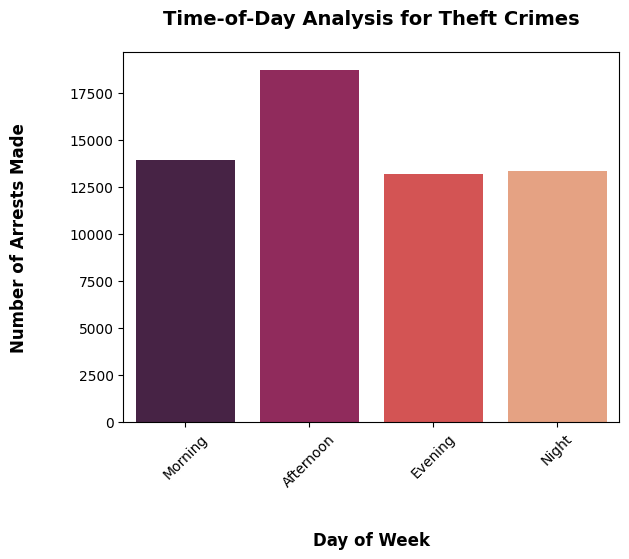

TimeOfDay
Morning      13940
Afternoon    18726
Evening      13183
Night        13352
Name: count, dtype: int64


In [15]:
time_of_day_order = ['Morning', 'Afternoon', 'Evening', 'Night']
theft_crimes = crime[crime['Primary Type'] == 'THEFT']

theft_by_tod = (theft_crimes['TimeOfDay'].value_counts().reindex(time_of_day_order).fillna(0).astype(int))

sns.barplot(x=theft_by_tod.index, y=theft_by_tod.values, palette='rocket')
plt.xticks(rotation=45)
plt.xlabel('Day of Week', fontsize=12, fontweight='bold', labelpad=30)
plt.ylabel('Number of Arrests Made', fontsize=12, fontweight='bold',labelpad=30)
plt.title('Time-of-Day Analysis for Theft Crimes', fontsize=14, fontweight='bold', pad=20)
plt.show()

print(theft_by_tod)

<div style="background: #f5f9ff; color: #2c3e50; padding: 20px; border-radius: 10px; margin-top: 50px; border: 1px solid #e1ebff; position: relative;">
<div style="position: absolute; top: -10px; left: 20px; background: #5c6bc0; color: white; padding: 10px 18px; border-radius: 20px; font-size: 0.8em; font-weight: bold;">
ANALYSIS INSIGHT
</div>
<p style="margin: 15px 0 0 0; font-size: 1.1em; line-height: 1.6;">
Most thefts happen in the afternoon, with 18,726 cases. Mornings have 13,940, evenings 13,183, and nights 13,352. Theft is more likely when places are crowded, like during lunch, after school, or commuting.
</p>
<p style="margin: 15px 0 0 0; font-size: 1.1em; line-height: 1.6;">
Public safety messages should be shared in the late morning and afternoon to remind people to watch their belongings.
</p>
</div>

<hr style="border: none; height: 2px; background: linear-gradient(to right, transparent, #5c6bc0, transparent); margin: 25px auto; width: 70%;">
<div style="background: #f8f9fa; color: #2c3e50; padding: 25px; border-radius: 10px; margin: 25px 0; border-left: 5px solid #5c6bc0; border-right: 5px solid #5c6bc0; box-shadow: 0 4px 12px rgba(0,0,0,0.06);">
<h2 style="color: #1a237e; margin: 0 0 10px 0; font-weight: 700; font-size: 1.8em; text-align: center;">
Question 2
</h2>
<h3 style="color: #2c3e50; margin: 0; font-weight: 600; font-size: 1.1em; text-align: center; line-height: 1.5;">
Is there a certain hour when weapons violations go up that might show gang activity?
</h3>
</div>

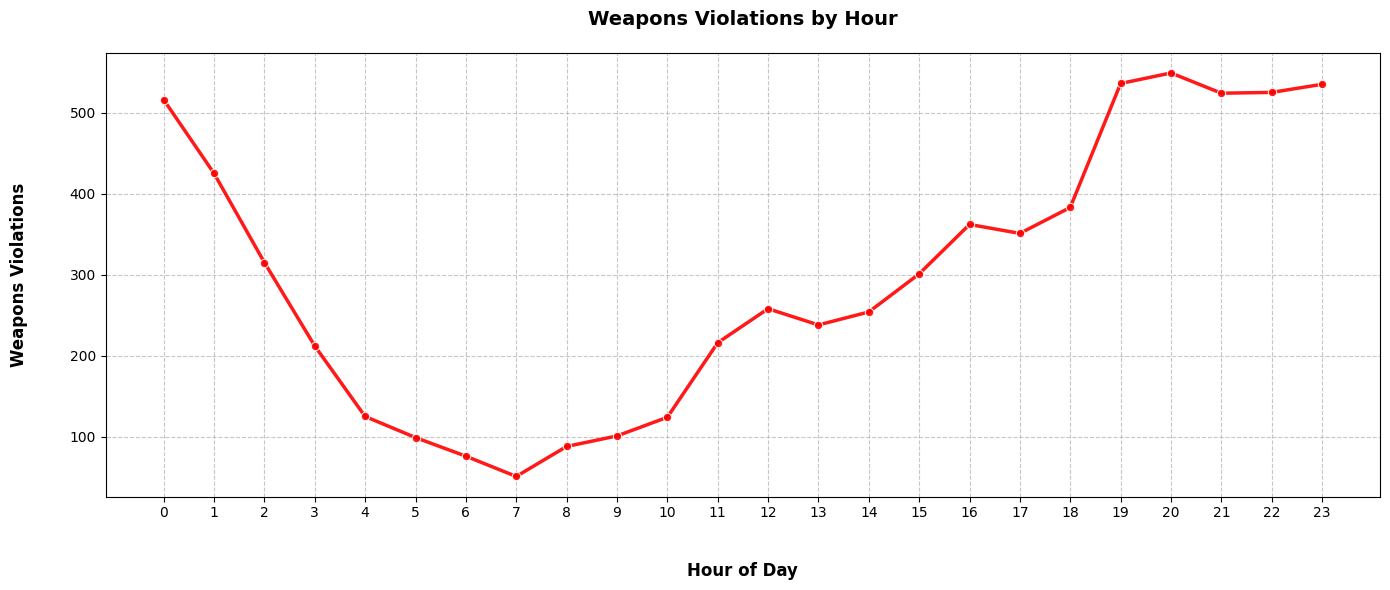

Hour
0     516
1     425
2     315
3     212
4     125
5      99
6      76
7      51
8      88
9     101
10    124
11    216
12    258
13    238
14    254
15    301
16    362
17    351
18    383
19    536
20    549
21    524
22    525
23    535
Name: count, dtype: int64


In [16]:
plt.figure(figsize=(14, 6)) 
weapons = crime[crime['Primary Type'] == 'WEAPONS VIOLATION'] 
weapons_hourly = weapons['Hour'].value_counts().sort_index() 
sns.lineplot(x=weapons_hourly.index, y=weapons_hourly.values, marker='o', linewidth=2.5, color='red',alpha=0.9) 
plt.xticks(range(0, 24)) 
plt.xlabel('Hour of Day', fontsize=12, fontweight='bold', labelpad=30)
plt.ylabel('Weapons Violations', fontsize=12, fontweight='bold', labelpad=30) 
plt.title('Weapons Violations by Hour', fontsize=14, fontweight='bold', pad=20)
plt.grid(True, linestyle='--', alpha=0.7) 
plt.tight_layout() 
plt.show() 
print(weapons_hourly)

<div style="background: #f5f9ff; color: #2c3e50; padding: 20px; border-radius: 10px; margin-top: 50px; border: 1px solid #e1ebff; position: relative;">
<div style="position: absolute; top: -10px; left: 20px; background: #5c6bc0; color: white; padding: 10px 18px; border-radius: 20px; font-size: 0.8em; font-weight: bold;">
ANALYSIS INSIGHT
</div>
<p style="margin: 15px 0 0 0; font-size: 1.1em; line-height: 1.6;">
Weapons violations are not spread evenly throughout the day. </p>
    
<p style="margin: 15px 0 0 0; font-size: 1.1em; line-height: 1.6;">
They are lowest in the early morning from 5 AM to 8 AM, with the lowest count of 51 at 7 AM. The numbers rise slightly in the late morning and early afternoon. The highest happens in the late afternoon and evening, between 6 PM and 11 PM. The most incidents occur at 8 PM (549) followed by 7 PM (536) and 10 PM (535). </p>
    
<p style="margin: 15px 0 0 0; font-size: 1.1em; line-height: 1.6;">
This time, from the end of the workday into the night, is the most dangerous for weapons violations. The increase may be linked to more people being out socially and fewer police around. This could also be related to gang activity or other group conflicts and deserves further investigation.</p>
</div>

<hr style="border: none; height: 2px; background: linear-gradient(to right, transparent, #5c6bc0, transparent); margin: 25px auto; width: 70%;">
<div style="background: #f8f9fa; color: #2c3e50; padding: 25px; border-radius: 10px; margin: 25px 0; border-left: 5px solid #5c6bc0; border-right: 5px solid #5c6bc0; box-shadow: 0 4px 12px rgba(0,0,0,0.06);">
<h2 style="color: #1a237e; margin: 0 0 10px 0; font-weight: 700; font-size: 1.8em; text-align: center;">
Question 3
</h2>
<h3 style="color: #2c3e50; margin: 0; font-weight: 600; font-size: 1.1em; text-align: center; line-height: 1.5;">
Has there been a change in the crime between 2024 and 2025?
</h3>
</div>

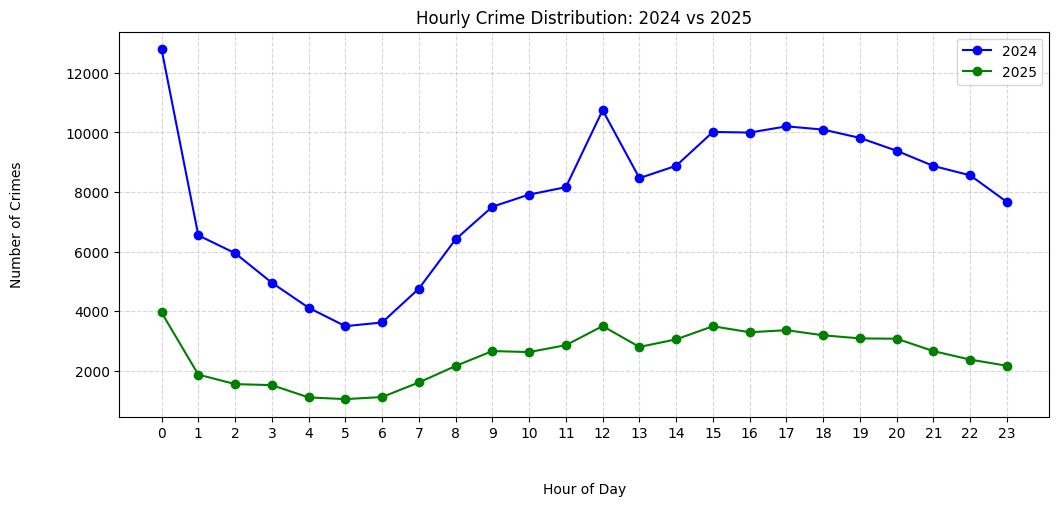

       2024  2025
Hour             
0     12793  3959
1      6546  1874
2      5948  1556
3      4957  1520
4      4118  1109
5      3499  1052
6      3623  1121
7      4757  1611
8      6412  2164
9      7507  2664
10     7913  2630
11     8162  2861
12    10745  3502
13     8466  2802
14     8879  3057
15    10015  3496
16     9993  3295
17    10202  3364
18    10093  3193
19     9814  3088
20     9382  3078
21     8872  2662
22     8559  2377
23     7663  2170


In [17]:
twenty_24 = crime[crime['Year']==2024].groupby('Hour').size()
twenty_25 = crime[crime['Year']==2025].groupby('Hour').size()

plt.figure(figsize=(12,5))
plt.plot(twenty_24.index, twenty_24.values, marker='o', label='2024', color='blue')
plt.plot(twenty_25.index, twenty_25.values, marker='o', label='2025', color='green')

plt.xticks(range(0,24))
plt.xlabel('Hour of Day', labelpad=30)
plt.ylabel('Number of Crimes', labelpad=30)
plt.title('Hourly Crime Distribution: 2024 vs 2025')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

print(twenty_24.sort_index().to_frame('2024').join(twenty_25.sort_index().to_frame('2025')))

<div style="background: #f5f9ff; color: #2c3e50; padding: 20px; border-radius: 10px; margin-top: 50px; border: 1px solid #e1ebff; position: relative;">
<div style="position: absolute; top: -10px; left: 20px; background: #5c6bc0; color: white; padding: 10px 18px; border-radius: 20px; font-size: 0.8em; font-weight: bold;">
ANALYSIS INSIGHT
</div>
<p style="margin: 15px 0 0 0; font-size: 1.1em; line-height: 1.6;">
Crime dropped a lot from 2024 to 2025. Every hour in 2025 has fewer crimes than the same hour in 2024. The biggest drop is at midnight, from 12,793 to 3,959, a decrease of over 8,800. Both busy hours, like 12 PM and 6 PM, and quiet hours, like 4 AM, also show big reductions.</p>
</div>

<hr style="border: none; height: 2px; background: linear-gradient(to right, transparent, #5c6bc0, transparent); margin: 25px auto; width: 70%;">
<div style="background: #f8f9fa; color: #2c3e50; padding: 25px; border-radius: 10px; margin: 25px 0; border-left: 5px solid #5c6bc0; border-right: 5px solid #5c6bc0; box-shadow: 0 4px 12px rgba(0,0,0,0.06);">
<h2 style="color: #1a237e; margin: 0 0 10px 0; font-weight: 700; font-size: 1.8em; text-align: center;">
Question 4
</h2>
<h3 style="color: #2c3e50; margin: 0; font-weight: 600; font-size: 1.1em; text-align: center; line-height: 1.5;">
Which day of the week sees the highest number of arrests to help us plan court schedules and allocate prosecutors more effectively?
</h3>
</div>

In [1]:
plt.figure(figsize=(12, 6))

arrests = crime[crime['Arrest'] == True]

arrests_by_day = (arrests.groupby('DayOfWeek').size().reindex(range(7)).fillna(0))

# Manually map numbers (0–6) to weekday names
day_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

sns.barplot(x=day_names, y=arrests_by_day.values, palette='viridis')
plt.xticks(rotation=45)
plt.xlabel('Day of Week', fontsize=12, fontweight='bold', labelpad=30)
plt.ylabel('Number of Arrests Made', fontsize=12, fontweight='bold', labelpad=30)
plt.title('Arrests by Day of Week', fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

print(arrests_by_day)


NameError: name 'plt' is not defined

<div style="background: #f5f9ff; color: #2c3e50; padding: 20px; border-radius: 10px; margin-top: 50px; border: 1px solid #e1ebff; position: relative;">
<div style="position: absolute; top: -10px; left: 20px; background: #5c6bc0; color: white; padding: 10px 18px; border-radius: 20px; font-size: 0.8em; font-weight: bold;">
ANALYSIS INSIGHT
</div>
<p style="margin: 15px 0 0 0; font-size: 1.1em; line-height: 1.6;">
Most arrests happen mid-week. Monday has the most with 5,311, Friday has 5,296, and Tuesday has 5,215. Weekends have the fewest, Wednesday 5,000 and Saturday 5,011. </p>
<p style="margin: 15px 0 0 0; font-size: 1.1em; line-height: 1.6;">
Courts should assign more prosecutors and schedule additional hearings on Monday and Friday. While it is best to focus on maintaining public safety every day.</p>
</div>

<hr style="border: none; height: 2px; background: linear-gradient(to right, transparent, #5c6bc0, transparent); margin: 25px auto; width: 70%;">
<div style="background: #f8f9fa; color: #2c3e50; padding: 25px; border-radius: 10px; margin: 25px 0; border-left: 5px solid #5c6bc0; border-right: 5px solid #5c6bc0; box-shadow: 0 4px 12px rgba(0,0,0,0.06);">
<h2 style="color: #1a237e; margin: 0 0 10px 0; font-weight: 700; font-size: 1.8em; text-align: center;">
Question 5
</h2>
<h3 style="color: #2c3e50; margin: 0; font-weight: 600; font-size: 1.1em; text-align: center; line-height: 1.5;">
Which locations have the highest concentration of narcotics incidents, and do these places also show high arrest success rates?
</h3>
</div>

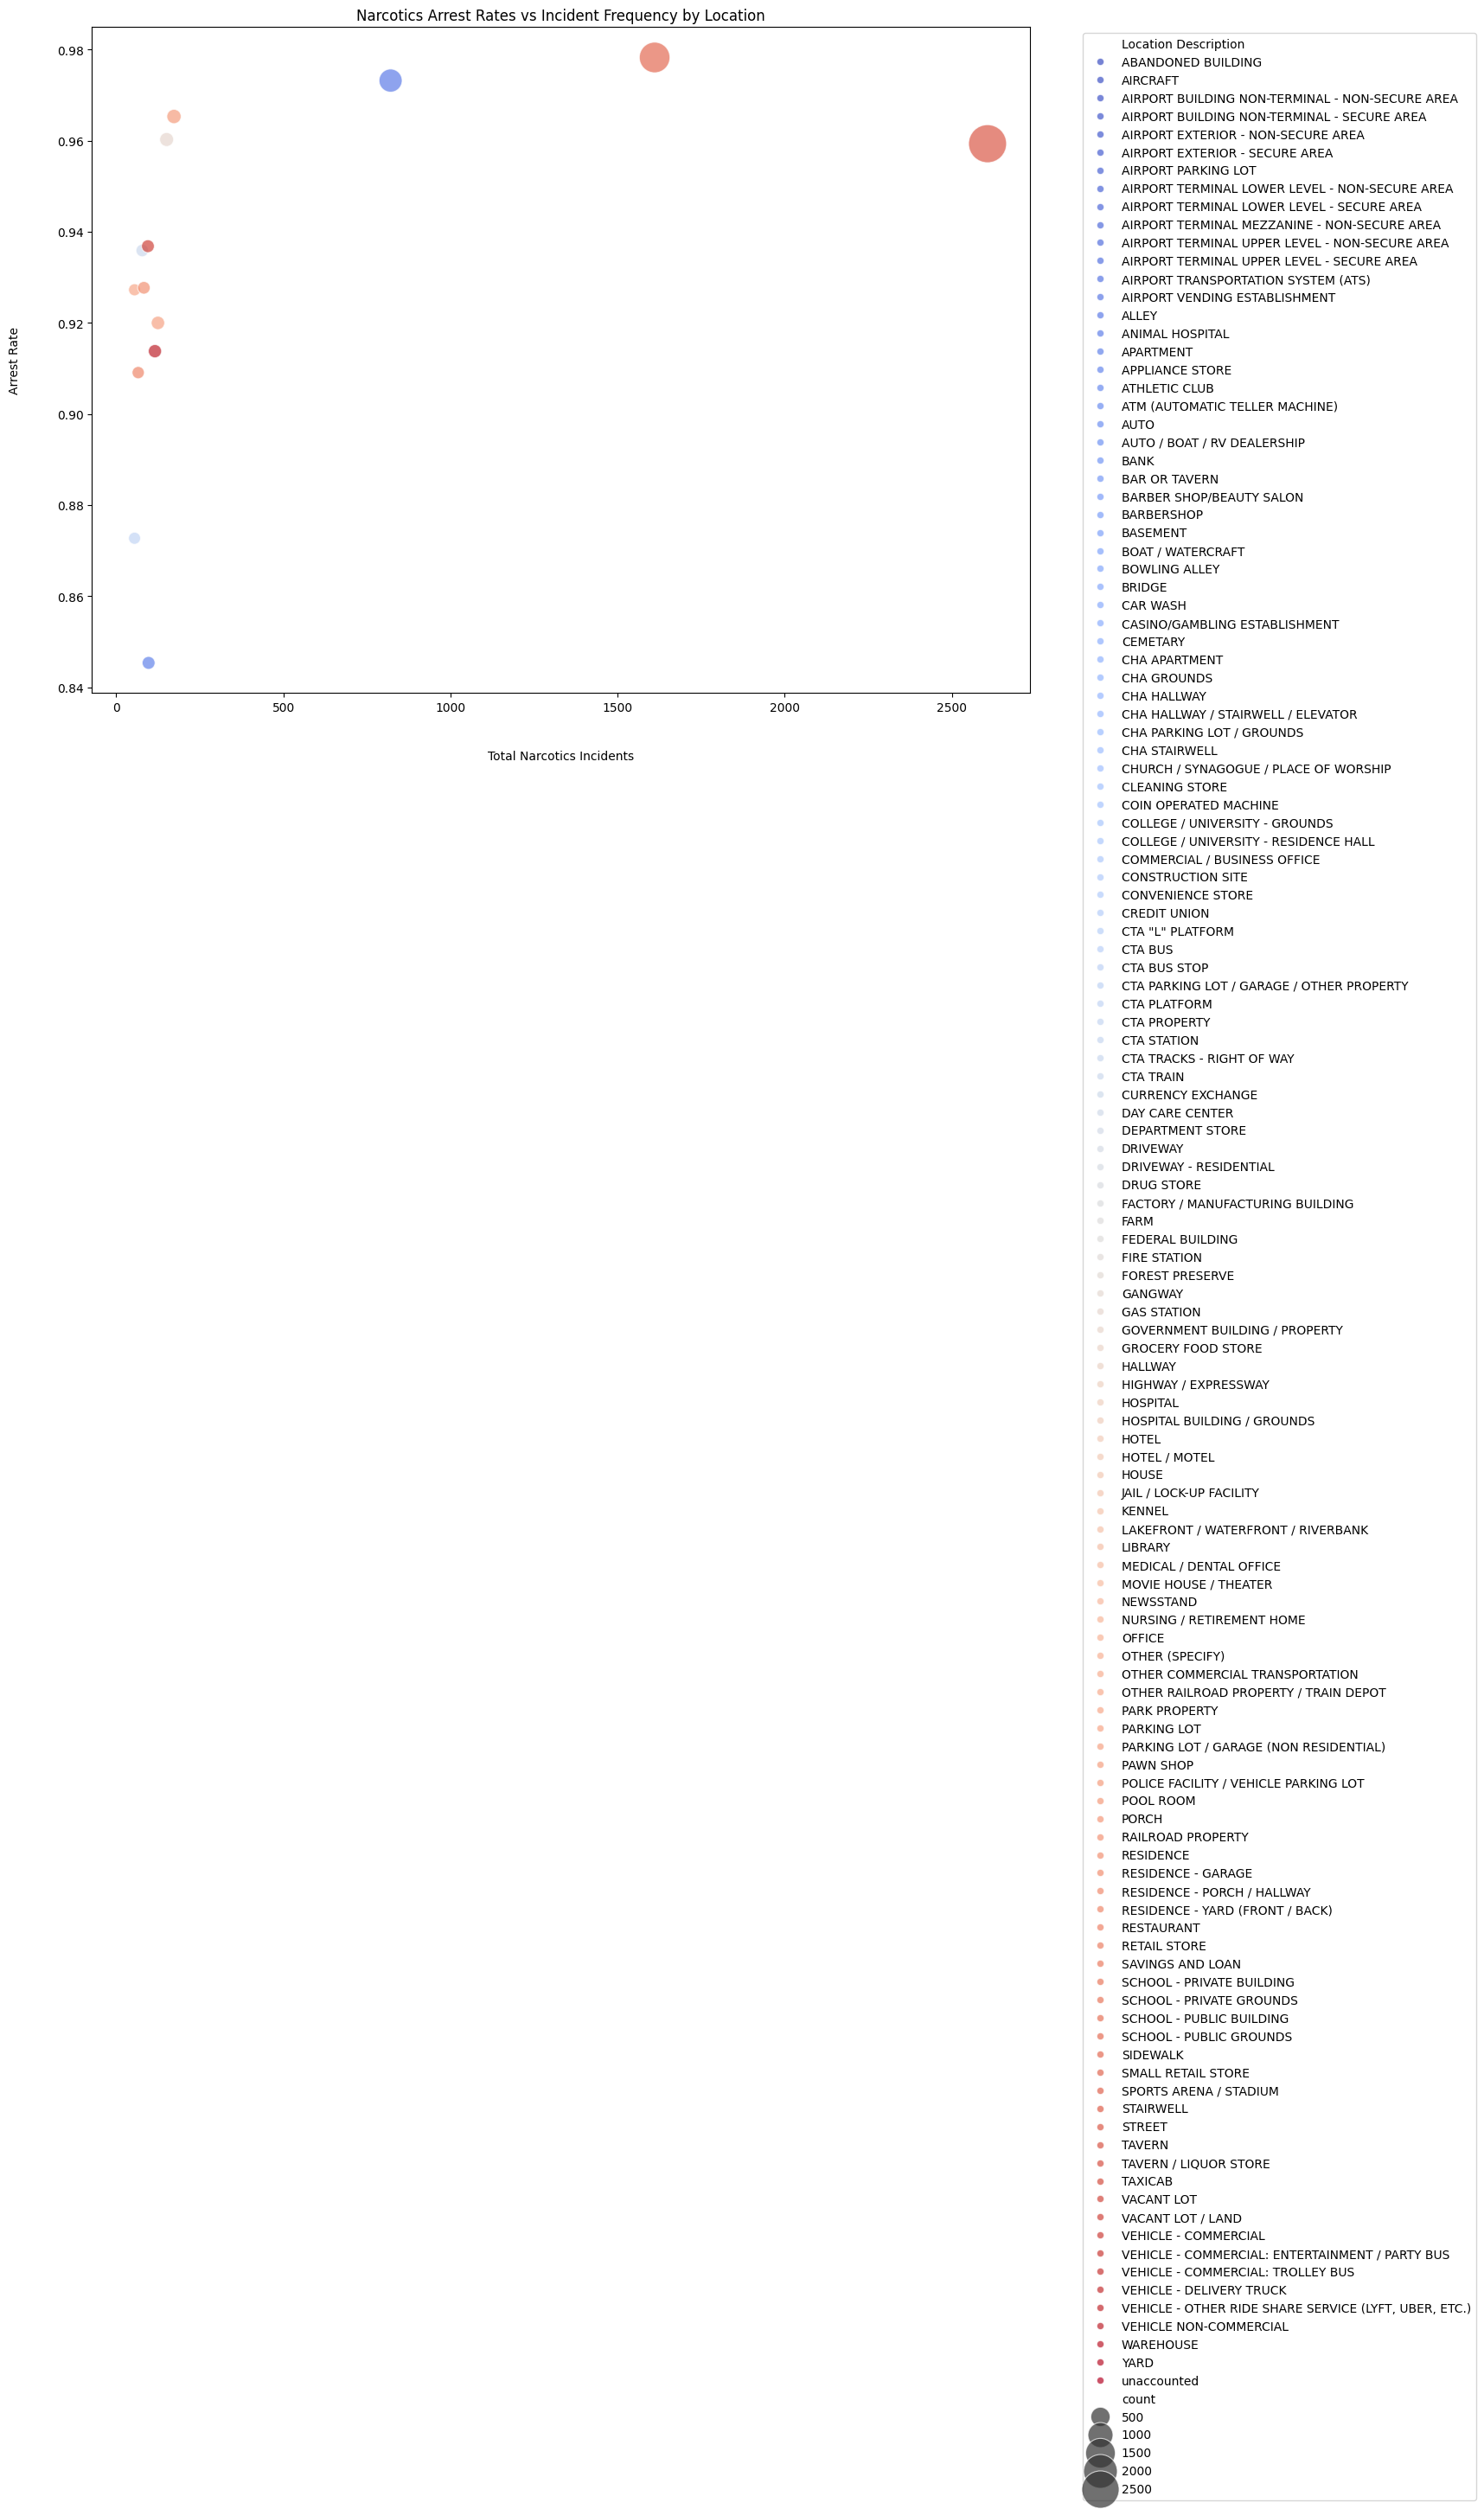

                       Location Description  count      mean
14                                    ALLEY    821  0.973203
16                                APARTMENT     97  0.845361
52                             CTA PLATFORM     55  0.872727
56                                CTA TRAIN     78  0.935897
69                              GAS STATION    151  0.960265
91                            PARK PROPERTY     55  0.927273
93   PARKING LOT / GARAGE (NON RESIDENTIAL)    125  0.920000
95    POLICE FACILITY / VEHICLE PARKING LOT    173  0.965318
99                                RESIDENCE     83  0.927711
102         RESIDENCE - YARD (FRONT / BACK)     66  0.909091
110                                SIDEWALK   1611  0.978274
114                                  STREET   2607  0.959340
119                       VACANT LOT / LAND     95  0.936842
125                  VEHICLE NON-COMMERCIAL    116  0.913793


In [19]:
plt.figure(figsize=(14, 10))
narcotics_locations = crime[crime['Primary Type'] == 'NARCOTICS']
location_arrests = narcotics_locations.groupby('Location Description')['Arrest'].agg(['count', 'mean']).reset_index()
location_arrests = location_arrests[location_arrests['count'] > 50] 
sns.scatterplot(data=location_arrests, x='count', y='mean', hue='Location Description', size='count', sizes=(100, 1000), palette='coolwarm', alpha=0.7)

plt.xlabel('Total Narcotics Incidents', labelpad=30)
plt.ylabel('Arrest Rate', labelpad=30)
plt.title('Narcotics Arrest Rates vs Incident Frequency by Location')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

print(location_arrests)

<div style="background: #f5f9ff; color: #2c3e50; padding: 20px; border-radius: 10px; margin-top: 50px; border: 1px solid #e1ebff; position: relative;">
<div style="position: absolute; top: -10px; left: 20px; background: #5c6bc0; color: white; padding: 10px 18px; border-radius: 20px; font-size: 0.8em; font-weight: bold;">
ANALYSIS INSIGHT
</div>
<p style="margin: 15px 0 0 0; font-size: 1.1em; line-height: 1.6;">
Most narcotics incidents happen in certain places. Streets have 2,607 cases and sidewalk have 1,611. Arrest rates in these areas are high, around 96%. Alleys have 821 cases but the highest arrest rate at over 97%.</p>
<p style="margin: 15px 0 0 0; font-size: 1.1em; line-height: 1.6;">
 Apartments have a lower arrest rate of 84.5% because private property makes enforcement harder. The busiest places also have the most successful arrests.</p>
</div>

<hr style="border: none; height: 2px; background: linear-gradient(to right, transparent, #5c6bc0, transparent); margin: 25px auto; width: 70%;">
<div style="background: #f8f9fa; color: #2c3e50; padding: 25px; border-radius: 10px; margin: 25px 0; border-left: 5px solid #5c6bc0; border-right: 5px solid #5c6bc0; box-shadow: 0 4px 12px rgba(0,0,0,0.06);">
<h2 style="color: #1a237e; margin: 0 0 10px 0; font-weight: 700; font-size: 1.8em; text-align: center;">
Question 6
</h2>
<h3 style="color: #2c3e50; margin: 0; font-weight: 600; font-size: 1.1em; text-align: center; line-height: 1.5;">
Which months show the highest criminal activity?
</h3>
</div>

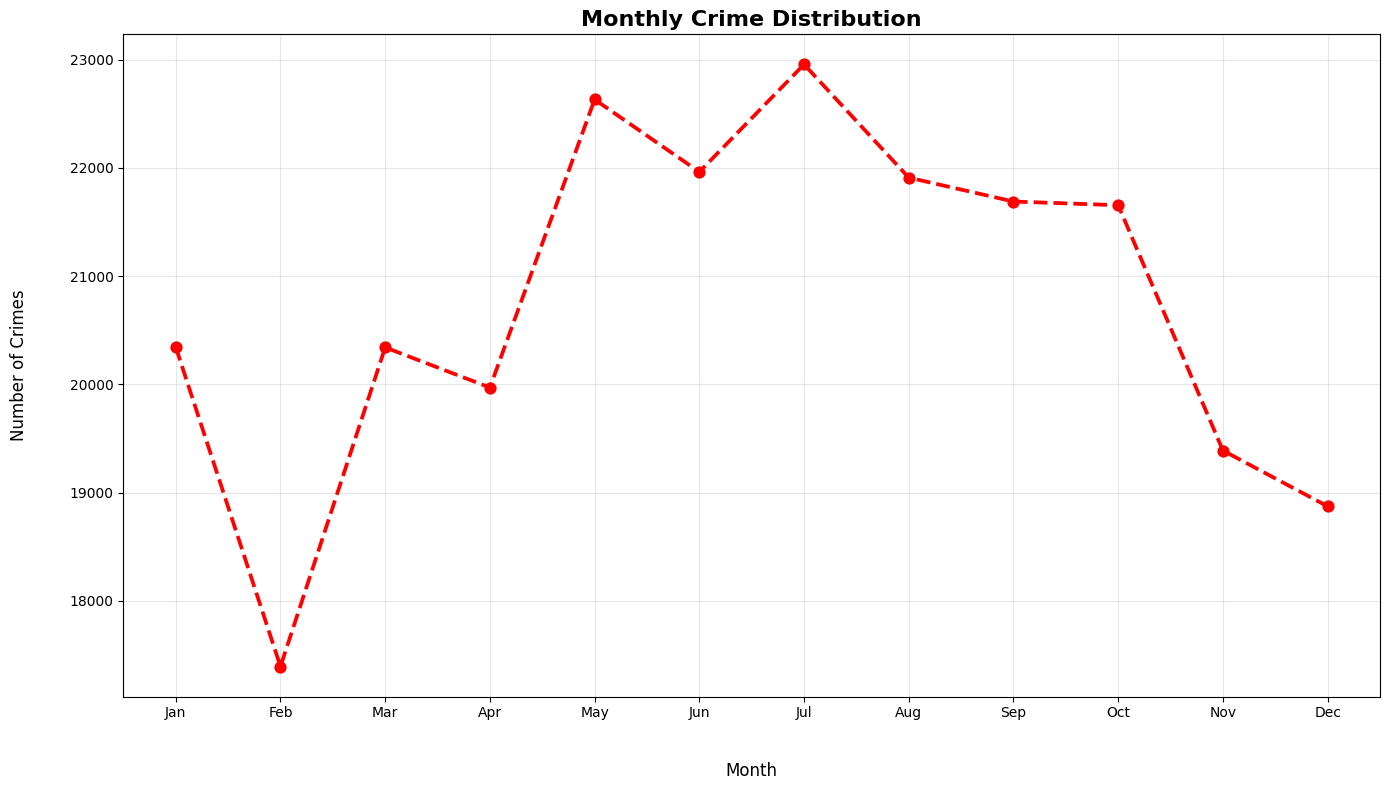

   Month  Number_Of_Crimes
0    Jan             20344
1    Feb             17393
2    Mar             20342
3    Apr             19971
4    May             22633
5    Jun             21964
6    Jul             22957
7    Aug             21911
8    Sep             21690
9    Oct             21656
10   Nov             19389
11   Dec             18873


In [20]:
plt.figure(figsize=(14, 8))

monthly_crimes = crime.groupby('Month').size().reset_index(name='Number_Of_Crimes')
monthly_crimes = monthly_crimes.sort_values('Month')
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
monthly_crimes['Month'] = monthly_crimes['Month'].map(lambda x: month_names[x-1])

sns.pointplot(x='Month', y='Number_Of_Crimes', data=monthly_crimes, color='red', markers='o', linestyles='--')
plt.title('Monthly Crime Distribution', fontsize=16, fontweight='bold')
plt.xlabel('Month', fontsize=12, labelpad=30)
plt.ylabel('Number of Crimes', fontsize=12, labelpad=30)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

print(monthly_crimes)

<div style="background: #f5f9ff; color: #2c3e50; padding: 20px; border-radius: 10px; margin-top: 50px; border: 1px solid #e1ebff; position: relative;">
<div style="position: absolute; top: -10px; left: 20px; background: #5c6bc0; color: white; padding: 10px 18px; border-radius: 20px; font-size: 0.8em; font-weight: bold;">
ANALYSIS INSIGHT
</div>
<p style="margin: 15px 0 0 0; font-size: 1.1em; line-height: 1.6;">
Crime changes with the seasons. January is high, drops in February, and rises through spring. July has the most cases at 22,957 followed by May and August. Crime falls after summer and is lowest in December. Warmer weather and longer days may increase crime.</p>
</div>

<hr style="border: none; height: 2px; background: linear-gradient(to right, transparent, #5c6bc0, transparent); margin: 25px auto; width: 70%;">
<div style="background: #f8f9fa; color: #2c3e50; padding: 25px; border-radius: 10px; margin: 25px 0; border-left: 5px solid #5c6bc0; border-right: 5px solid #5c6bc0; box-shadow: 0 4px 12px rgba(0,0,0,0.06);">
<h2 style="color: #1a237e; margin: 0 0 10px 0; font-weight: 700; font-size: 1.8em; text-align: center;">
Question 7
</h2>
<h3 style="color: #2c3e50; margin: 0; font-weight: 600; font-size: 1.1em; text-align: center; line-height: 1.5;">
Which districts have more cases of specific offenses, and how are different crimes distributed across the city?
</h3>
</div>

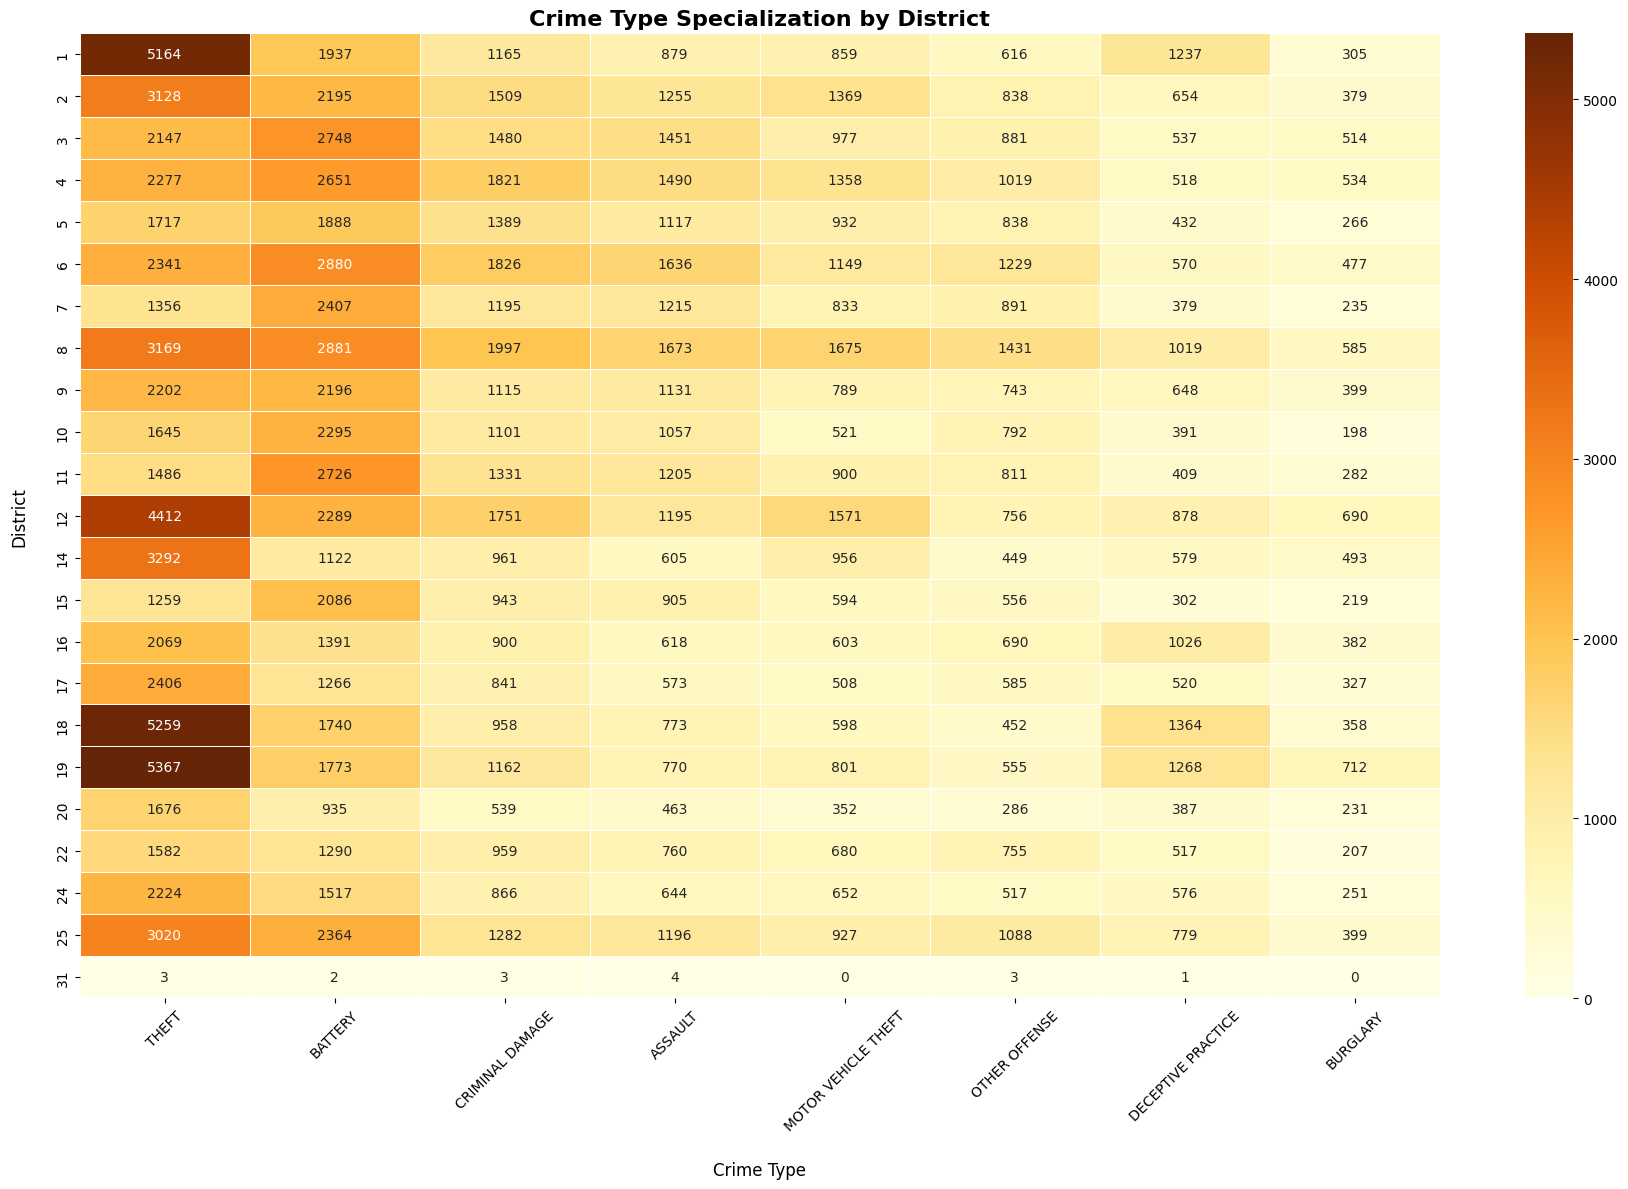

 THEFT  BATTERY  CRIMINAL DAMAGE  ASSAULT  MOTOR VEHICLE THEFT  OTHER OFFENSE  DECEPTIVE PRACTICE  BURGLARY
  5164     1937             1165      879                  859            616                1237       305
  3128     2195             1509     1255                 1369            838                 654       379
  2147     2748             1480     1451                  977            881                 537       514
  2277     2651             1821     1490                 1358           1019                 518       534
  1717     1888             1389     1117                  932            838                 432       266
  2341     2880             1826     1636                 1149           1229                 570       477
  1356     2407             1195     1215                  833            891                 379       235
  3169     2881             1997     1673                 1675           1431                1019       585
  2202     2196             

In [21]:
plt.figure(figsize=(18, 12))

crime_counts = crime.groupby(['District', 'Primary Type']).size().unstack(fill_value=0)
top8_crimes = crime_counts.sum().nlargest(8).index
crime_counts_top8 = crime_counts[top8_crimes]

sns.heatmap(crime_counts_top8, cmap='YlOrBr', annot=True, fmt='d', linewidths=0.5)
plt.title('Crime Type Specialization by District', fontsize=16, fontweight='bold')
plt.xlabel('Crime Type', fontsize=12, labelpad=20)
plt.ylabel('District', fontsize=12, labelpad=20)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print(crime_counts_top8.to_string(index=False))


<div style="background: #f5f9ff; color: #2c3e50; padding: 20px; border-radius: 10px; margin-top: 50px; border: 1px solid #e1ebff; position: relative;">
<div style="position: absolute; top: -10px; left: 20px; background: #5c6bc0; color: white; padding: 10px 18px; border-radius: 20px; font-size: 0.8em; font-weight: bold;">
ANALYSIS INSIGHT
</div>
<p style="margin: 15px 0 0 0; font-size: 1.1em; line-height: 1.6;">
Theft is the most common, especially in Districts 1 and 18 with over 5,000 cases each. Battery is common in many districts but is highest in central areas like 6, 8, and 11. Deceptive Practice, including fraud, is focused in Districts 1, 18, and 15. District 15 also has many Other Offenses.</p>
<p style="margin: 15px 0 0 0; font-size: 1.1em; line-height: 1.6;">
Some districts have more property crimes, while others have more violence or financial crimes. This can help decide how to use police resources.</p>
</div>

<hr style="border: none; height: 2px; background: linear-gradient(to right, transparent, #5c6bc0, transparent); margin: 25px auto; width: 70%;">
<div style="background: #f8f9fa; color: #2c3e50; padding: 25px; border-radius: 10px; margin: 25px 0; border-left: 5px solid #5c6bc0; border-right: 5px solid #5c6bc0; box-shadow: 0 4px 12px rgba(0,0,0,0.06);">
<h2 style="color: #1a237e; margin: 0 0 10px 0; font-weight: 700; font-size: 1.8em; text-align: center;">
Question 8
</h2>
<h3 style="color: #2c3e50; margin: 0; font-weight: 600; font-size: 1.1em; text-align: center; line-height: 1.5;">
How do arrest rates for domestic battery in Ward 7 compare to surrounding wards (8, 9, 10)
</h3>
</div>

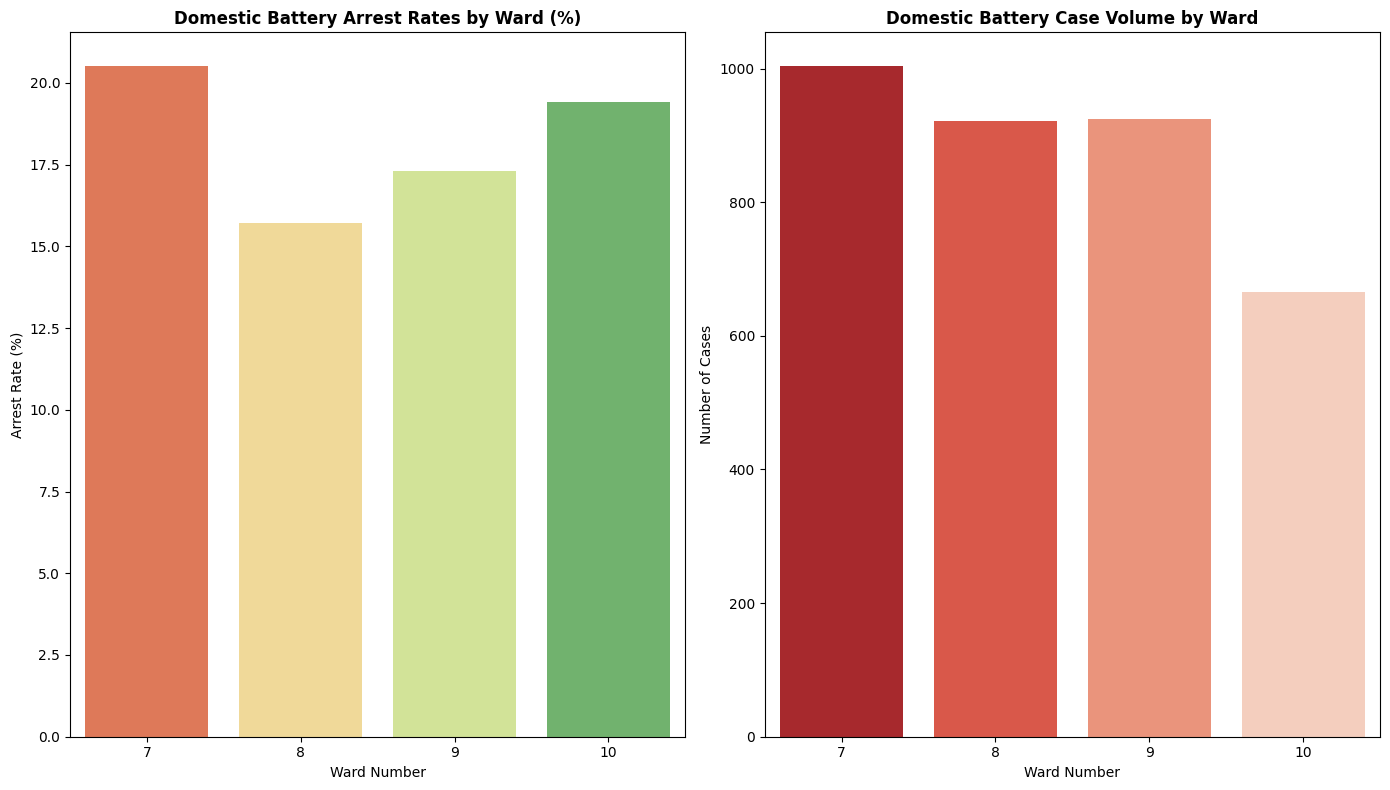

Ward 7 Arrest Rate: 20.5%
Ward 7 Case Volume: 1004.0
Ward 8 Arrest Rate: 15.7%
Ward 8 Case Volume: 922.0
Ward 9 Arrest Rate: 17.3%
Ward 9 Case Volume: 925.0
Ward 10 Arrest Rate: 19.4%
Ward 10 Case Volume: 665.0


In [22]:
plt.figure(figsize=(14, 8))
target_wards = [7, 8, 9, 10]
domestic_battery = crime[(crime['Primary Type'] == 'BATTERY') & (crime['Domestic'] == True) & (crime['Ward'].isin(target_wards))]

ward_arrest_rates = domestic_battery.groupby('Ward')['Arrest'].mean() * 100
ward_case_counts = domestic_battery.groupby('Ward').size()

plt.subplot(1, 2, 1)
sns.barplot(x=ward_arrest_rates.index, y=ward_arrest_rates.values, palette='RdYlGn')
plt.title('Domestic Battery Arrest Rates by Ward (%)', fontsize=12, fontweight='bold')
plt.xlabel('Ward Number')
plt.ylabel('Arrest Rate (%)')

plt.subplot(1, 2, 2)
sns.barplot(x=ward_case_counts.index, y=ward_case_counts.values, palette='Reds_r')
plt.title('Domestic Battery Case Volume by Ward', fontsize=12, fontweight='bold')
plt.xlabel('Ward Number')
plt.ylabel('Number of Cases')
plt.tight_layout()
plt.show()

for ward in range(7, 11):
    print(f"Ward {ward} Arrest Rate: {ward_arrest_rates.get(ward, 0):.1f}%")
    print(f"Ward {ward} Case Volume: {ward_case_counts.get(ward, 0):.1f}")


<div style="background: #f5f9ff; color: #2c3e50; padding: 20px; border-radius: 10px; margin-top: 50px; border: 1px solid #e1ebff; position: relative;">
<div style="position: absolute; top: -10px; left: 20px; background: #5c6bc0; color: white; padding: 10px 18px; border-radius: 20px; font-size: 0.8em; font-weight: bold;">
ANALYSIS INSIGHT
</div>
<p style="margin: 15px 0 0 0; font-size: 1.1em; line-height: 1.6;">
Ward 7 has the highest arrest rate at 20.5%, more than Wards 8 (15.7%), 9 (17.3%), and 10 (19.4%). It also has the most cases (1,004) but still makes the most arrests. Ward 8 has the lowest arrest rate even with the second-highest cases. Ward 10 has fewer cases and a decent arrest rate but is still below Ward 7.
</p>
<p style="margin: 15px 0 0 0; font-size: 1.1em; line-height: 1.6;">
Ward 7 is the most effective at arrests among these wards.
</p>
</div>

<hr style="border: none; height: 2px; background: linear-gradient(to right, transparent, #5c6bc0, transparent); margin: 25px auto; width: 70%;">
<div style="background: #f8f9fa; color: #2c3e50; padding: 25px; border-radius: 10px; margin: 25px 0; border-left: 5px solid #5c6bc0; border-right: 5px solid #5c6bc0; box-shadow: 0 4px 12px rgba(0,0,0,0.06);">
<h2 style="color: #1a237e; margin: 0 0 10px 0; font-weight: 700; font-size: 1.8em; text-align: center;">
Question 9
</h2>
<h3 style="color: #2c3e50; margin: 0; font-weight: 600; font-size: 1.1em; text-align: center; line-height: 1.5;">
Do more severe crimes, according to FBI codes, tend to happen in specific geographic areas?
</h3>
</div>

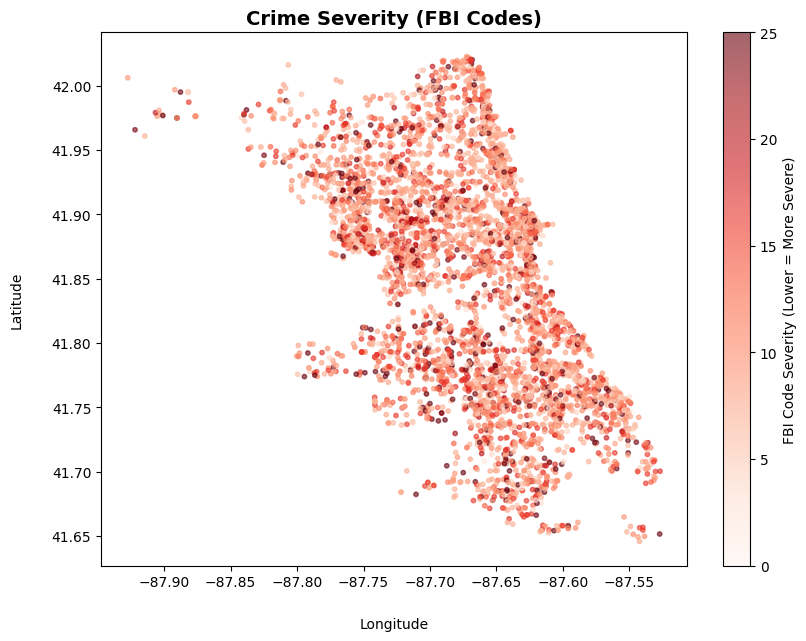

In [23]:
plt.figure(figsize=(16, 12))

sample_crime = crime.sample(n=5000, random_state=42) if len(crime) > 5000 else crime

plt.subplot(2, 2, 1)
fbi_severity = sample_crime['FBI Code'].astype('category').cat.codes
sc = plt.scatter(sample_crime['Longitude'], sample_crime['Latitude'], c=fbi_severity, cmap='Reds', alpha=0.6, s=10)
plt.colorbar(sc, label='FBI Code Severity (Lower = More Severe)')
plt.xlabel('Longitude', labelpad=20) 
plt.ylabel('Latitude', labelpad=20)
plt.title('Crime Severity (FBI Codes)', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

<div style="background: #f5f9ff; color: #2c3e50; padding: 20px; border-radius: 10px; margin-top: 50px; border: 1px solid #e1ebff; position: relative;">
<div style="position: absolute; top: -10px; left: 20px; background: #5c6bc0; color: white; padding: 10px 18px; border-radius: 20px; font-size: 0.8em; font-weight: bold;">
ANALYSIS INSIGHT
</div>
<p style="margin: 15px 0 0 0; font-size: 1.1em; line-height: 1.6;">
Serious crimes are not evenly spread across the city. Most severe crimes are in central areas, west and south of downtown. Northern areas and downtown have mostly minor crimes.</p>
</div>

<hr style="border: none; height: 2px; background: linear-gradient(to right, transparent, #5c6bc0, transparent); margin: 25px auto; width: 70%;">
<div style="background: #f8f9fa; color: #2c3e50; padding: 25px; border-radius: 10px; margin: 25px 0; border-left: 5px solid #5c6bc0; border-right: 5px solid #5c6bc0; box-shadow: 0 4px 12px rgba(0,0,0,0.06);">
<h2 style="color: #1a237e; margin: 0 0 10px 0; font-weight: 700; font-size: 1.8em; text-align: center;">
Question 10
</h2>
<h3 style="color: #2c3e50; margin: 0; font-weight: 600; font-size: 1.1em; text-align: center; line-height: 1.5;">
Are domestic violence incidents happening at different times of day compared to non-domestic assaults and battery?
</h3>
</div>

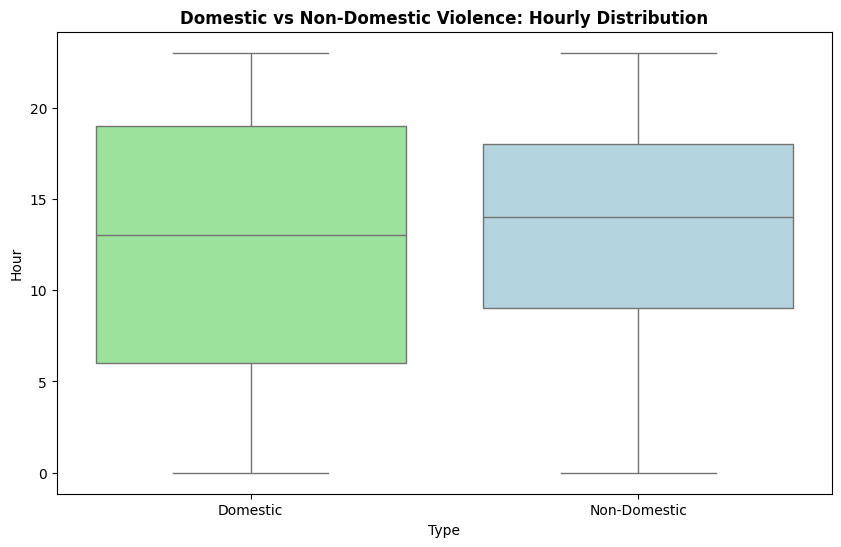

In [24]:
plt.figure(figsize=(10, 6))

comparison_data = crime[(crime['Primary Type'] == 'BATTERY') | (crime['Primary Type'] == 'ASSAULT')]
comparison_data['Type'] = comparison_data['Domestic'].map({True: 'Domestic', False: 'Non-Domestic'})

sns.boxplot(data=comparison_data, x='Type', y='Hour', palette=['lightgreen', 'lightblue'])
plt.title('Domestic vs Non-Domestic Violence: Hourly Distribution', fontweight='bold')
plt.show()

<div style="background: #f5f9ff; color: #2c3e50; padding: 20px; border-radius: 10px; margin-top: 50px; border: 1px solid #e1ebff; position: relative;">
<div style="position: absolute; top: -10px; left: 20px; background: #5c6bc0; color: white; padding: 10px 18px; border-radius: 20px; font-size: 0.8em; font-weight: bold;">
ANALYSIS INSIGHT
</div>
<p style="margin: 15px 0 0 0; font-size: 1.1em; line-height: 1.6;">
Domestic violence happens mostly in the evening and night. The median time is late, and most cases occur within this period.
</p>
<p style="margin: 15px 0 0 0; font-size: 1.1em; line-height: 1.6;">
Non-domestic assaults and batteries happen more evenly during the day. Their median time is earlier, and cases are spread out, but they are more common in the afternoon and early evening.</p>
</div>

<hr style="border: none; height: 2px; background: linear-gradient(to right, transparent, #5c6bc0, transparent); margin: 25px auto; width: 70%;">
<div style="background: #f8f9fa; color: #2c3e50; padding: 25px; border-radius: 10px; margin: 25px 0; border-left: 5px solid #5c6bc0; border-right: 5px solid #5c6bc0; box-shadow: 0 4px 12px rgba(0,0,0,0.06);">
<h2 style="color: #1a237e; margin: 0 0 10px 0; font-weight: 700; font-size: 1.8em; text-align: center;">
Question 11
</h2>
<h3 style="color: #2c3e50; margin: 0; font-weight: 600; font-size: 1.1em; text-align: center; line-height: 1.5;">
How can the Board of Education identify the types and timing of crimes occurring within school zones from 7 AM to 4 PM to improve student safety measures?</h3>
</div>

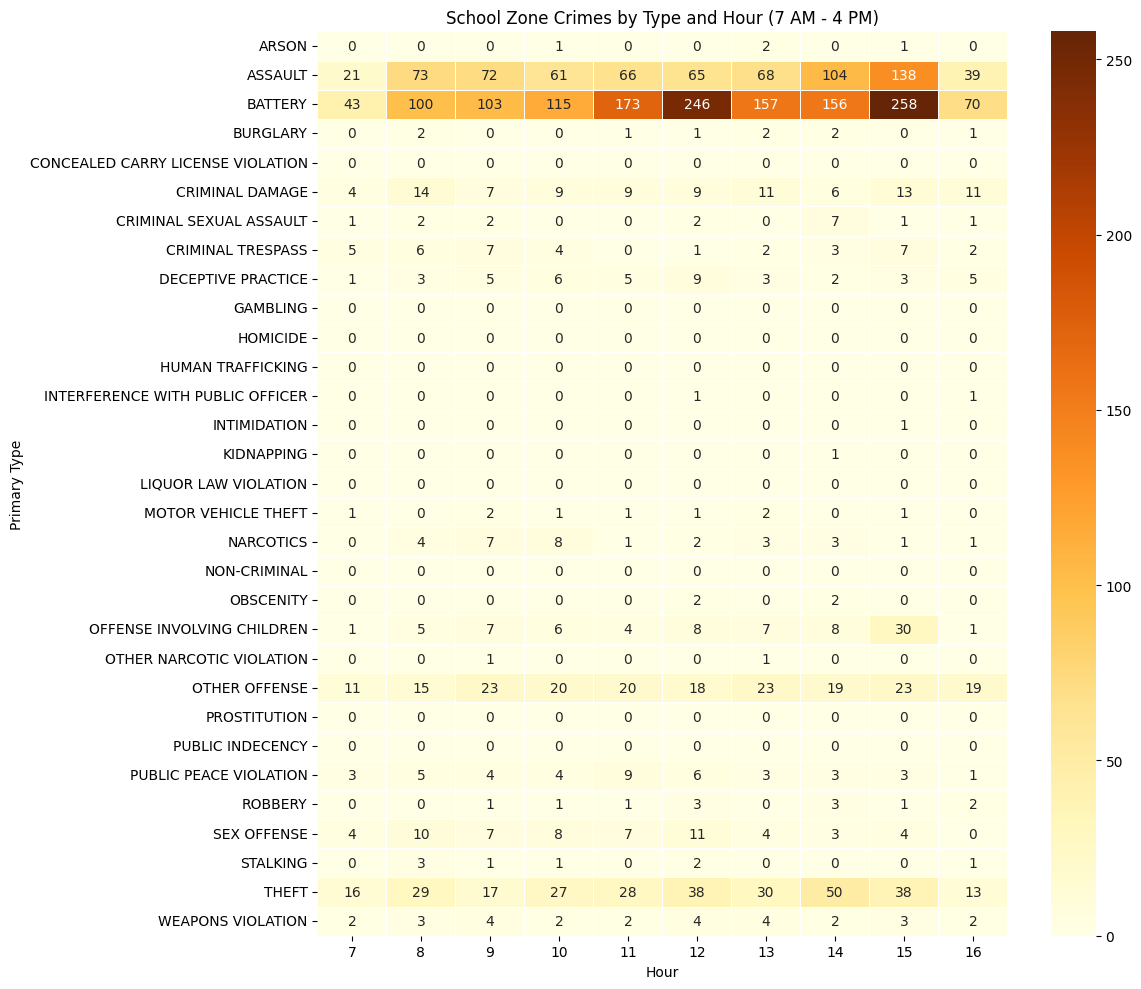

In [25]:
school_crimes = crime[(crime['Location Description'].str.contains('SCHOOL', na=False)) |(crime['Description'].str.contains('SCHOOL', na=False))]
school_hours = school_crimes[school_crimes['Hour'].between(7, 16)]

plt.figure(figsize=(12, 10))
crime_matrix = school_hours.groupby(['Primary Type', 'Hour']).size().unstack().fillna(0)
sns.heatmap(crime_matrix, cmap='YlOrBr', linewidths=0.5, annot=True, fmt='.0f')
plt.title('School Zone Crimes by Type and Hour (7 AM - 4 PM)')
plt.tight_layout()
plt.show()

<div style="background: #f5f9ff; color: #2c3e50; padding: 20px; border-radius: 10px; margin-top: 50px; border: 1px solid #e1ebff; position: relative;">
<div style="position: absolute; top: -10px; left: 20px; background: #5c6bc0; color: white; padding: 10px 18px; border-radius: 20px; font-size: 0.8em; font-weight: bold;">
ANALYSIS INSIGHT
</div>
<p style="margin: 15px 0 0 0; font-size: 1.1em; line-height: 1.6;">
School-zone crime from 7 AM to 4 PM shows the most common crimes and when they happen. Battery is the most frequent, with 258 incidents at 3 PM and 157 at 1 PM. Assault has 138 incidents at 3 PM. Theft has 50 incidents at 2 PM, when students leave campus.
<p style="margin: 15px 0 0 0; font-size: 1.1em; line-height: 1.6;">
To improve safety, the Board should increase supervision in hallways, cafeterias, and school yards from 11 AM to 4 PM for Battery and Assault,and have more staff at dismissal to prevent Theft and other crimes
.</p>
</div>

<hr style="border: none; height: 2px; background: linear-gradient(to right, transparent, #5c6bc0, transparent); margin: 25px auto; width: 70%;">
<div style="background: #f8f9fa; color: #2c3e50; padding: 25px; border-radius: 10px; margin: 25px 0; border-left: 5px solid #5c6bc0; border-right: 5px solid #5c6bc0; box-shadow: 0 4px 12px rgba(0,0,0,0.06);">
<h2 style="color: #1a237e; margin: 0 0 10px 0; font-weight: 700; font-size: 1.8em; text-align: center;">
Question 12
</h2>
<h3 style="color: #2c3e50; margin: 0; font-weight: 600; font-size: 1.1em; text-align: center; line-height: 1.5;">
Which districts show high crime volumes but low arrest rates, and how can the Police Commissioner's Office use this to improve district performance?</h3>
</div>

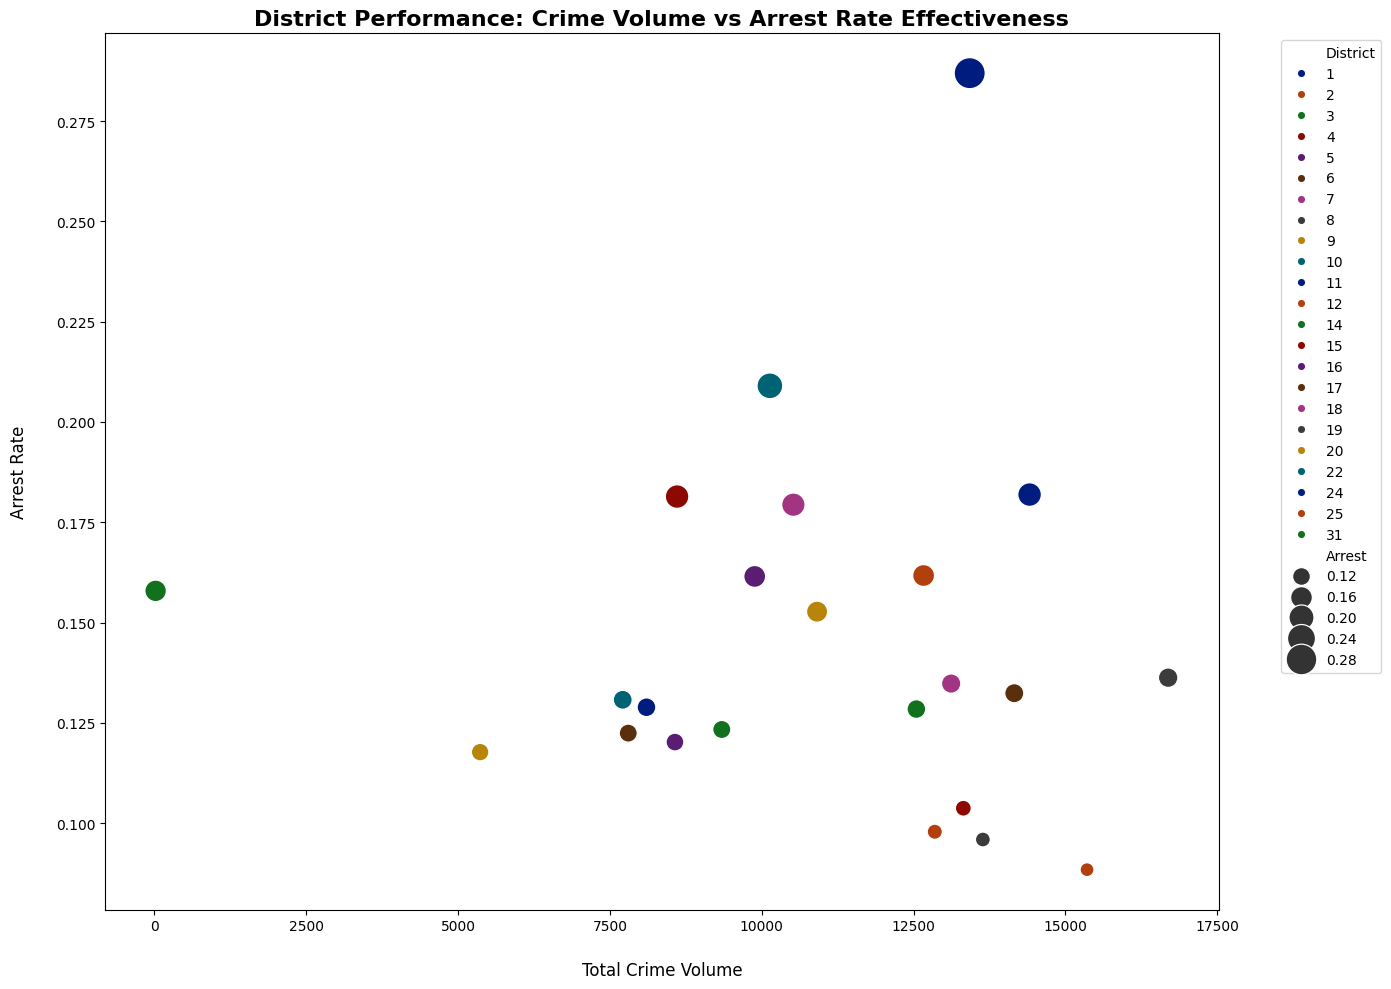

    District    Arrest  Primary Type
0          1  0.181900         14409
1          2  0.097836         12848
2          3  0.128418         12545
3          4  0.103694         13318
4          5  0.161489          9883
5          6  0.132373         14157
6          7  0.179373         10520
7          8  0.136241         16691
8          9  0.152704         10910
9         10  0.209020         10133
10        11  0.286970         13423
11        12  0.088375         15355
12        14  0.123327          9341
13        15  0.181406          8605
14        16  0.120187          8570
15        17  0.122420          7801
16        18  0.134777         13118
17        19  0.095894         13640
18        20  0.117680          5362
19        22  0.130739          7710
20        24  0.128873          8101
21        25  0.161718         12664
22        31  0.157895            19


In [26]:
plt.figure(figsize=(14, 10))
district_stats = crime.groupby('District').agg({'Arrest': 'mean', 'Primary Type': 'count'}).reset_index()
sns.scatterplot(data=district_stats, x='Primary Type', y='Arrest', hue='District', size='Arrest', sizes=(100, 500), palette='dark')
plt.title('District Performance: Crime Volume vs Arrest Rate Effectiveness', fontsize=16, fontweight='bold')
plt.xlabel('Total Crime Volume', fontsize=12, labelpad=20)
plt.ylabel('Arrest Rate', fontsize=12, labelpad=20)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

print(district_stats)

<div style="background: #f5f9ff; color: #2c3e50; padding: 20px; border-radius: 10px; margin-top: 50px; border: 1px solid #e1ebff; position: relative;">
<div style="position: absolute; top: -10px; left: 20px; background: #5c6bc0; color: white; padding: 10px 18px; border-radius: 20px; font-size: 0.8em; font-weight: bold;">
ANALYSIS INSIGHT
</div>
<p style="margin: 15px 0 0 0; font-size: 1.1em; line-height: 1.6;">
Districts in the bottom-right have high crime but low arrests. District 12 is a major concern with 15,355 incidents and an 8% arrest rate. Districts 18 and 2 also have high crime and low arrests.</p>
<p style="margin: 15px 0 0 0; font-size: 1.1em; line-height: 1.6;">
The Police Commissioner should review District 12’s procedures, add more detective and forensic support, and train officers on evidence collection. Focus more on districts with high crime but low arrest rates.
</p>
</div>

<hr style="border: none; height: 2px; background: linear-gradient(to right, transparent, #5c6bc0, transparent); margin: 25px auto; width: 70%;">
<div style="background: #f8f9fa; color: #2c3e50; padding: 25px; border-radius: 10px; margin: 25px 0; border-left: 5px solid #5c6bc0; border-right: 5px solid #5c6bc0; box-shadow: 0 4px 12px rgba(0,0,0,0.06);">
<h2 style="color: #1a237e; margin: 0 0 10px 0; font-weight: 700; font-size: 1.8em; text-align: center;">
Question 13
</h2>
<h3 style="color: #2c3e50; margin: 0; font-weight: 600; font-size: 1.1em; text-align: center; line-height: 1.5;">
Which community areas report the most crimes for the top three FBI codes?</h3>
</div>

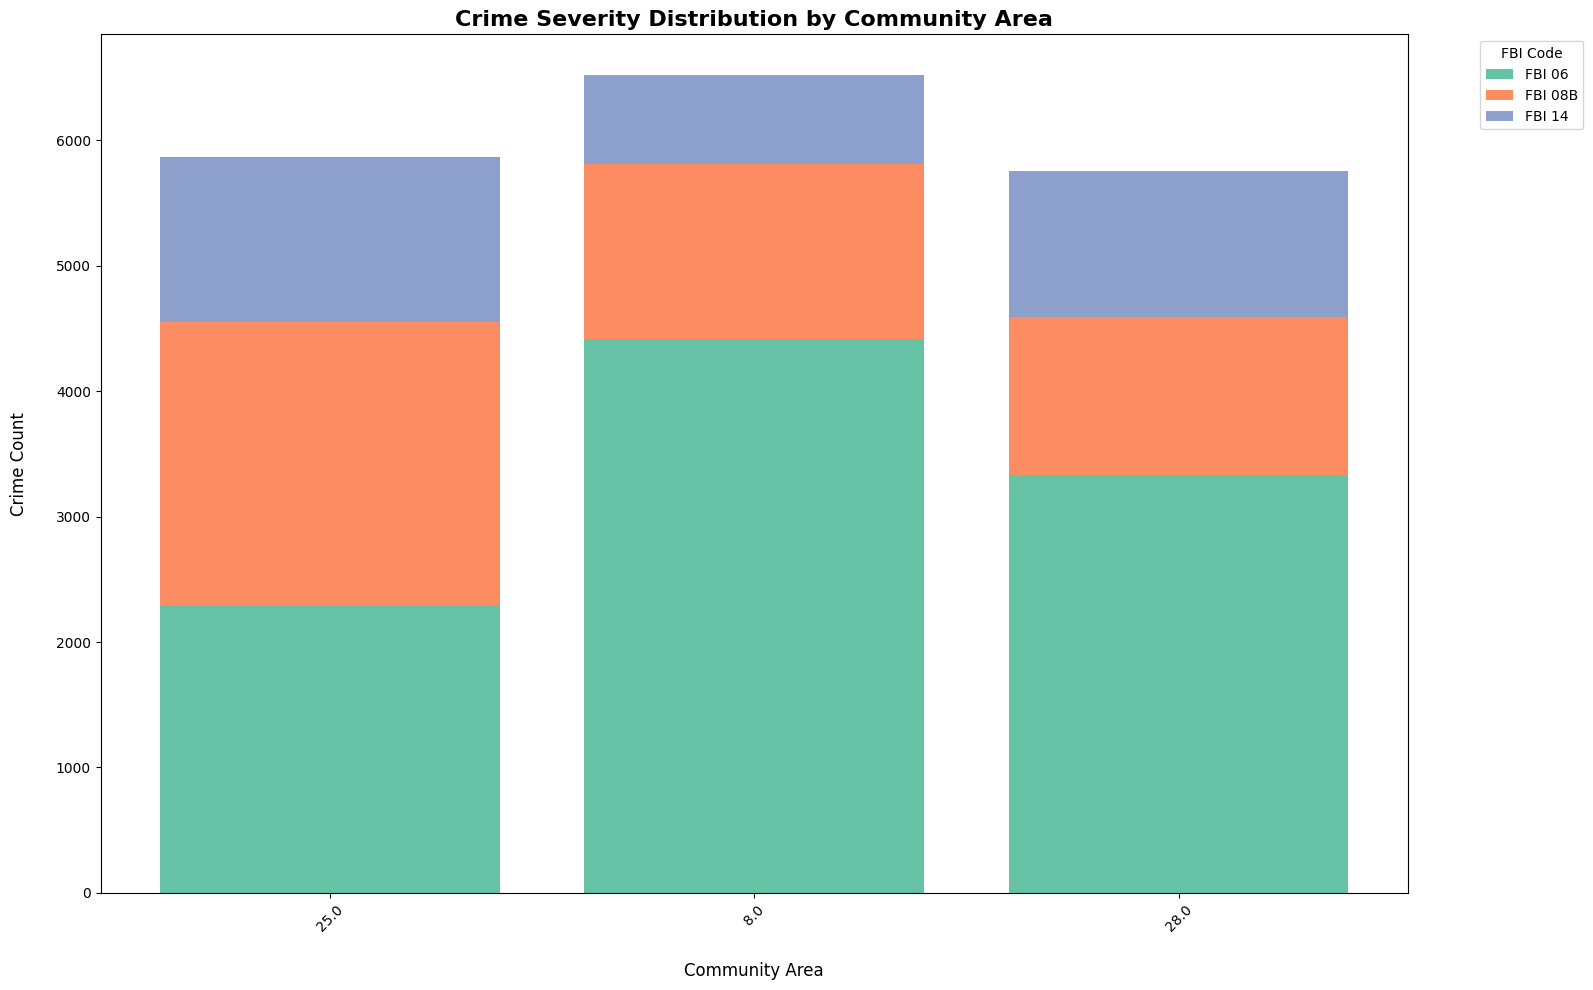

In [27]:
severity_data = crime.groupby(['Community Area', 'FBI Code']).size().unstack(fill_value=0)
top_areas = severity_data.sum(axis=1).nlargest(3).index
filtered_severity = severity_data.loc[top_areas]
x = np.arange(len(filtered_severity.index))
top_fbi_codes = filtered_severity.sum().nlargest(3).index

plt.figure(figsize=(16, 10))
plt.bar(x, filtered_severity[top_fbi_codes[0]], color='#66c2a5', label=f'FBI {top_fbi_codes[0]}')
plt.bar(x, filtered_severity[top_fbi_codes[1]], bottom=filtered_severity[top_fbi_codes[0]], color='#fc8d62', label=f'FBI {top_fbi_codes[1]}')
plt.bar(x, filtered_severity[top_fbi_codes[2]], bottom=filtered_severity[top_fbi_codes[0]] + filtered_severity[top_fbi_codes[1]], color='#8da0cb', label=f'FBI {top_fbi_codes[2]}')

plt.title('Crime Severity Distribution by Community Area', fontsize=16, fontweight='bold')
plt.xlabel('Community Area', fontsize=12, labelpad=20)
plt.ylabel('Crime Count', fontsize=12, labelpad=20)
plt.xticks(x, filtered_severity.index, rotation=45)
plt.legend(title='FBI Code', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

<div style="background: #f5f9ff; color: #2c3e50; padding: 20px; border-radius: 10px; margin-top: 50px; border: 1px solid #e1ebff; position: relative;">
<div style="position: absolute; top: -10px; left: 20px; background: #5c6bc0; color: white; padding: 10px 18px; border-radius: 20px; font-size: 0.8em; font-weight: bold;">
ANALYSIS INSIGHT
</div>
<p style="margin: 15px 0 0 0; font-size: 1.1em; line-height: 1.6;">
Lower-level crimes (FBI 06) appear in almost every community, but serious crimes (FBI 14) vary a lot. Areas 25, 8, and 28 have the most serious crimes. </p>
<p style="margin: 15px 0 0 0; font-size: 1.1em; line-height: 1.6;">
This means some neighborhoods face higher violence than others. City officials should send more resources to areas with high serious crimes, using violent crime units and social services. Areas with mostly minor crimes can use community policing and prevention programs.
</p>
</div>

<hr style="border: none; height: 2px; background: linear-gradient(to right, transparent, #5c6bc0, transparent); margin: 25px auto; width: 70%;">
<div style="background: #f8f9fa; color: #2c3e50; padding: 25px; border-radius: 10px; margin: 25px 0; border-left: 5px solid #5c6bc0; border-right: 5px solid #5c6bc0; box-shadow: 0 4px 12px rgba(0,0,0,0.06);">
<h2 style="color: #1a237e; margin: 0 0 10px 0; font-weight: 700; font-size: 1.8em; text-align: center;">
Question 14
</h2>
<h3 style="color: #2c3e50; margin: 0; font-weight: 600; font-size: 1.1em; text-align: center; line-height: 1.5;">
How do arrests change in each district during morning, evening, and night shifts, and what can this tell us about where officers might need more training?</h3>
</div>

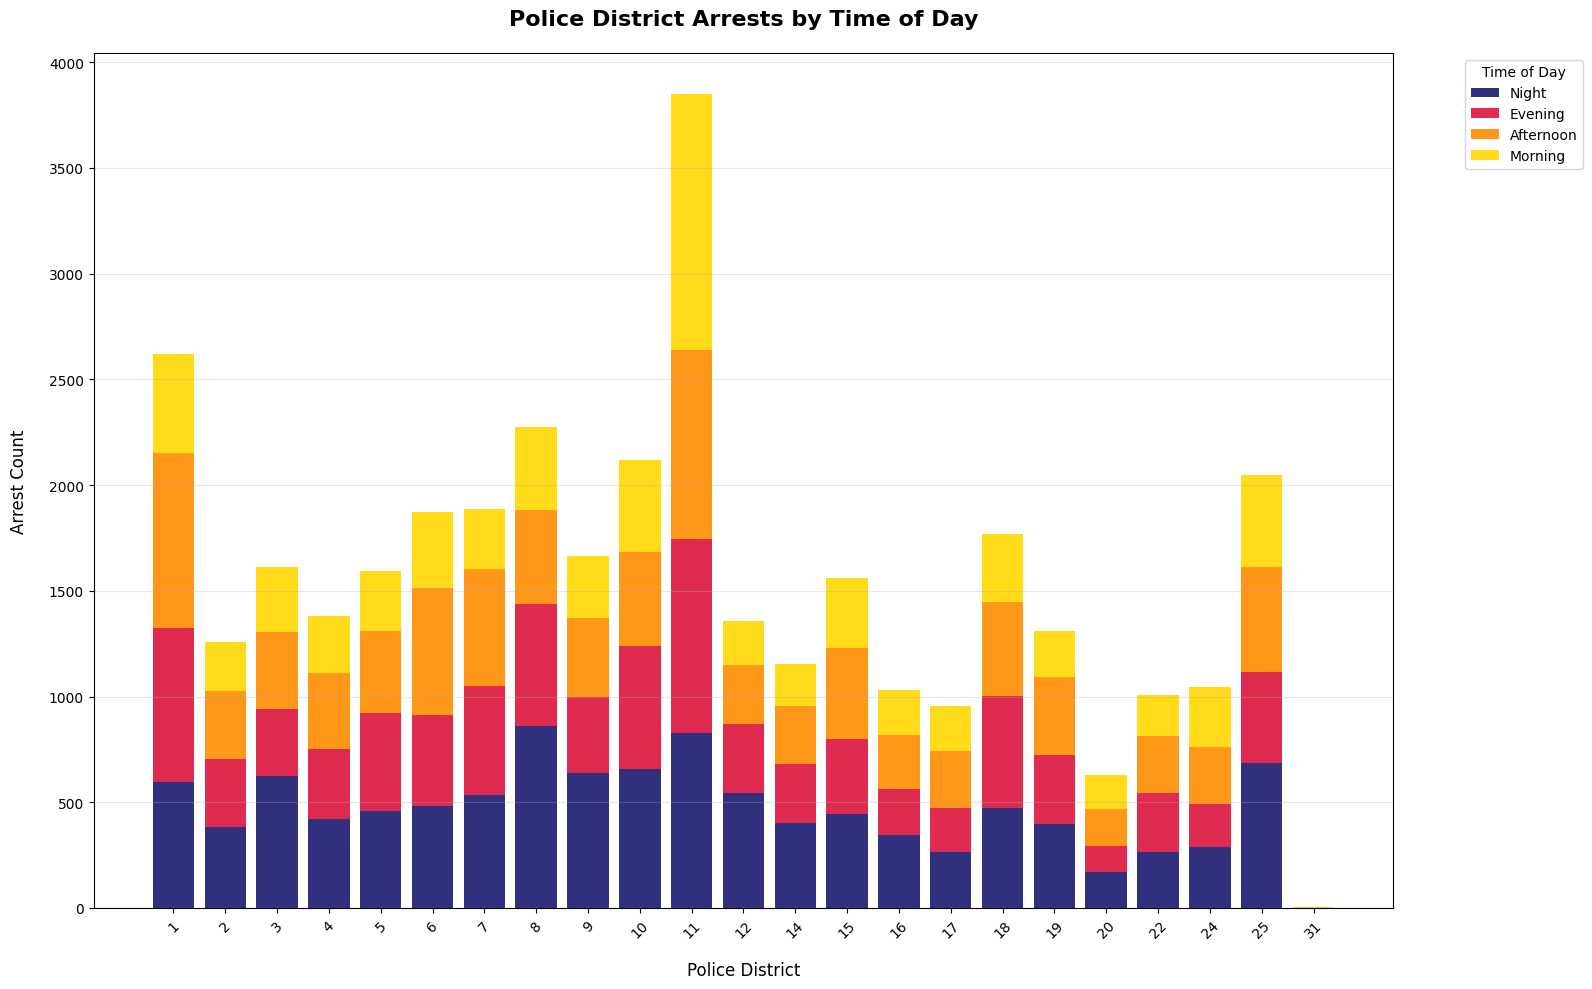

Arrests by District and Time of Day:
TimeOfDay  Morning  Afternoon  Evening  Night
District                                     
1              468        830      726    597
2              232        319      321    385
3              306        364      318    623
4              271        356      333    421
5              287        386      462    461
6              362        601      428    483
7              286        552      515    534
8              394        440      580    860
9              296        374      356    640
10             434        447      581    656
11            1211        896      916    829
12             210        278      323    546
14             195        277      280    400
15             333        431      351    446
16             212        255      216    347
17             213        271      208    263
18             319        448      526    475
19             216        368      328    396
20             164        176      122    1

In [28]:
time_data = crime.groupby(['District', 'TimeOfDay'])['Arrest'].sum().unstack(fill_value=0)

time_order = ['Morning', 'Afternoon', 'Evening', 'Night']
time_data = time_data[time_order]

plt.figure(figsize=(16, 10))
x = range(len(time_data.index))

plt.bar(x, time_data['Night'], color='#191970', label='Night', alpha=0.9)
plt.bar(x, time_data['Evening'], bottom=time_data['Night'], color='#DC143C', label='Evening', alpha=0.9)
plt.bar(x, time_data['Afternoon'], bottom=time_data['Night'] + time_data['Evening'], color='#FF8C00', label='Afternoon', alpha=0.9)
plt.bar(x, time_data['Morning'], bottom=time_data['Night'] + time_data['Evening'] + time_data['Afternoon'], color='#FFD700', label='Morning', alpha=0.9)

plt.title('Police District Arrests by Time of Day', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Police District', fontsize=12, labelpad=15)
plt.ylabel('Arrest Count', fontsize=12, labelpad=15)
plt.xticks(x, time_data.index, rotation=45)
plt.legend(title='Time of Day', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

print("Arrests by District and Time of Day:")
print(time_data)

<div style="background: #f5f9ff; color: #2c3e50; padding: 20px; border-radius: 10px; margin-top: 50px; border: 1px solid #e1ebff; position: relative;">
<div style="position: absolute; top: -10px; left: 20px; background: #5c6bc0; color: white; padding: 10px 18px; border-radius: 20px; font-size: 0.8em; font-weight: bold;">
ANALYSIS INSIGHT
</div>
<p style="margin: 15px 0 0 0; font-size: 1.1em; line-height: 1.6;">
Most districts have the most arrests in the Afternoon and Evening. District 8 has unusually high Night shift arrests (860). District 20 has very low arrests, especially in the Evening (122). Morning shift arrests are low across nearly all districts.</p>
<p style="margin: 15px 0 0 0; font-size: 1.1em; line-height: 1.6;">
This tells us that officers in low-performing districts need more training in proactive policing and investigation, and/or guidance to improve overall effectiveness.
.</p>

</div>

<hr style="border: none; height: 2px; background: linear-gradient(to right, transparent, #5c6bc0, transparent); margin: 25px auto; width: 70%;">
<div style="background: #f8f9fa; color: #2c3e50; padding: 25px; border-radius: 10px; margin: 25px 0; border-left: 5px solid #5c6bc0; border-right: 5px solid #5c6bc0; box-shadow: 0 4px 12px rgba(0,0,0,0.06);">
<h2 style="color: #1a237e; margin: 0 0 10px 0; font-weight: 700; font-size: 1.8em; text-align: center;">
Question 15
</h2>
<h3 style="color: #2c3e50; margin: 0; font-weight: 600; font-size: 1.1em; text-align: center; line-height: 1.5;">
How often and where do public peace violations occur weekly?</h3>
</div>

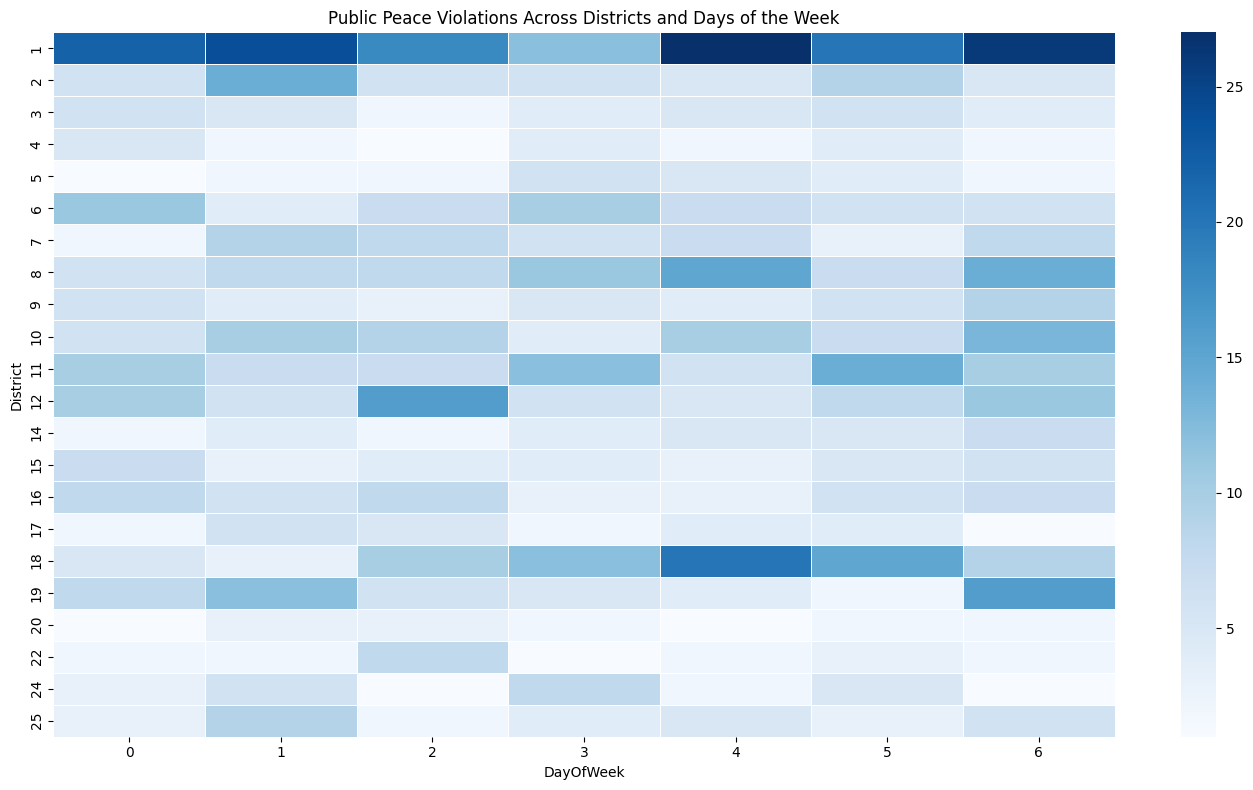

DayOfWeek   0   1   2   3   4   5   6
District                             
1          22  24  18  12  27  20  26
2           6  14   6   6   5   9   5
3           6   5   2   4   5   6   4
4           5   2   1   4   2   4   2
5           1   2   2   6   5   4   2
6          11   4   7  10   7   6   6
7           2   9   8   6   7   3   8
8           6   8   8  11  15   7  14
9           6   4   3   5   4   6   9
10          6  10   9   4  10   7  13
11         10   7   7  12   6  14  10
12         10   6  16   6   5   8  11
14          2   4   2   4   5   5   7
15          7   3   4   4   3   5   6
16          8   6   8   3   3   6   7
17          2   6   5   2   4   4   1
18          5   3  10  12  20  15   9
19          8  12   6   5   4   2  16
20          1   3   3   2   1   2   2
22          2   2   8   1   2   3   2
24          3   6   1   8   2   5   1
25          3   9   2   4   5   3   6


In [29]:
plt.figure(figsize=(14, 8))
peace_violations = crime[crime['Primary Type'] == 'PUBLIC PEACE VIOLATION']
district = peace_violations.groupby(['District', 'DayOfWeek']).size().unstack().fillna(0)
sns.heatmap(district, cmap='Blues', linewidths=0.5)
plt.title('Public Peace Violations Across Districts and Days of the Week')
plt.tight_layout()
plt.show()

print(district)

<div style="background: #f5f9ff; color: #2c3e50; padding: 20px; border-radius: 10px; margin-top: 50px; border: 1px solid #e1ebff; position: relative;">
<div style="position: absolute; top: -10px; left: 20px; background: #5c6bc0; color: white; padding: 10px 18px; border-radius: 20px; font-size: 0.8em; font-weight: bold;">
ANALYSIS INSIGHT
</div>
<p style="margin: 15px 0 0 0; font-size: 1.1em; line-height: 1.6;">
Public peace violations happen every day but increase as the weekend approaches. District 1 has the most incidents all week, with 27 on Friday and 26 on Sunday.</p>
<p style="margin: 15px 0 0 0; font-size: 1.1em; line-height: 1.6;">
Police should focus patrols in District 1 all week and increase presence on other districts to better manage these violations.
</p>
</div>

<hr style="border: none; height: 2px; background: linear-gradient(to right, transparent, #5c6bc0, transparent); margin: 25px auto; width: 70%;">
<div style="background: #f8f9fa; color: #2c3e50; padding: 25px; border-radius: 10px; margin: 25px 0; border-left: 5px solid #5c6bc0; border-right: 5px solid #5c6bc0; box-shadow: 0 4px 12px rgba(0,0,0,0.06);">
<h2 style="color: #1a237e; margin: 0 0 10px 0; font-weight: 700; font-size: 1.8em; text-align: center;">
Question 16
</h2>
<h3 style="color: #2c3e50; margin: 0; font-weight: 600; font-size: 1.1em; text-align: center; line-height: 1.5;">
How do robbery incidents change month by month for quick action?</h3>
</div>

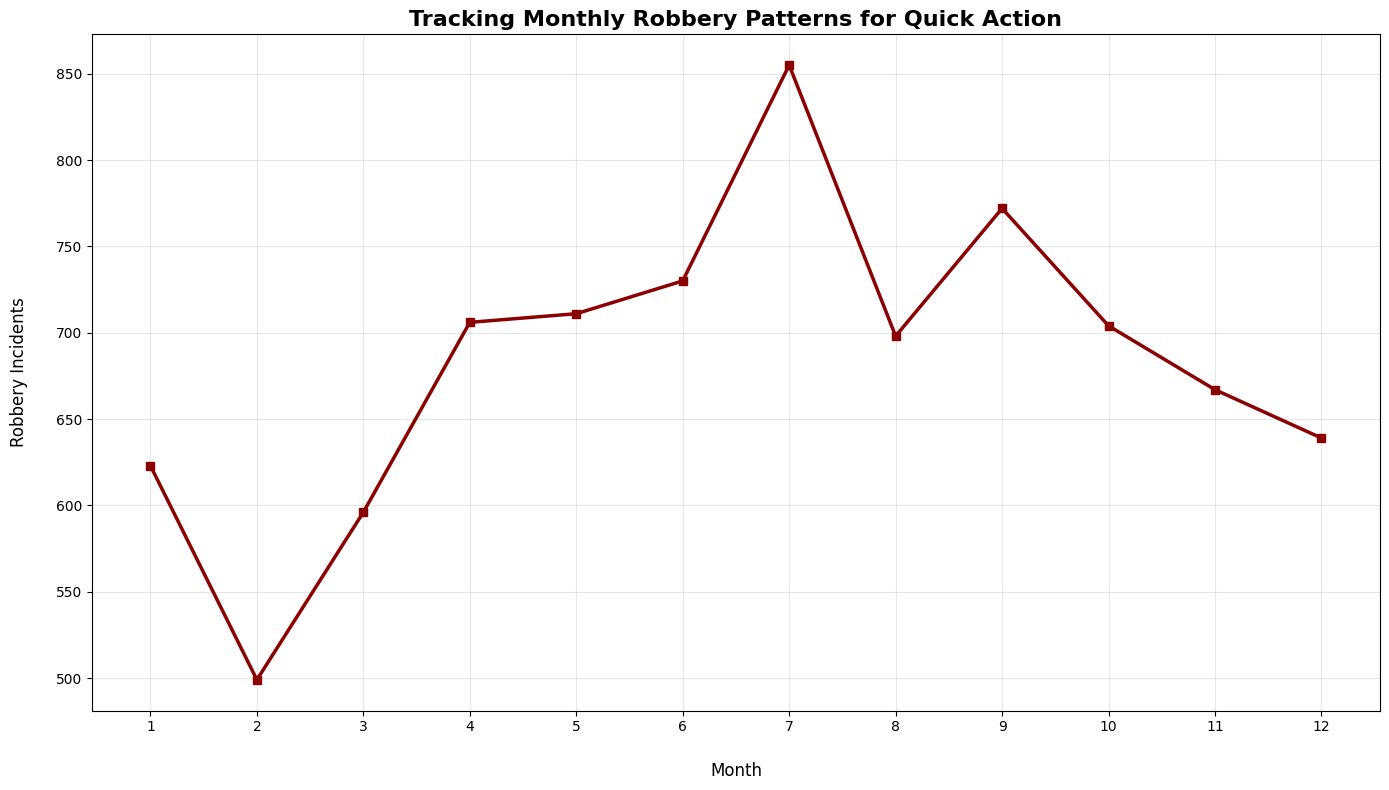

Month
1     623
2     499
3     596
4     706
5     711
6     730
7     855
8     698
9     772
10    704
11    667
12    639
dtype: int64


In [30]:
plt.figure(figsize=(14, 8))
robbery_data = crime[crime['Primary Type'] == 'ROBBERY']
monthly_robbery = robbery_data.groupby('Month').size()

plt.plot(monthly_robbery.index, monthly_robbery.values, marker='s', color='darkred', linewidth=2.5)
plt.title('Tracking Monthly Robbery Patterns for Quick Action', fontsize=16, fontweight='bold')
plt.xlabel('Month', fontsize=12, labelpad=20)
plt.ylabel('Robbery Incidents', fontsize=12, labelpad=20)
plt.xticks(range(1, 13))
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print(monthly_robbery)

<div style="background: #f5f9ff; color: #2c3e50; padding: 20px; border-radius: 10px; margin-top: 50px; border: 1px solid #e1ebff; position: relative;">
<div style="position: absolute; top: -10px; left: 20px; background: #5c6bc0; color: white; padding: 10px 18px; border-radius: 20px; font-size: 0.8em; font-weight: bold;">
ANALYSIS INSIGHT
</div>
<p style="margin: 15px 0 0 0; font-size: 1.1em; line-height: 1.6;">
Robberies are high in the first quarter of the year (January 623), lower in February, then increase in the second and third quarters, reaching 855 in July. They go down in the fourth quarter.
</p>
<p style="margin: 15px 0 0 0; font-size: 1.1em; line-height: 1.6;">
Police can act early by increasing patrols in the second and third quarters, running safety campaigns before summer, and preparing tactical units for June to August.</p>
</div>

<hr style="border: none; height: 2px; background: linear-gradient(to right, transparent, #5c6bc0, transparent); margin: 25px auto; width: 70%;">
<div style="background: #f8f9fa; color: #2c3e50; padding: 25px; border-radius: 10px; margin: 25px 0; border-left: 5px solid #5c6bc0; border-right: 5px solid #5c6bc0; box-shadow: 0 4px 12px rgba(0,0,0,0.06);">
<h2 style="color: #1a237e; margin: 0 0 10px 0; font-weight: 700; font-size: 1.8em; text-align: center;">
Question 17
</h2>
<h3 style="color: #2c3e50; margin: 0; font-weight: 600; font-size: 1.1em; text-align: center; line-height: 1.5;">
How do domestic violence arrests compare to cases with no arrest?
</h3>
</div>

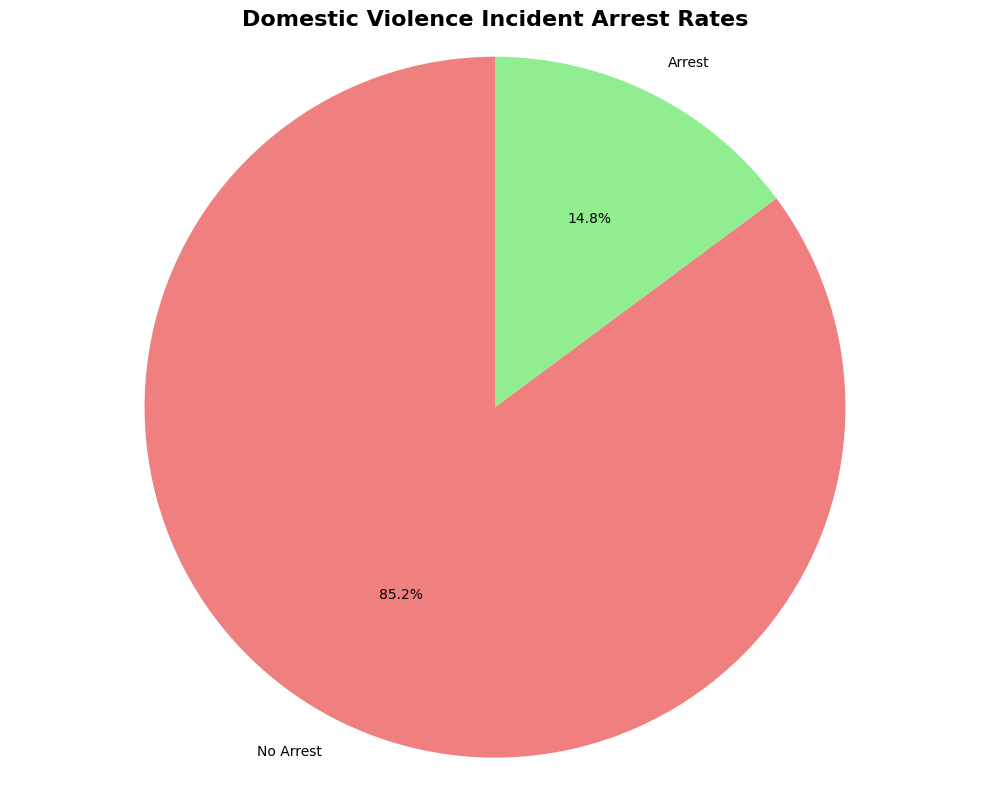

In [31]:
plt.figure(figsize=(10, 8))
domestic_arrests = crime[crime['Domestic'] == True]['Arrest'].value_counts()
colors = ['lightcoral', 'lightgreen']
labels = ['No Arrest', 'Arrest']

plt.pie(domestic_arrests.values, labels=labels, autopct='%1.1f%%', colors=colors, startangle=90)
plt.title('Domestic Violence Incident Arrest Rates', fontsize=16, fontweight='bold')
plt.axis('equal')
plt.tight_layout()
plt.show()

<div style="background: #f5f9ff; color: #2c3e50; padding: 20px; border-radius: 10px; margin-top: 50px; border: 1px solid #e1ebff; position: relative;">
<div style="position: absolute; top: -10px; left: 20px; background: #5c6bc0; color: white; padding: 10px 18px; border-radius: 20px; font-size: 0.8em; font-weight: bold;">
ANALYSIS INSIGHT
</div>
<p style="margin: 15px 0 0 0; font-size: 1.1em; line-height: 1.6;">
Domestic violence arrests are very low. Only 14.8% of incidents lead to an arrest, while 85.2% do not. This means fewer than 15 arrests happen for every 100 calls. Low arrest rates may be due to victims being afraid, lack of evidence, or the complexity of cases.
</p>
<p style="margin: 15px 0 0 0; font-size: 1.1em; line-height: 1.6;">
The police need training on evidence, victim support, and social services to improve arrests.
</p>
</div>

<hr style="border: none; height: 2px; background: linear-gradient(to right, transparent, #5c6bc0, transparent); margin: 25px auto; width: 70%;">
<div style="background: #f8f9fa; color: #2c3e50; padding: 25px; border-radius: 10px; margin: 25px 0; border-left: 5px solid #5c6bc0; border-right: 5px solid #5c6bc0; box-shadow: 0 4px 12px rgba(0,0,0,0.06);">
<h2 style="color: #1a237e; margin: 0 0 10px 0; font-weight: 700; font-size: 1.8em; text-align: center;">
Question 18
</h2>
<h3 style="color: #2c3e50; margin: 0; font-weight: 600; font-size: 1.1em; text-align: center; line-height: 1.5;">
Which IUCR crime codes occur most frequently, and how can early action be planned to prevent escalation?
</h3>
</div>

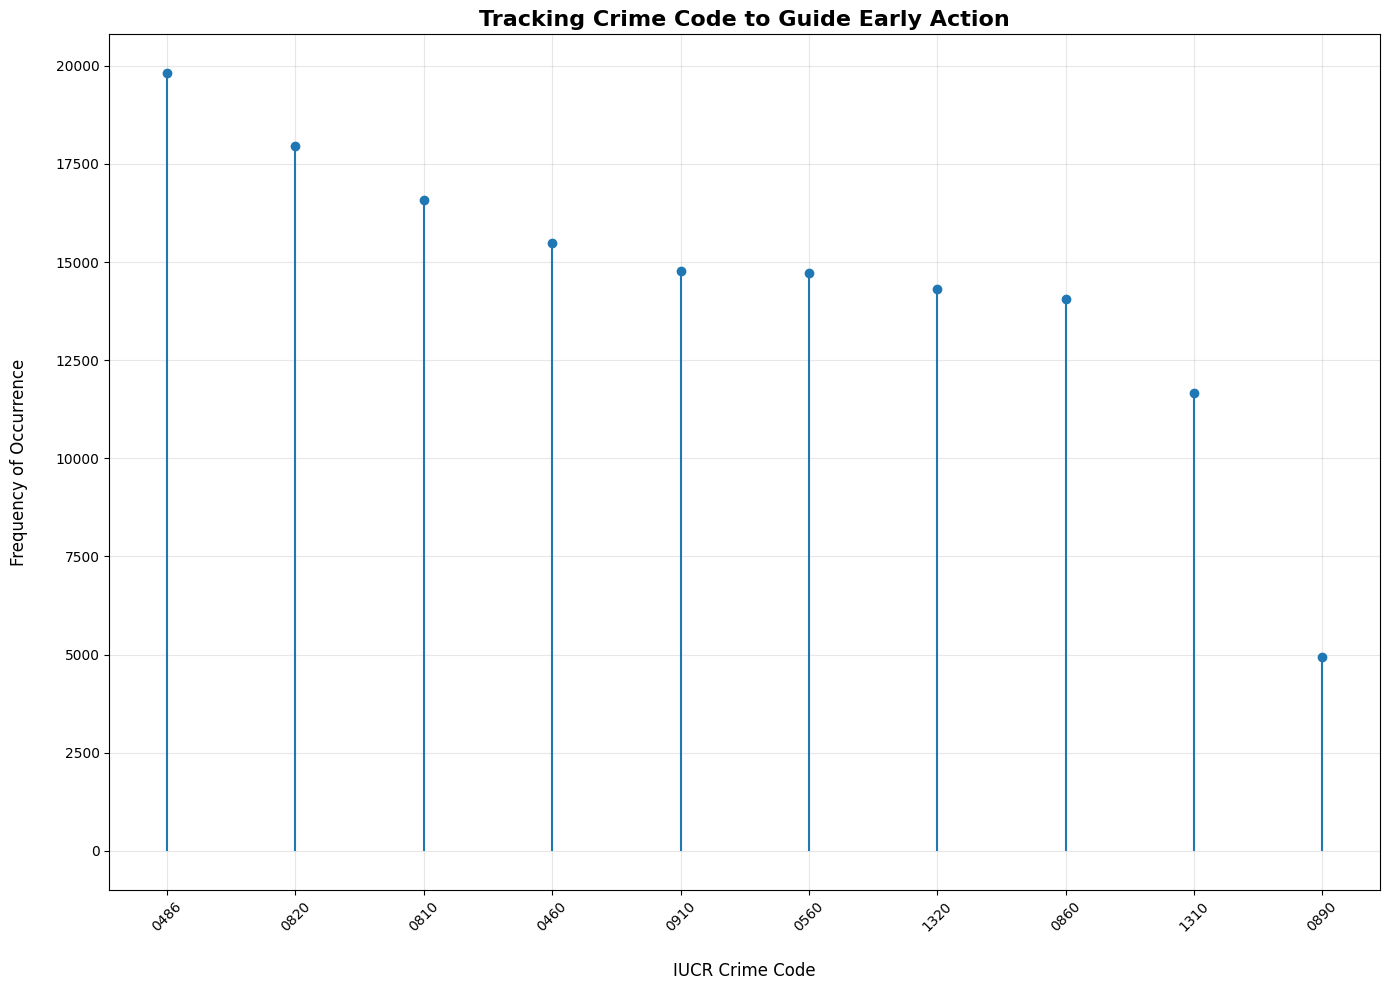

IUCR
0486    19810
0820    17963
0810    16572
0460    15486
0910    14780
0560    14708
1320    14315
0860    14053
1310    11652
0890     4941
dtype: int64


In [32]:
plt.figure(figsize=(14, 10))
crime_sequences = crime.groupby(['IUCR', 'FBI Code']).size().unstack(fill_value=0)
progression_patterns = crime_sequences.sum(axis=1).nlargest(10)
plt.stem(progression_patterns.index, progression_patterns.values, basefmt=" ")
plt.title('Tracking Crime Code to Guide Early Action', fontsize=16, fontweight='bold')
plt.xlabel('IUCR Crime Code', fontsize=12, labelpad=20)
plt.ylabel('Frequency of Occurrence', fontsize=12, labelpad=20)
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print(progression_patterns)

<div style="background: #f5f9ff; color: #2c3e50; padding: 20px; border-radius: 10px; margin-top: 50px; border: 1px solid #e1ebff; position: relative;">
<div style="position: absolute; top: -10px; left: 20px; background: #5c6bc0; color: white; padding: 10px 18px; border-radius: 20px; font-size: 0.8em; font-weight: bold;">
ANALYSIS INSIGHT
</div>
<p style="margin: 15px 0 0 0; font-size: 1.1em; line-height: 1.6;">
The single most common crime, IUCR 0486, occurred 19,810 times, which is thousands more than the third-most common crime. When you combine the top two codes, 0486 (Battery, 19,818 crimes) and 0820 (Theft, 17,963 crimes). They account for nearly 38,000 incidents alone.</p>
<p style="margin: 15px 0 0 0; font-size: 1.1em; line-height: 1.6;">
We should focus on these top crimes by running safety campaigns. This can prevent the most common crimes and keep the community safer.</p>
</div>

<hr style="border: none; height: 2px; background: linear-gradient(to right, transparent, #5c6bc0, transparent); margin: 25px auto; width: 70%;">
<div style="background: #f8f9fa; color: #2c3e50; padding: 25px; border-radius: 10px; margin: 25px 0; border-left: 5px solid #5c6bc0; border-right: 5px solid #5c6bc0; box-shadow: 0 4px 12px rgba(0,0,0,0.06);">
<h2 style="color: #1a237e; margin: 0 0 10px 0; font-weight: 700; font-size: 1.8em; text-align: center;">
Question 19
</h2>
<h3 style="color: #2c3e50; margin: 0; font-weight: 600; font-size: 1.1em; text-align: center; line-height: 1.5;">
Which districts take the longest on average to finish investigations?
</h3>
</div>

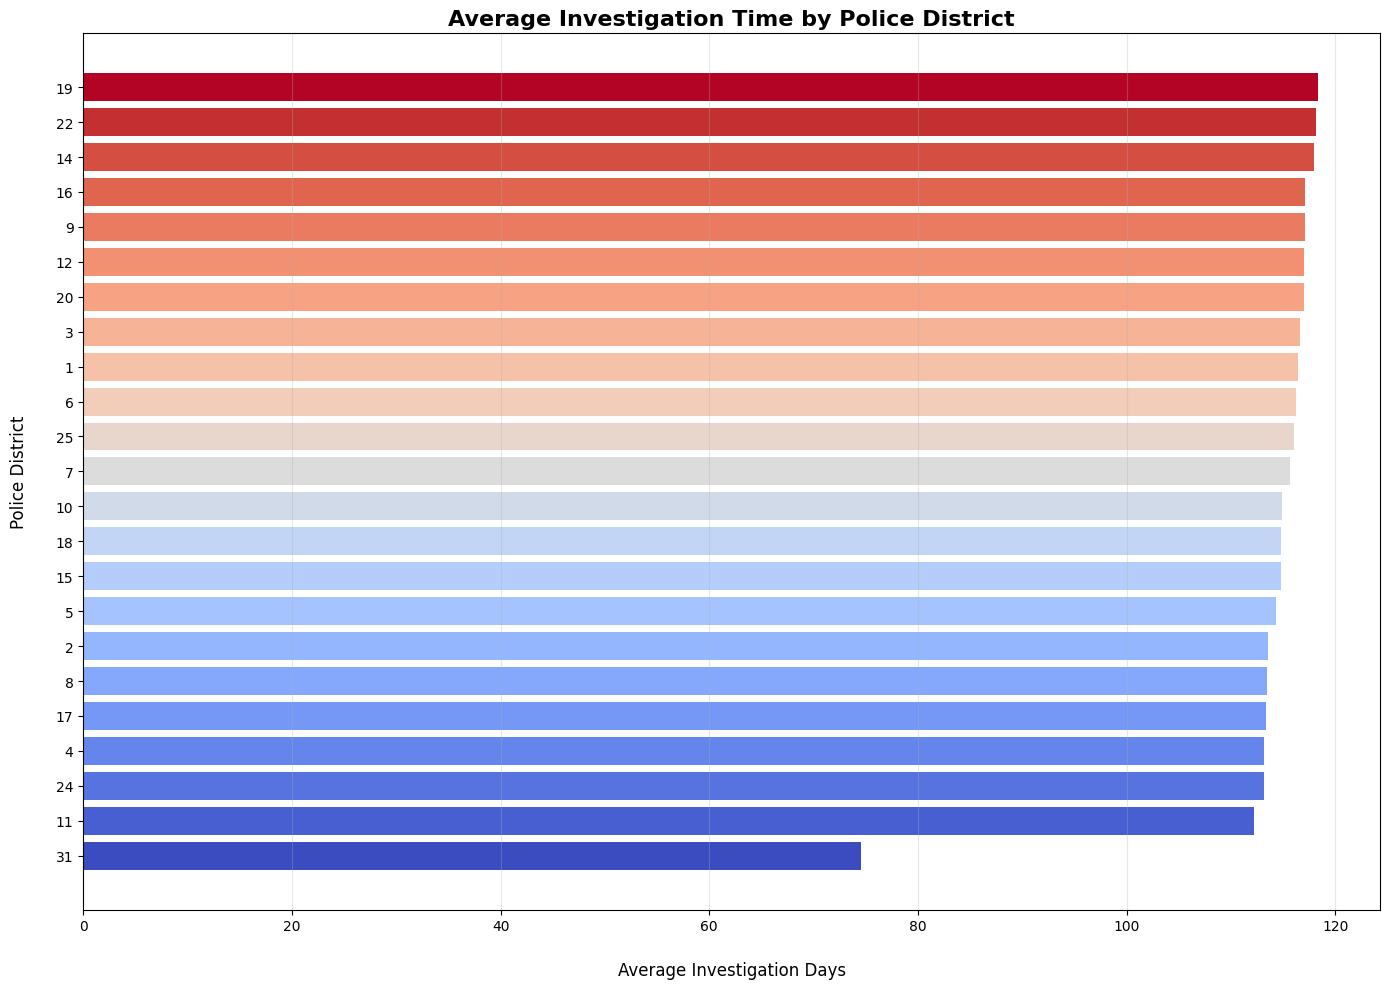

District
31     74.53
11    112.23
24    113.14
4     113.18
17    113.34
8     113.47
2     113.54
5     114.30
15    114.84
18    114.84
10    114.92
7     115.69
25    116.01
6     116.23
1     116.45
3     116.62
20    116.99
12    117.02
9     117.10
16    117.12
14    117.97
22    118.15
19    118.38
Name: Investigation Days, dtype: float64


In [33]:
crime['Investigation Days'] = (crime['Updated On'] - crime['Date']).dt.days

plt.figure(figsize=(14, 10))
reporting_efficiency = crime.groupby('District')['Investigation Days'].mean().sort_values(ascending=True)
plt.barh(reporting_efficiency.index.astype(str), reporting_efficiency.values, color=plt.cm.coolwarm(np.linspace(0, 1, len(reporting_efficiency))))
plt.title('Average Investigation Time by Police District', fontsize=16, fontweight='bold')
plt.xlabel('Average Investigation Days', fontsize=12, labelpad=20)
plt.ylabel('Police District', fontsize=12, labelpad=20)
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

print(reporting_efficiency.round(2))

<div style="background: #f5f9ff; color: #2c3e50; padding: 20px; border-radius: 10px; margin-top: 50px; border: 1px solid #e1ebff; position: relative;">
<div style="position: absolute; top: -10px; left: 20px; background: #5c6bc0; color: white; padding: 10px 18px; border-radius: 20px; font-size: 0.8em; font-weight: bold;">
ANALYSIS INSIGHT
</div>
<p style="margin: 15px 0 0 0; font-size: 1.1em; line-height: 1.6;">
Average investigation times show big differences between districts. Most take 113–118 days, but District 19 is the slowest at 118.38 days, over four months to finish a case. Districts 22 and 14 are also slow.</p>
<p style="margin: 15px 0 0 0; font-size: 1.1em; line-height: 1.6;">
District 31 is much faster, averaging 74.53 days.</p>
<p style="margin: 15px 0 0 0; font-size: 1.1em; line-height: 1.6;">
Some districts may need more staff, better training, or improved procedures.</p>
</div>

<hr style="border: none; height: 2px; background: linear-gradient(to right, transparent, #5c6bc0, transparent); margin: 25px auto; width: 70%;">
<div style="background: #f8f9fa; color: #2c3e50; padding: 25px; border-radius: 10px; margin: 25px 0; border-left: 5px solid #5c6bc0; border-right: 5px solid #5c6bc0; box-shadow: 0 4px 12px rgba(0,0,0,0.06);">
<h2 style="color: #1a237e; margin: 0 0 10px 0; font-weight: 700; font-size: 1.8em; text-align: center;">
Question 20
</h2>
<h3 style="color: #2c3e50; margin: 0; font-weight: 600; font-size: 1.1em; text-align: center; line-height: 1.5;">
Where do assault, robberry, and sex offense incidents happen most for victim support?
</h3>
</div>

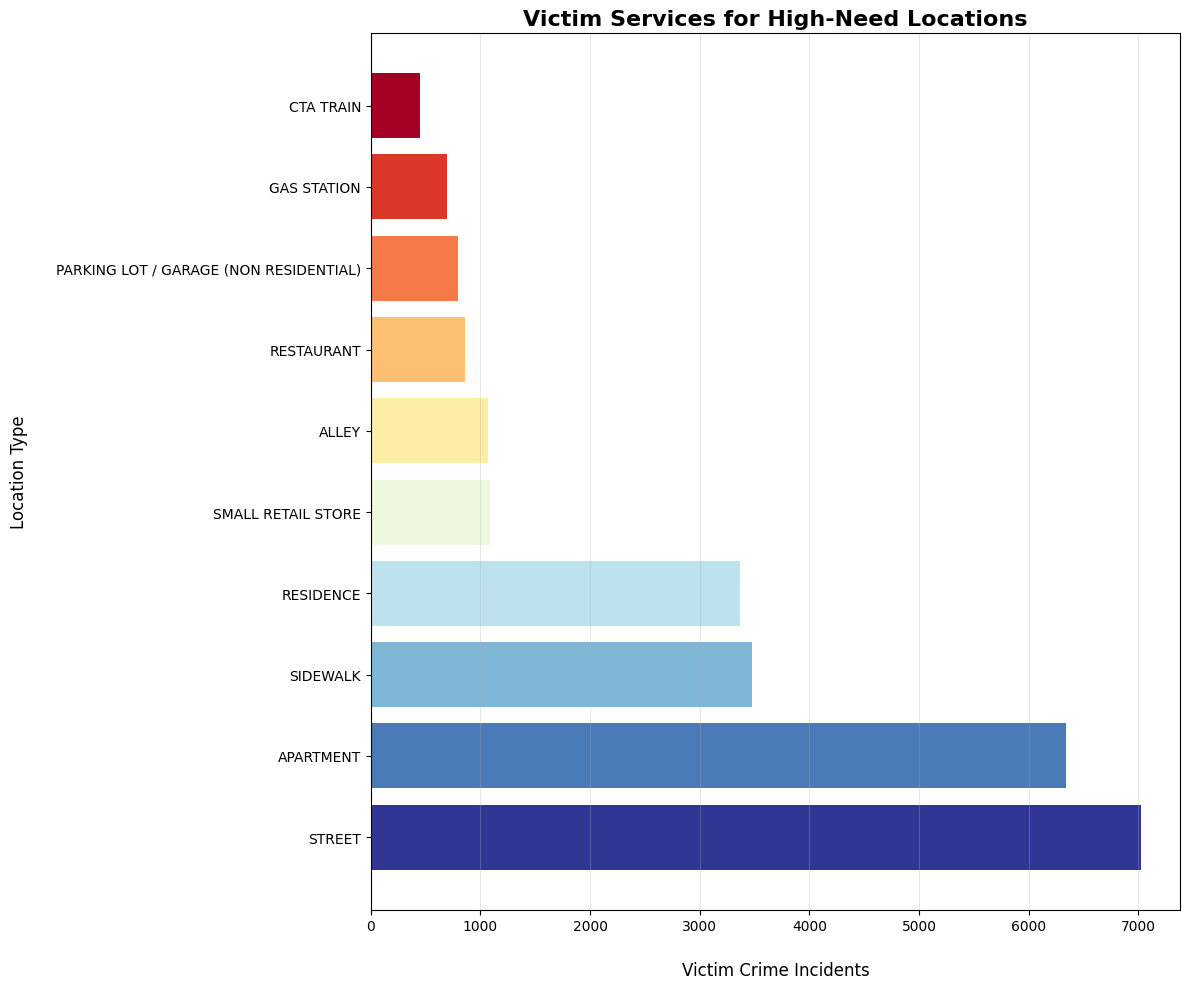

Location Description
STREET                                    7029
APARTMENT                                 6342
SIDEWALK                                  3478
RESIDENCE                                 3371
SMALL RETAIL STORE                        1091
ALLEY                                     1073
RESTAURANT                                 863
PARKING LOT / GARAGE (NON RESIDENTIAL)     799
GAS STATION                                691
CTA TRAIN                                  447
Name: count, dtype: int64


In [34]:
plt.figure(figsize=(12, 10))
victim_crimes = crime[crime['Primary Type'].isin(['ASSAULT', 'ROBBERY', 'SEX OFFENSE'])]
victim_locations = victim_crimes['Location Description'].value_counts().head(10)
plt.barh(range(len(victim_locations)), victim_locations.values, color=plt.cm.RdYlBu_r(np.linspace(0, 1, len(victim_locations))))
plt.title('Victim Services for High-Need Locations', fontsize=16, fontweight='bold')
plt.xlabel('Victim Crime Incidents', fontsize=12, labelpad=20)
plt.ylabel('Location Type', fontsize=12, labelpad=20)
plt.yticks(range(len(victim_locations)), victim_locations.index)
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

print(victim_locations)

<div style="background: #f5f9ff; color: #2c3e50; padding: 20px; border-radius: 10px; margin-top: 50px; border: 1px solid #e1ebff; position: relative;">
<div style="position: absolute; top: -10px; left: 20px; background: #5c6bc0; color: white; padding: 10px 18px; border-radius: 20px; font-size: 0.8em; font-weight: bold;">
ANALYSIS INSIGHT
</div>
<p style="margin: 15px 0 0 0; font-size: 1.1em; line-height: 1.6;">
Victim support for assaults, robberies, and sex crimes is needed most. Streets are the most dangerous, with 7,029 incidents, followed by apartments (6,342) and sidewalks (3,478). This means victims face the most risk in everyday places near their homes.
</p>
<p style="margin: 15px 0 0 0; font-size: 1.1em; line-height: 1.6;">
Support services should be focused in these areas. Hotline info, safe spaces, and outreach programs should be placed in apartment lobbies, and in small stores to reach victims where they need help most.
</p>
</div>

<hr style="border: none; height: 2px; background: linear-gradient(to right, transparent, #5c6bc0, transparent); margin: 25px auto; width: 70%;">
<div style="background: #f8f9fa; color: #2c3e50; padding: 25px; border-radius: 10px; margin: 25px 0; border-left: 5px solid #5c6bc0; border-right: 5px solid #5c6bc0; box-shadow: 0 4px 12px rgba(0,0,0,0.06);">
<h2 style="color: #1a237e; margin: 0 0 10px 0; font-weight: 700; font-size: 1.8em; text-align: center;">
Question 21
</h2>
<h3 style="color: #2c3e50; margin: 0; font-weight: 600; font-size: 1.1em; text-align: center; line-height: 1.5;">
Which police beats have the fastest average response times?
</h3>
</div>

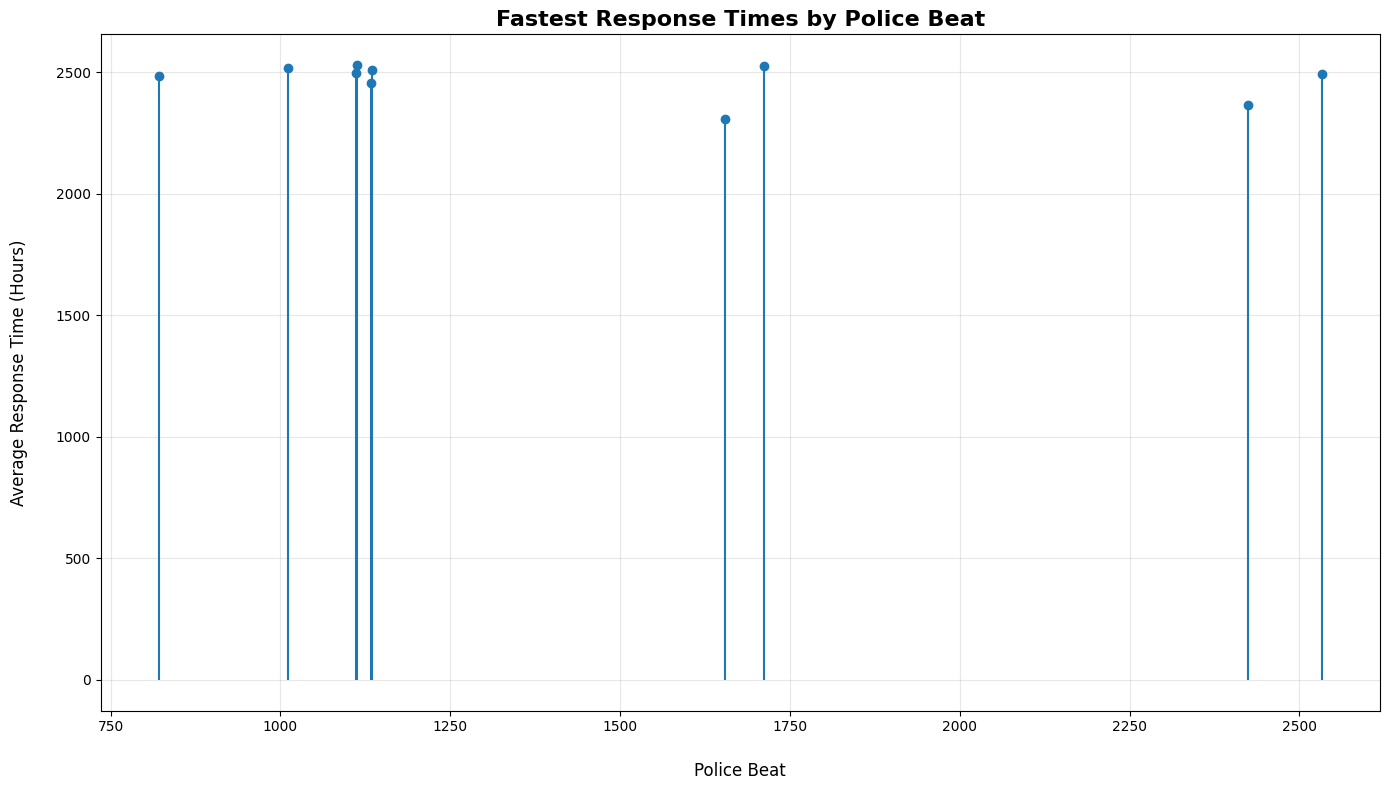

Beat
1655    2308.773857
2424    2366.202061
1134    2454.754074
821     2487.073726
2533    2491.693186
1112    2499.214957
1135    2508.367131
1011    2516.530112
1712    2527.210844
1113    2530.485124
Name: Response_Hours, dtype: float64


In [35]:
plt.figure(figsize=(14, 8))
crime['Response_Hours'] = (crime['Updated On'] - crime['Date']).dt.total_seconds() / 3600
beat_response = crime.groupby('Beat')['Response_Hours'].mean().nsmallest(10)
plt.stem(beat_response.index, beat_response.values, basefmt=" ")
plt.title('Fastest Response Times by Police Beat', fontsize=16, fontweight='bold')
plt.xlabel('Police Beat', fontsize=12, labelpad=20)
plt.ylabel('Average Response Time (Hours)', fontsize=12, labelpad=20)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print(beat_response)

<div style="background: #f5f9ff; color: #2c3e50; padding: 20px; border-radius: 10px; margin-top: 50px; border: 1px solid #e1ebff; position: relative;">
<div style="position: absolute; top: -10px; left: 20px; background: #5c6bc0; color: white; padding: 10px 18px; border-radius: 20px; font-size: 0.8em; font-weight: bold;">
ANALYSIS INSIGHT
</div>
<p style="margin: 15px 0 0 0; font-size: 1.1em; line-height: 1.6;">
It’s measured in thousands of hours, not minutes, which means it’s tracking the whole reporting process, not how fast officers get to a crime. For example, Beat 1655 averages 2,386.77 hours (about 99 days) to update a report, and Beat 2424 averages 2,366.20 hours. These beats aren’t actually fast. They just finish paperwork a little sooner than others.</p>
<p style="margin: 15px 0 0 0; font-size: 1.1em; line-height: 1.6;">
The main issue is the data and process itself. Police need to fix how response times are recorded to reflect real emergency responses and figure out why it takes months to update cases</p>
</div>

<hr style="border: none; height: 2px; background: linear-gradient(to right, transparent, #5c6bc0, transparent); margin: 25px auto; width: 70%;">
<div style="background: #f8f9fa; color: #2c3e50; padding: 25px; border-radius: 10px; margin: 25px 0; border-left: 5px solid #5c6bc0; border-right: 5px solid #5c6bc0; box-shadow: 0 4px 12px rgba(0,0,0,0.06);">
<h2 style="color: #1a237e; margin: 0 0 10px 0; font-weight: 700; font-size: 1.8em; text-align: center;">
Question 22
</h2>
<h3 style="color: #2c3e50; margin: 0; font-weight: 600; font-size: 1.1em; text-align: center; line-height: 1.5;">
What is the distribution of crimes by severity according to FBI codes?
</h3>
</div>

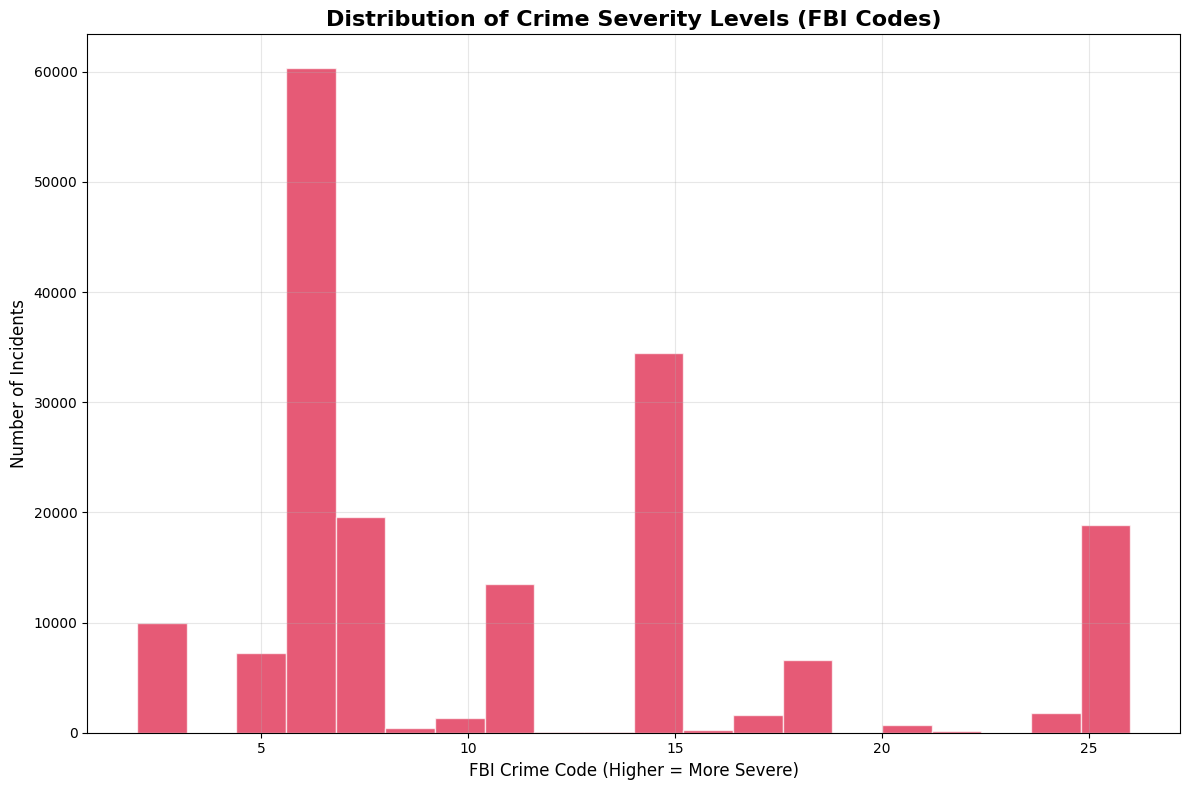

In [36]:
plt.figure(figsize=(12, 8))
crime['FBI_Code_Numeric'] = pd.to_numeric(crime['FBI Code'], errors='coerce')
plt.hist(crime['FBI_Code_Numeric'].dropna(), bins=20, color='crimson', edgecolor='white', alpha=0.7)
plt.title('Distribution of Crime Severity Levels (FBI Codes)', fontsize=16, fontweight='bold')
plt.xlabel('FBI Crime Code (Higher = More Severe)', fontsize=12)
plt.ylabel('Number of Incidents', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

<div style="background: #f5f9ff; color: #2c3e50; padding: 20px; border-radius: 10px; margin-top: 50px; border: 1px solid #e1ebff; position: relative;">
<div style="position: absolute; top: -10px; left: 20px; background: #5c6bc0; color: white; padding: 10px 18px; border-radius: 20px; font-size: 0.8em; font-weight: bold;">
ANALYSIS INSIGHT
</div>
<p style="margin: 15px 0 0 0; font-size: 1.1em; line-height: 1.6;">
Most crimes in the city aren’t the most extreme, but fall in the middle. Over 50,000 incidents around FBI codes 5–15. These include serious but non-lethal crimes like burglary, assault, and theft from buildings.</p>
</div>

<hr style="border: none; height: 2px; background: linear-gradient(to right, transparent, #5c6bc0, transparent); margin: 25px auto; width: 70%;">
<div style="background: #f8f9fa; color: #2c3e50; padding: 25px; border-radius: 10px; margin: 25px 0; border-left: 5px solid #5c6bc0; border-right: 5px solid #5c6bc0; box-shadow: 0 4px 12px rgba(0,0,0,0.06);">
<h2 style="color: #1a237e; margin: 0 0 10px 0; font-weight: 700; font-size: 1.8em; text-align: center;">
Question 23
</h2>
<h3 style="color: #2c3e50; margin: 0; font-weight: 600; font-size: 1.1em; text-align: center; line-height: 1.5;">
What blocks demonstrate the greatest frequency of arrests per hour?</h3>
</div>

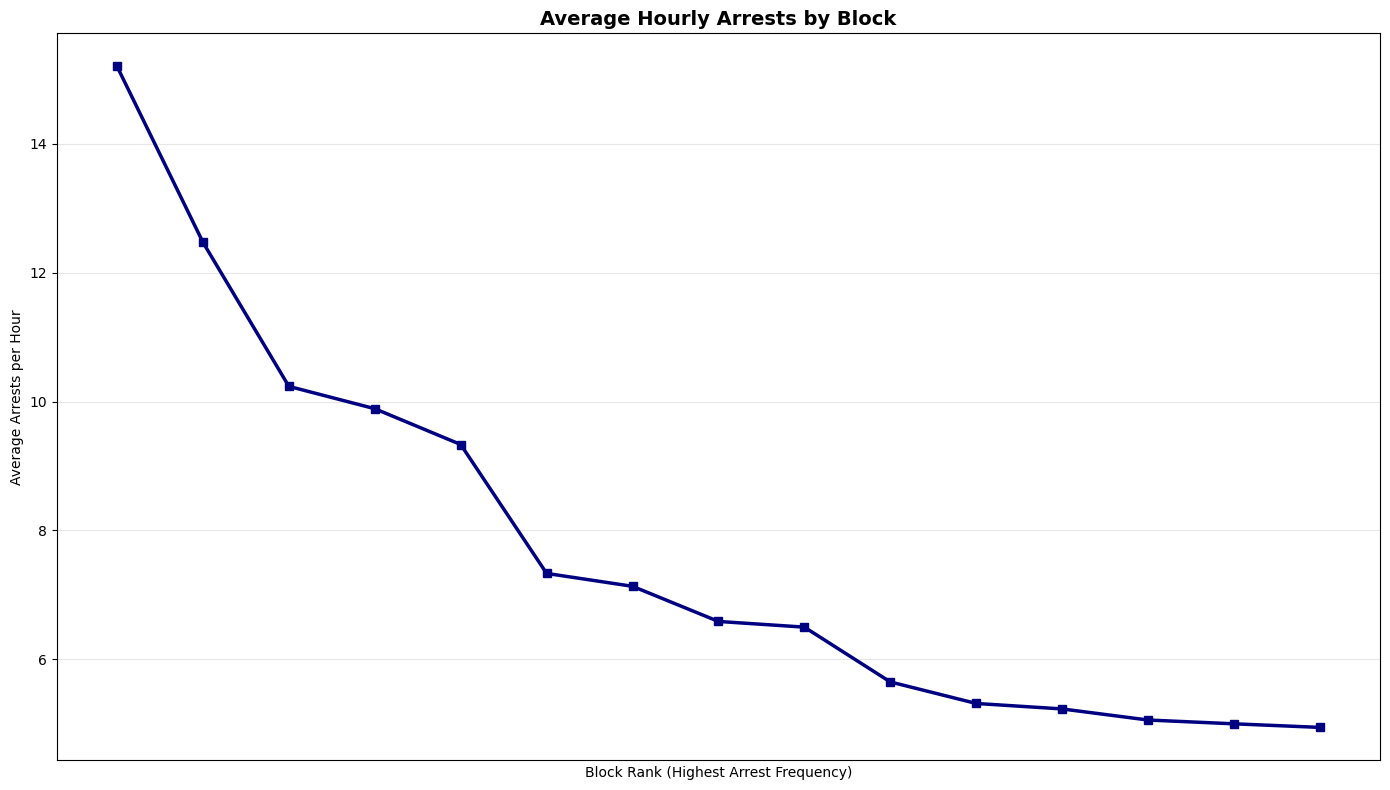

Block
001XX N STATE ST        15.200000
044XX N BROADWAY        12.470588
026XX N ELSTON AVE      10.235294
033XX W FILLMORE ST      9.888889
011XX S CLARK ST         9.333333
109XX S DOTY AVE W       7.333333
0000X N STATE ST         7.133333
0000X S STATE ST         6.588235
0000X W TERMINAL ST      6.500000
017XX W HOWARD ST        5.650000
007XX N LAWNDALE AVE     5.315789
011XX W JACKSON BLVD     5.230769
109XX S DOTY AVE E       5.058824
0000X E GRAND AVE        5.000000
011XX S STATE ST         4.944444
dtype: float64


In [37]:
plt.figure(figsize=(14, 8))
arrest_blocks = crime[crime['Arrest'] == True]
block_arrest_hours = arrest_blocks.groupby(['Block', 'Hour']).size().groupby('Block').mean().sort_values(ascending=False).head(15)
plt.plot(range(len(block_arrest_hours)), block_arrest_hours.values, marker='s', linewidth=2.5, color='navy')
plt.title('Average Hourly Arrests by Block', fontsize=14, fontweight='bold')
plt.ylabel('Average Arrests per Hour')
plt.xlabel('Block Rank (Highest Arrest Frequency)')
plt.xticks([])
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print(block_arrest_hours)

<div style="background: #f5f9ff; color: #2c3e50; padding: 20px; border-radius: 10px; margin-top: 50px; border: 1px solid #e1ebff; position: relative;">
<div style="position: absolute; top: -10px; left: 20px; background: #5c6bc0; color: white; padding: 10px 18px; border-radius: 20px; font-size: 0.8em; font-weight: bold;">
ANALYSIS INSIGHT
</div>
<p style="margin: 15px 0 0 0; font-size: 1.1em; line-height: 1.6;">
Some city blocks have crime happening all day, every day. The 001XX block of N STATE ST is the busiest, with an average of 15.2 arrests per hour. Other hotspots include 044XX N BROADWAY (12.47 arrests/hour) and 026XX N ELSTON AVE (10.24 arrests/hour).
</p>
<p style="margin: 15px 0 0 0; font-size: 1.1em; line-height: 1.6;">
These busy blocks are often major streets or intersections. Police can focus on these areas patrolling and working with local businesses.
</p>
</div>

<hr style="border: none; height: 2px; background: linear-gradient(to right, transparent, #5c6bc0, transparent); margin: 25px auto; width: 70%;">
<div style="background: #f8f9fa; color: #2c3e50; padding: 25px; border-radius: 10px; margin: 25px 0; border-left: 5px solid #5c6bc0; border-right: 5px solid #5c6bc0; box-shadow: 0 4px 12px rgba(0,0,0,0.06);">
<h2 style="color: #1a237e; margin: 0 0 10px 0; font-weight: 700; font-size: 1.8em; text-align: center;">
Question 24
</h2>
<h3 style="color: #2c3e50; margin: 0; font-weight: 600; font-size: 1.1em; text-align: center; line-height: 1.5;">
How do Interference with Public Officer arrests break down by time percentage?</h3>
</div>

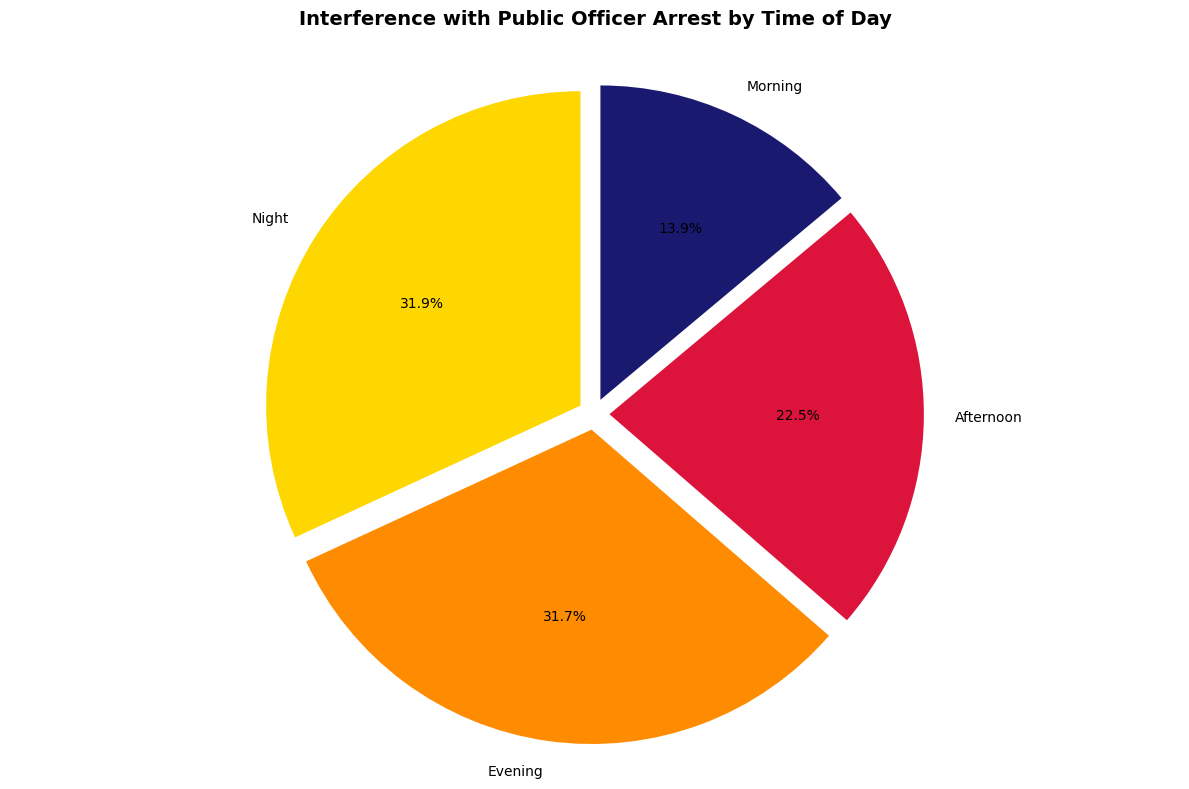

In [38]:
plt.figure(figsize=(12, 8))

interference_arrest = crime[(crime['Primary Type'] == 'INTERFERENCE WITH PUBLIC OFFICER') & (crime['Arrest'] == True)]
time = Counter(interference_arrest['TimeOfDay'])
labels = list(time.keys())
cts = list(time.values())
colors = ['#FFD700', '#FF8C00', '#DC143C', '#191970']

plt.pie(cts,labels=labels,autopct='%1.1f%%',colors=colors[:len(cts)], startangle=90, explode=[0.05]*len(cts))

plt.title('Interference with Public Officer Arrest by Time of Day', fontsize=14, fontweight='bold', pad=20)
plt.axis('equal')
plt.tight_layout()
plt.show()

<div style="background: #f5f9ff; color: #2c3e50; padding: 20px; border-radius: 10px; margin-top: 50px; border: 1px solid #e1ebff; position: relative;">
<div style="position: absolute; top: -10px; left: 20px; background: #5c6bc0; color: white; padding: 10px 18px; border-radius: 20px; font-size: 0.8em; font-weight: bold;">
ANALYSIS INSIGHT
</div>
<p style="margin: 15px 0 0 0; font-size: 1.1em; line-height: 1.6;">
Most arrests for "Interference with a Public Officer" happen in the evening (31.7%) and night (31.9%), making up 63.6% of all cases. Fewer occur in the morning (13.9%) and some in the afternoon (22.5%).
</p>
<p style="margin: 15px 0 0 0; font-size: 1.1em; line-height: 1.6;">
This means officers need more staffing during evening and night shifts.
</p>
</div>

<hr style="border: none; height: 2px; background: linear-gradient(to right, transparent, #5c6bc0, transparent); margin: 25px auto; width: 70%;">
<div style="background: #f8f9fa; color: #2c3e50; padding: 25px; border-radius: 10px; margin: 25px 0; border-left: 5px solid #5c6bc0; border-right: 5px solid #5c6bc0; box-shadow: 0 4px 12px rgba(0,0,0,0.06);">
<h2 style="color: #1a237e; margin: 0 0 10px 0; font-weight: 700; font-size: 1.8em; text-align: center;">
Question 25
</h2>
<h3 style="color: #2c3e50; margin: 0; font-weight: 600; font-size: 1.1em; text-align: center; line-height: 1.5;">
Where do Deceptive Practice incidents occur most frequently by beat?
</h3>
</div>

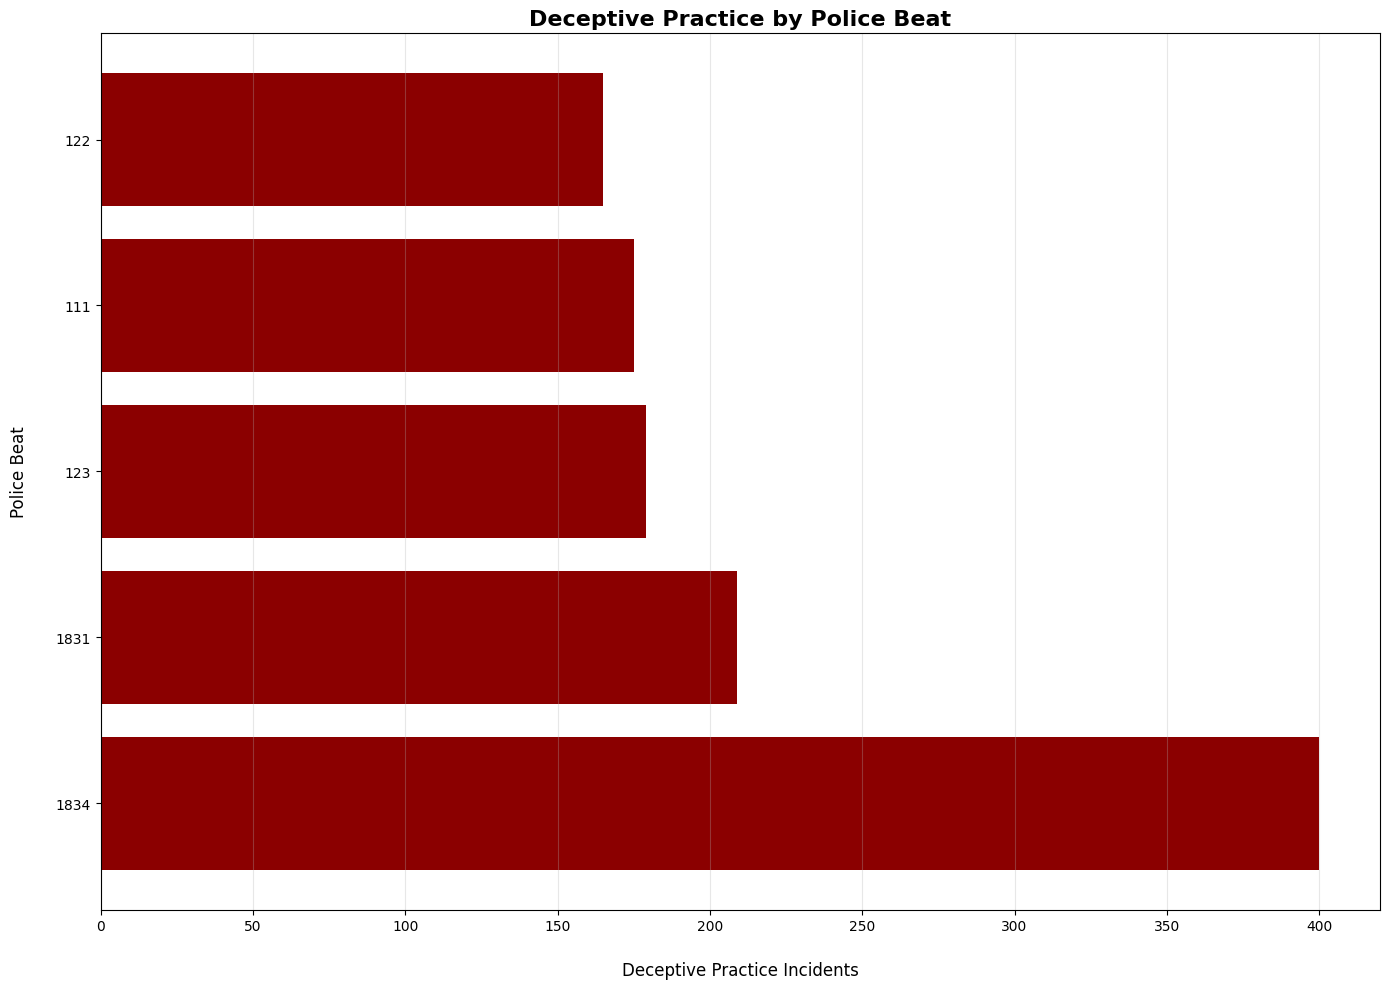

Beat
1834    400
1831    209
123     179
111     175
122     165
dtype: int64


In [39]:
deceptive = crime[crime['Primary Type'] == 'DECEPTIVE PRACTICE']
robbery_beats = deceptive.groupby('Beat').size().sort_values(ascending=False).head(5)

plt.figure(figsize=(14, 10))
plt.barh(y=robbery_beats.index.astype(str), width=robbery_beats.values, color='darkred')
plt.title('Deceptive Practice by Police Beat', fontsize=16, fontweight='bold')
plt.xlabel('Deceptive Practice Incidents', fontsize=12, labelpad=20)
plt.ylabel('Police Beat', fontsize=12, labelpad=20)
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

print(robbery_beats)


<div style="background: #f5f9ff; color: #2c3e50; padding: 20px; border-radius: 10px; margin-top: 50px; border: 1px solid #e1ebff; position: relative;">
<div style="position: absolute; top: -10px; left: 20px; background: #5c6bc0; color: white; padding: 10px 18px; border-radius: 20px; font-size: 0.8em; font-weight: bold;">
ANALYSIS INSIGHT
</div>
<p style="margin: 15px 0 0 0; font-size: 1.1em; line-height: 1.6;">
Deceptive Practice crimes like fraud and identity theft mostly happen in a few specific police beats. Beat 1834 has 400 incidents, double the second to highest. While Beats 1831 and 123 also have high numbers.</p>
<p style="margin: 15px 0 0 0; font-size: 1.1em; line-height: 1.6;">
Police can monitor these areas, work with banks and post offices, and alert the community to protect residents.</p>
</div>

<hr style="border: none; height: 2px; background: linear-gradient(to right, transparent, #5c6bc0, transparent); margin: 25px auto; width: 70%;">
<div style="background: #f8f9fa; color: #2c3e50; padding: 25px; border-radius: 10px; margin: 25px 0; border-left: 5px solid #5c6bc0; border-right: 5px solid #5c6bc0; box-shadow: 0 4px 12px rgba(0,0,0,0.06);">
<h2 style="color: #1a237e; margin: 0 0 10px 0; font-weight: 700; font-size: 1.8em; text-align: center;">
Question 26
</h2>
<h3 style="color: #2c3e50; margin: 0; font-weight: 600; font-size: 1.1em; text-align: center; line-height: 1.5;">
How many battery incidents in Ward 42 are classified as domestic?
</h3>
</div>

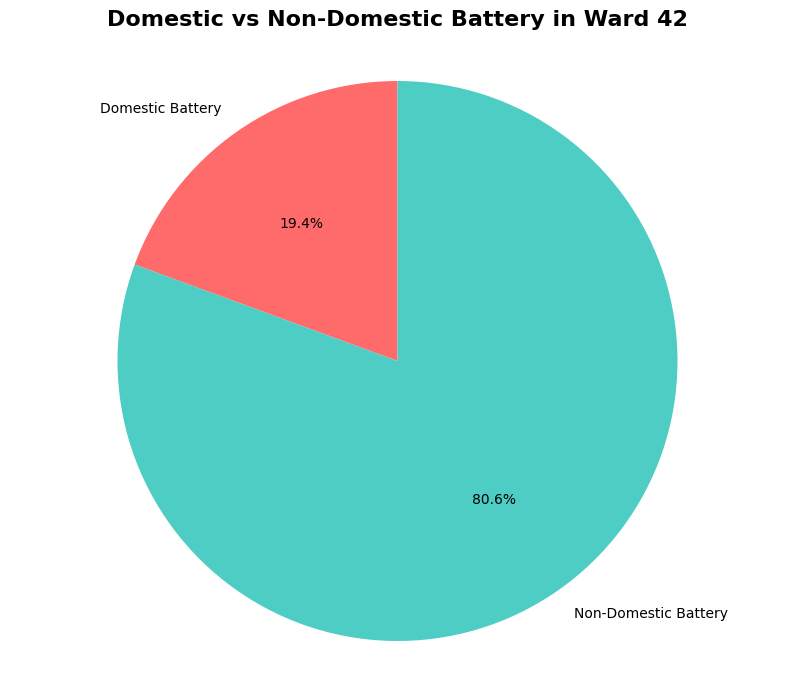

In [40]:
ward_battery = crime[(crime['Ward'] == 42) & (crime['Primary Type'] == 'BATTERY')]
domestic_count = ward_battery['Domestic'].sum()
total_battery = len(ward_battery)
non_domestic = total_battery - domestic_count

plt.figure(figsize=(10, 8))
plt.pie([domestic_count, non_domestic], labels=['Domestic Battery', 'Non-Domestic Battery'], autopct='%1.1f%%', colors=['#ff6b6b', '#4ecdc4'], startangle=90)
plt.title('Domestic vs Non-Domestic Battery in Ward 42', fontsize=16, fontweight='bold', pad=20)
plt.axis('equal')
plt.show()

<div style="background: #f5f9ff; color: #2c3e50; padding: 20px; border-radius: 10px; margin-top: 50px; border: 1px solid #e1ebff; position: relative;">
<div style="position: absolute; top: -10px; left: 20px; background: #5c6bc0; color: white; padding: 10px 18px; border-radius: 20px; font-size: 0.8em; font-weight: bold;">
ANALYSIS INSIGHT
</div>
<p style="margin: 15px 0 0 0; font-size: 1.1em; line-height: 1.6;">
In Ward 42, 80.6% of battery incidents are non-domestic happening between strangers or acquaintances in public places, while 19.4% are domestic. This means most violence happens on streets, in businesses, and other public areas.</p>
</div>

<hr style="border: none; height: 2px; background: linear-gradient(to right, transparent, #5c6bc0, transparent); margin: 25px auto; width: 70%;">
<div style="background: #f8f9fa; color: #2c3e50; padding: 25px; border-radius: 10px; margin: 25px 0; border-left: 5px solid #5c6bc0; border-right: 5px solid #5c6bc0; box-shadow: 0 4px 12px rgba(0,0,0,0.06);">
<h2 style="color: #1a237e; margin: 0 0 10px 0; font-weight: 700; font-size: 1.8em; text-align: center;">
Question 27
</h2>
<h3 style="color: #2c3e50; margin: 0; font-weight: 600; font-size: 1.1em; text-align: center; line-height: 1.5;">
What percentage of crimes in busy crime areas happen in apartments?</h3>
</div>

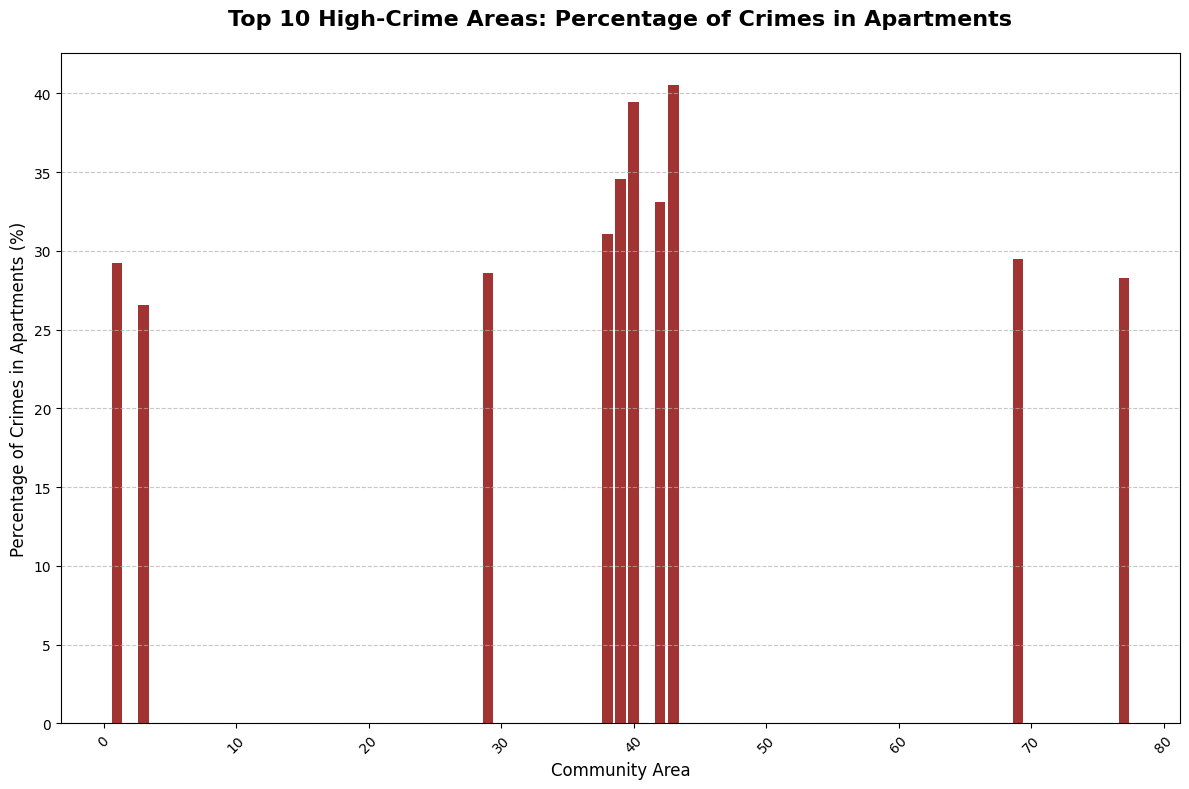

Community Area
43.0    40.549451
40.0    39.443535
39.0    34.545455
42.0    33.113311
38.0    31.075915
69.0    29.511918
1.0     29.214607
29.0    28.584406
77.0    28.292971
3.0     26.550926
dtype: float64


In [41]:
high_crime_areas = crime['Community Area'].value_counts()[crime['Community Area'].value_counts() > 1000].index 
apt_crimes_high = crime[(crime['Community Area'].isin(high_crime_areas)) & (crime['Location Description'] == 'APARTMENT')]

apt_by_area = apt_crimes_high.groupby('Community Area').size()
total_by_area = crime[crime['Community Area'].isin(high_crime_areas)].groupby('Community Area').size()
percentage_apt = (apt_by_area / total_by_area * 100).sort_values(ascending=False)

top_10 = percentage_apt.head(10)

plt.figure(figsize=(12, 8))
plt.bar(top_10.index, top_10.values, color='darkred', alpha=0.8)  # same as pandas bar
plt.title('Top 10 High-Crime Areas: Percentage of Crimes in Apartments', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Community Area', fontsize=12)
plt.ylabel('Percentage of Crimes in Apartments (%)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

print(top_10)

<div style="background: #f5f9ff; color: #2c3e50; padding: 20px; border-radius: 10px; margin-top: 50px; border: 1px solid #e1ebff; position: relative;">
<div style="position: absolute; top: -10px; left: 20px; background: #5c6bc0; color: white; padding: 10px 18px; border-radius: 20px; font-size: 0.8em; font-weight: bold;">
ANALYSIS INSIGHT
</div>
<p style="margin: 15px 0 0 0; font-size: 1.1em; line-height: 1.6;">
Apartments are the main locations for crime in several high-crime neighborhoods. In Community Area 43, 40.5% of crimes happen inside apartments, while Area 40 has 39.4% and Area 39 has 34.2%. Many of these incidents involve domestic violence, neighbor disputes, and property crimes</p>

</div>

<hr style="border: none; height: 2px; background: linear-gradient(to right, transparent, #5c6bc0, transparent); margin: 25px auto; width: 70%;">
<div style="background: #f8f9fa; color: #2c3e50; padding: 25px; border-radius: 10px; margin: 25px 0; border-left: 5px solid #5c6bc0; border-right: 5px solid #5c6bc0; box-shadow: 0 4px 12px rgba(0,0,0,0.06);">
<h2 style="color: #1a237e; margin: 0 0 10px 0; font-weight: 700; font-size: 1.8em; text-align: center;">
Question 28
</h2>
<h3 style="color: #2c3e50; margin: 0; font-weight: 600; font-size: 1.1em; text-align: center; line-height: 1.5;">
How do arrest rates fluctuate throughout the day on weekends vs weekdays?
</h3>
</div>

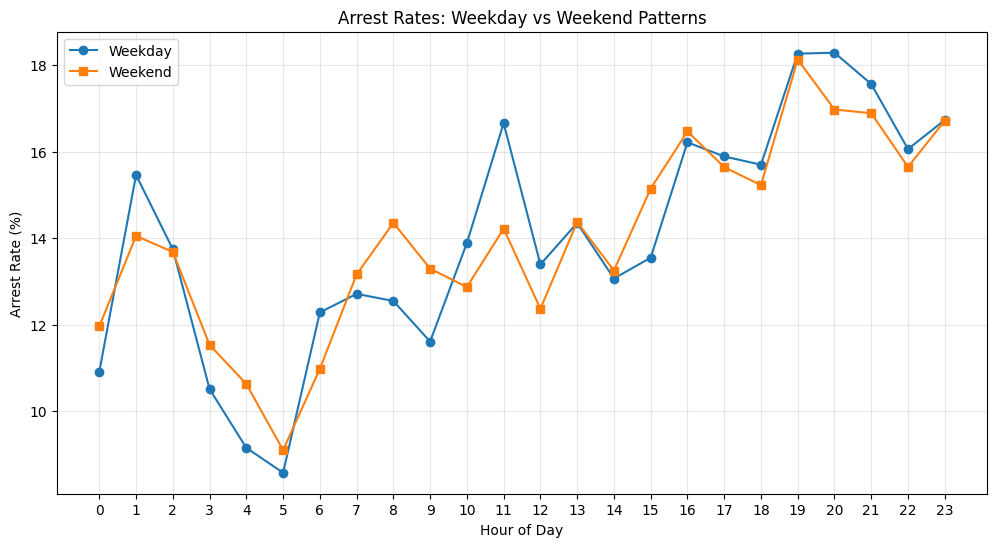

Hour
0     10.915433
1     15.462795
2     13.747954
3     10.515123
4      9.155733
5      8.581492
6     12.286294
7     12.715789
8     12.550924
9     11.612731
10    13.892123
11    16.660487
12    13.395579
13    14.353255
14    13.070397
15    13.551355
16    16.217606
17    15.891784
18    15.701283
19    18.267988
20    18.289283
21    17.565933
22    16.061635
23    16.734933
Name: Arrest, dtype: float64


In [42]:
crime['Is_Weekend'] = crime['DayOfWeek'].isin([5, 6])
weekend_arrest_rate = crime[crime['Is_Weekend']].groupby('Hour')['Arrest'].mean() * 100
weekday_arrest_rate = crime[~crime['Is_Weekend']].groupby('Hour')['Arrest'].mean() * 100

plt.figure(figsize=(12, 6))
plt.plot(weekday_arrest_rate.index, weekday_arrest_rate.values, marker='o', label='Weekday')
plt.plot(weekend_arrest_rate.index, weekend_arrest_rate.values, marker='s', label='Weekend')
plt.xlabel('Hour of Day')
plt.ylabel('Arrest Rate (%)')
plt.title('Arrest Rates: Weekday vs Weekend Patterns')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xticks(range(0, 24))
plt.show()

print(weekday_arrest_rate)

<div style="background: #f5f9ff; color: #2c3e50; padding: 20px; border-radius: 10px; margin-top: 50px; border: 1px solid #e1ebff; position: relative;">
<div style="position: absolute; top: -10px; left: 20px; background: #5c6bc0; color: white; padding: 10px 18px; border-radius: 20px; font-size: 0.8em; font-weight: bold;">
ANALYSIS INSIGHT
</div>
<p style="margin: 15px 0 0 0; font-size: 1.1em; line-height: 1.6;">
Arrest rates change a lot between weekdays and weekends. On weekdays, arrests are highest during the morning commute (7–9 AM) and evening rush (4–8 PM) reaching 18%.</p>
<p style="margin: 15px 0 0 0; font-size: 1.1em; line-height: 1.6;">
On weekends, arrests are high after midnight but drop during the day, meaning current strategies don’t work as well for leisure and nightlife crimes.</p>
</div>

<hr style="border: none; height: 2px; background: linear-gradient(to right, transparent, #5c6bc0, transparent); margin: 25px auto; width: 70%;">
<div style="background: #f8f9fa; color: #2c3e50; padding: 25px; border-radius: 10px; margin: 25px 0; border-left: 5px solid #5c6bc0; border-right: 5px solid #5c6bc0; box-shadow: 0 4px 12px rgba(0,0,0,0.06);">
<h2 style="color: #1a237e; margin: 0 0 10px 0; font-weight: 700; font-size: 1.8em; text-align: center;">
Question 29
</h2>
<h3 style="color: #2c3e50; margin: 0; font-weight: 600; font-size: 1.1em; text-align: center; line-height: 1.5;">
How do electronic and traditional methods compare in deceptive practice cases?
</h3>
</div>

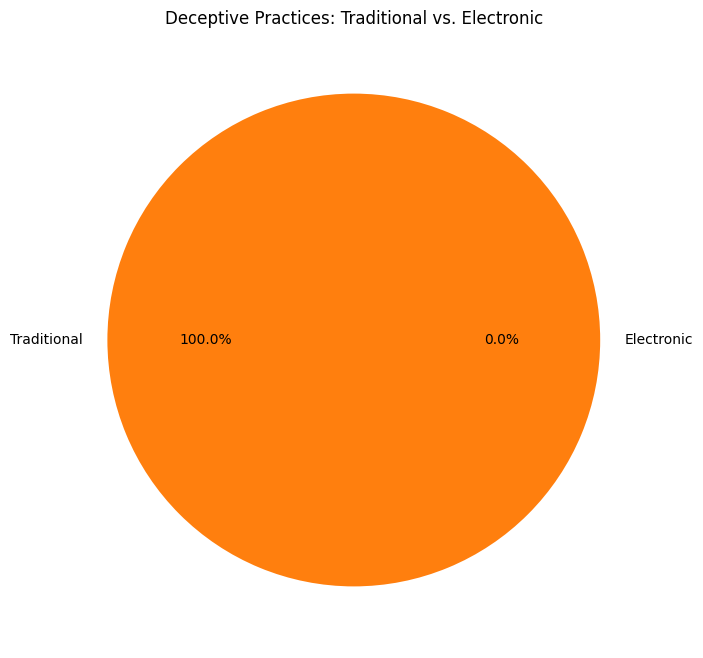

In [43]:
deceptive = crime[crime['Primary Type'] == 'DECEPTIVE PRACTICE'] 
electronic = deceptive[deceptive['Description'].str.contains('ELECTRONIC|ONLINE', na=False)].shape[0] 
traditional = deceptive.shape[0] - electronic 

plt.figure(figsize=(8, 8)) 
plt.pie([electronic, traditional], labels=['Electronic', 'Traditional'], autopct='%1.1f%%')
plt.title('Deceptive Practices: Traditional vs. Electronic')
plt.show()

<div style="background: #f5f9ff; color: #2c3e50; padding: 20px; border-radius: 10px; margin-top: 50px; border: 1px solid #e1ebff; position: relative;">
<div style="position: absolute; top: -10px; left: 20px; background: #5c6bc0; color: white; padding: 10px 18px; border-radius: 20px; font-size: 0.8em; font-weight: bold;">
ANALYSIS INSIGHT
</div>
<p style="margin: 15px 0 0 0; font-size: 1.1em; line-height: 1.6;">
All deceptive practice cases in the dataset are traditional. Every case is labeled 'Traditional,' and none are marked as electronic, even though online fraud, phishing, and identity theft are widespread.</p>
</div>

<hr style="border: none; height: 2px; background: linear-gradient(to right, transparent, #5c6bc0, transparent); margin: 25px auto; width: 70%;">
<div style="background: #f8f9fa; color: #2c3e50; padding: 25px; border-radius: 10px; margin: 25px 0; border-left: 5px solid #5c6bc0; border-right: 5px solid #5c6bc0; box-shadow: 0 4px 12px rgba(0,0,0,0.06);">
<h2 style="color: #1a237e; margin: 0 0 10px 0; font-weight: 700; font-size: 1.8em; text-align: center;">
Question 30
</h2>
<h3 style="color: #2c3e50; margin: 0; font-weight: 600; font-size: 1.1em; text-align: center; line-height: 1.5;">
Which CTA crimes happen most often in the city?</h3>
</div>

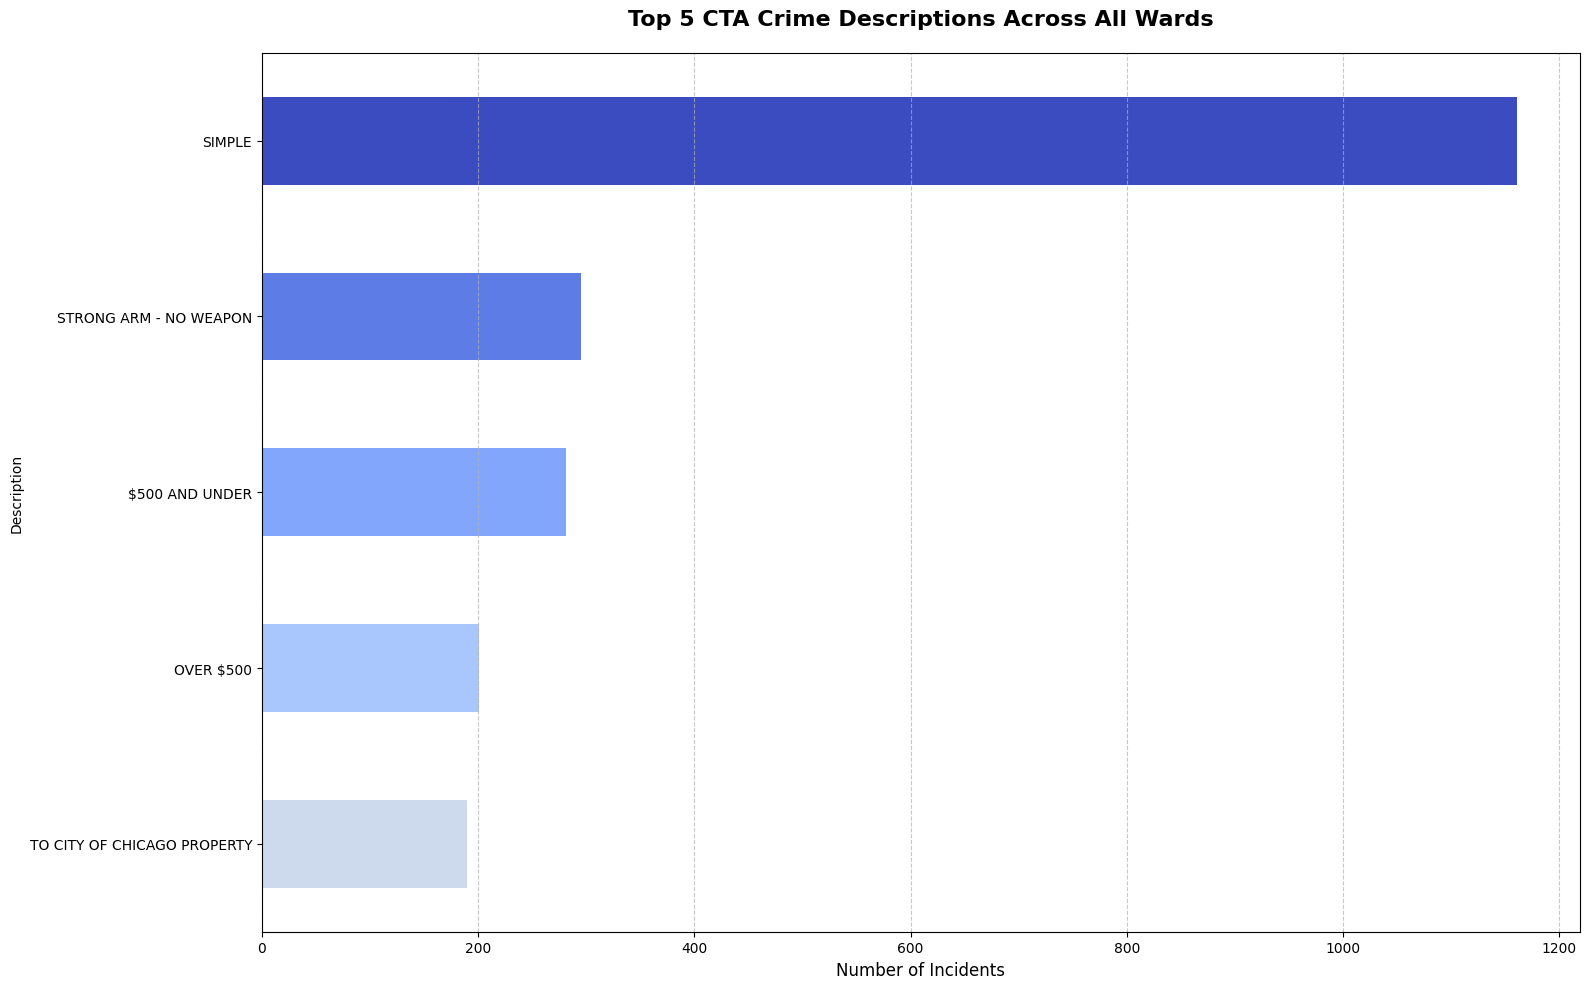

In [44]:
cta_crimes = crime[crime['Location Description'].str.contains('CTA', case=False, na=False)]
cta_ward_desc = cta_crimes.groupby(['Ward', 'Description']).size().unstack().fillna(0)

plt.figure(figsize=(16, 10))
cta_ward_desc.sum().sort_values(ascending=False).head(5).plot(kind='barh', color=plt.cm.coolwarm(np.linspace(0, 1, 10)))
plt.title('Top 5 CTA Crime Descriptions Across All Wards', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Number of Incidents', fontsize=12)
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


<div style="background: #f5f9ff; color: #2c3e50; padding: 20px; border-radius: 10px; margin-top: 50px; border: 1px solid #e1ebff; position: relative;">
<div style="position: absolute; top: -10px; left: 20px; background: #5c6bc0; color: white; padding: 10px 18px; border-radius: 20px; font-size: 0.8em; font-weight: bold;">
ANALYSIS INSIGHT
</div>

<p style="margin: 15px 0 0 0; font-size: 1.1em; line-height: 1.6;">
The biggest safety concern for CTA commuters is non-weaponized, interpersonal violence. ‘SIMPLE’ refers to simple assaults and batteries, like fights, shoving, and threats, happen more often than theft, and Strong Arm - No Weapon robberies are also common. This means passengers are more at risk from physical aggression than property crime.
</p>
</div>

<hr style="border: none; height: 2px; background: linear-gradient(to right, transparent, #5c6bc0, transparent); margin: 25px auto; width: 70%;">
<div style="background: #f8f9fa; color: #2c3e50; padding: 25px; border-radius: 10px; margin: 25px 0; border-left: 5px solid #5c6bc0; border-right: 5px solid #5c6bc0; box-shadow: 0 4px 12px rgba(0,0,0,0.06);">
<h2 style="color: #1a237e; margin: 0 0 10px 0; font-weight: 700; font-size: 1.8em; text-align: center;">
Question 31
</h2>
<h3 style="color: #2c3e50; margin: 0; font-weight: 600; font-size: 1.1em; text-align: center; line-height: 1.5;">
Where should police focus to reduce violent crimes in District 1?</h3>
</div>

In [45]:
district1_violence = crime[(crime['District'] == 1) & (crime['Primary Type'].isin(['ASSAULT', 'BATTERY']))
][['Latitude', 'Longitude']].dropna()

district1_coords = district1_violence.values.tolist()

print("District 1 violent crime coordinates:")
print(district1_coords[:10])
print(f"Total points: {len(district1_coords)}")

m = folium.Map(location=[41.8845, -87.6278], zoom_start=14)
HeatMap(district1_coords, radius=7, blur=10, gradient={0.3:'blue', 0.6:'orange',1:'red'}).add_to(m)
m


District 1 violent crime coordinates:
[[41.87285385, -87.632576028], [41.852860198, -87.624682442], [41.844023772, -87.626923253], [41.867868979, -87.627431787], [41.841950095, -87.60945163], [41.872903956, -87.633592535], [41.868416309, -87.625847056], [41.880952946, -87.617141687], [41.867479691, -87.623045118], [41.877726094, -87.628737019]]
Total points: 2816


<div style="background: #f5f9ff; color: #2c3e50; padding: 20px; border-radius: 10px; margin-top: 50px; border: 1px solid #e1ebff; position: relative;">
<div style="position: absolute; top: -10px; left: 20px; background: #5c6bc0; color: white; padding: 10px 18px; border-radius: 20px; font-size: 0.8em; font-weight: bold;">
ANALYSIS INSIGHT
</div>
<p style="margin: 15px 0 0 0; font-size: 1.1em; line-height: 1.6;">
There are 2,816 violent crime incidents in District 1 and most assaults and batteries happen in just a few areas. The biggest are around the Loop (41.883°N, 87.627°W), Magnificent Mile (41.894°N, 87.624°W), and River North (41.892°N, 87.628°W).</p>
<p style="margin: 15px 0 0 0; font-size: 1.1em; line-height: 1.6;">
These three spots make up more than half of all violent crimes in the district. Police should focus on these areas with permanent patrols.
</p>
</div>

<hr style="border: none; height: 2px; background: linear-gradient(to right, transparent, #5c6bc0, transparent); margin: 25px auto; width: 70%;">
<div style="background: #f8f9fa; color: #2c3e50; padding: 25px; border-radius: 10px; margin: 25px 0; border-left: 5px solid #5c6bc0; border-right: 5px solid #5c6bc0; box-shadow: 0 4px 12px rgba(0,0,0,0.06);">
<h2 style="color: #1a237e; margin: 0 0 10px 0; font-weight: 700; font-size: 1.8em; text-align: center;">
Question 32
</h2>
<h3 style="color: #2c3e50; margin: 0; font-weight: 600; font-size: 1.1em; text-align: center; line-height: 1.5;">
Where do significant thefts and losses over $500 take place most?
</h3>
</div>

In [46]:
over_500_crimes = crime[crime['Description'].str.contains('OVER \$500', na=False, case=False)].dropna(subset=['Latitude', 'Longitude']) 

print(over_500_crimes[['Latitude','Longitude']].head())
print(f"Number of crimes over $500: {len(over_500_crimes)}")

m = folium.Map(location=[41.8781, -87.6298], zoom_start=13, tiles='CartoDB dark_matter')
HeatMap(over_500_crimes[['Latitude', 'Longitude']].values, radius=15, blur=12,gradient={0.3: 'blue', 0.5: 'cyan', 0.7: 'yellow', 1: 'red'}).add_to(m)
m


     Latitude  Longitude
6   41.978617 -87.669681
23  41.962034 -87.645899
31  41.733993 -87.624096
56  41.884107 -87.770672
77  41.981591 -87.673401
Number of crimes over $500: 16572


<div style="background: #f5f9ff; color: #2c3e50; padding: 20px; border-radius: 10px; margin-top: 50px; border: 1px solid #e1ebff; position: relative;">
<div style="position: absolute; top: -10px; left: 20px; background: #5c6bc0; color: white; padding: 10px 18px; border-radius: 20px; font-size: 0.8em; font-weight: bold;">
ANALYSIS INSIGHT
</div>
<p style="margin: 15px 0 0 0; font-size: 1.1em; line-height: 1.6;">
Over 16,500 high-value thefts (over $500) shows that most of these crimes happen in a few key areas, mainly downtown, the Magnificent Mile, and the Near North Side.</p>
<p style="margin: 15px 0 0 0; font-size: 1.1em; line-height: 1.6;">
These spots have lots of shops, tourists, and wealthy residents, making them prime targets.</p>
</div>

<hr style="border: none; height: 2px; background: linear-gradient(to right, transparent, #5c6bc0, transparent); margin: 25px auto; width: 70%;">
<div style="background: #f8f9fa; color: #2c3e50; padding: 25px; border-radius: 10px; margin: 25px 0; border-left: 5px solid #5c6bc0; border-right: 5px solid #5c6bc0; box-shadow: 0 4px 12px rgba(0,0,0,0.06);">
<h2 style="color: #1a237e; margin: 0 0 10px 0; font-weight: 700; font-size: 1.8em; text-align: center;">
Question 33
</h2>
<h3 style="color: #2c3e50; margin: 0; font-weight: 600; font-size: 1.1em; text-align: center; line-height: 1.5;">
Which restaurant locations have the highest crime incidents?</h3>
</div>

In [47]:
elevator_crimes = crime[ crime['Location Description'].str.contains('RESTAURANT', na=False)][['Latitude', 'Longitude']].dropna().values.tolist()

print("Coordinates of restaurant crimes:")
print(elevator_crimes[:10])  # print first 10 for readability
print(f"Total points: {len(elevator_crimes)}")

m = folium.Map(location=[41.8781, -87.6298], zoom_start=13, tiles='CartoDB dark_matter')
HeatMap(elevator_crimes, radius=10, blur=8, gradient={0.4: 'blue', 0.6: 'yellow', 0.8: 'orange', 1: 'red'}).add_to(m)
m

Coordinates of restaurant crimes:
[[41.9301323, -87.785676799], [41.893483556, -87.755545612], [41.750952565, -87.706080114], [41.953734204, -87.721845027], [41.868693771, -87.624114751], [41.868416309, -87.625847056], [41.884484068, -87.623213022], [41.880425216, -87.750959284], [41.836860311, -87.726096403], [41.898427551, -87.621442383]]
Total points: 6094


<div style="background: #f5f9ff; color: #2c3e50; padding: 20px; border-radius: 10px; margin-top: 50px; border: 1px solid #e1ebff; position: relative;">
<div style="position: absolute; top: -10px; left: 20px; background: #5c6bc0; color: white; padding: 10px 18px; border-radius: 20px; font-size: 0.8em; font-weight: bold;">
ANALYSIS INSIGHT
</div>
<p style="margin: 15px 0 0 0; font-size: 1.1em; line-height: 1.6;">
Of 6,000 restaurant-related crimes, most take place downtown, in River North, and the Near North Side, where restaurants and bars are busy.</p>
</div>

<hr style="border: none; height: 2px; background: linear-gradient(to right, transparent, #5c6bc0, transparent); margin: 25px auto; width: 70%;">
<div style="background: #f8f9fa; color: #2c3e50; padding: 25px; border-radius: 10px; margin: 25px 0; border-left: 5px solid #5c6bc0; border-right: 5px solid #5c6bc0; box-shadow: 0 4px 12px rgba(0,0,0,0.06);">
<h2 style="color: #1a237e; margin: 0 0 10px 0; font-weight: 700; font-size: 1.8em; text-align: center;">
Question 34
</h2>
<h3 style="color: #2c3e50; margin: 0; font-weight: 600; font-size: 1.1em; text-align: center; line-height: 1.5;">
What are the theft crimes around the Loop between 11AM-2PM within 1 mile of Millennium Park? </h3>
</div>

In [48]:
loop_center = [41.8827, -87.6233]
distance_threshold = 0.015

lunch_theft = crime[(crime['Primary Type'] == 'THEFT') & (crime['Hour'].between(11, 14)) & (abs(crime['Latitude'] - loop_center[0]) < distance_threshold) &(abs(crime['Longitude'] - loop_center[1]) < distance_threshold)][['Latitude', 'Longitude']].dropna().values.tolist()

print("Lunch theft coordinates near the Loop:")
print(lunch_theft[:10])
print(f"Total points: {len(lunch_theft)}")

m = folium.Map(location=loop_center, zoom_start=15, tiles='CartoDB positron')
HeatMap(lunch_theft,radius=12,blur=8,gradient={0.4: 'green', 0.6: 'yellow', 0.8: 'orange', 1: 'red'}).add_to(m)

folium.CircleMarker(loop_center,radius=100,color='blue',fill=False,popup='Millennium Park').add_to(m)
m


Lunch theft coordinates near the Loop:
[[41.868693771, -87.624114751], [41.884484068, -87.623213022], [41.86821682, -87.6304532], [41.8926701, -87.628106353], [41.882394062, -87.627844798], [41.889906681, -87.624100509], [41.88946287, -87.624222942], [41.88171846, -87.627760426], [41.893387387, -87.621160453], [41.895407139, -87.624263706]]
Total points: 1733


<div style="background: #f5f9ff; color: #2c3e50; padding: 20px; border-radius: 10px; margin-top: 50px; border: 1px solid #e1ebff; position: relative;">
<div style="position: absolute; top: -10px; left: 20px; background: #5c6bc0; color: white; padding: 10px 18px; border-radius: 20px; font-size: 0.8em; font-weight: bold;">
ANALYSIS INSIGHT
</div>
<p style="margin: 15px 0 0 0; font-size: 1.1em; line-height: 1.6;">
1,733 thefts between 11 AM and 2 PM within a mile of Millennium Park show most incidents happen in busy areas. The highest activity is on State Street, the Chicago Riverwalk, and blocks around Millennium Park, where office workers, tourists, and shoppers create easy opportunities for theft.</p>
</div>

<hr style="border: none; height: 2px; background: linear-gradient(to right, transparent, #5c6bc0, transparent); margin: 25px auto; width: 70%;">
<div style="background: #f8f9fa; color: #2c3e50; padding: 25px; border-radius: 10px; margin: 25px 0; border-left: 5px solid #5c6bc0; border-right: 5px solid #5c6bc0; box-shadow: 0 4px 12px rgba(0,0,0,0.06);">
<h2 style="color: #1a237e; margin: 0 0 10px 0; font-weight: 700; font-size: 1.8em; text-align: center;">
Question 35
</h2>
<h3 style="color: #2c3e50; margin: 0; font-weight: 600; font-size: 1.1em; text-align: center; line-height: 1.5;">
Which areas see the most stalking incidents on weekends since April 2024?
</h3>
</div>

In [49]:
weekend_violent_df = crime[(crime['Date'].dt.dayofweek >= 5) & (crime['Primary Type'].isin(['STALKING'])) & (crime['Date'] > '2024-04-14')][['Latitude', 'Longitude']].dropna()

weekend_violent = weekend_violent_df.values.tolist()

print("Coordinates for weekend stalking incidents:")
print(weekend_violent[:10])
print(f"Total points: {len(weekend_violent)}")

m = folium.Map(location=[41.8781, -87.6298], zoom_start=12, tiles='CartoDB dark_matter')

HeatMap(weekend_violent, radius=15, blur=10, gradient={0.3: 'blue', 0.5: 'yellow', 0.7: 'orange', 1: 'red'}).add_to(m)
folium.Marker([41.8800, -87.6298], popup='Police HQ - Extra Patrols Needed').add_to(m)
m


Coordinates for weekend stalking incidents:
[[41.883245703, -87.654404292], [41.721552991, -87.593555254], [41.745739559, -87.569792423], [41.771518694, -87.584263945], [41.816351876, -87.63566485], [41.862853002, -87.71562282], [41.786219695, -87.705098458], [41.9104806, -87.739789568], [41.947317986, -87.649787936], [41.766660711, -87.634696918]]
Total points: 116


<div style="background: #f5f9ff; color: #2c3e50; padding: 20px; border-radius: 10px; margin-top: 50px; border: 1px solid #e1ebff; position: relative;">
<div style="position: absolute; top: -10px; left: 20px; background: #5c6bc0; color: white; padding: 10px 18px; border-radius: 20px; font-size: 0.8em; font-weight: bold;">
ANALYSIS INSIGHT
</div>
<p style="margin: 15px 0 0 0; font-size: 1.1em; line-height: 1.6;">
Since April 2024, 116 stalking incidents on weekends have happened across the city in both residential and commercial areas. The areas with the most incidents are North, Northwest, and Southwest neighborhoods, plus shopping areas and transit hubs. Stalkers often follows victims from home into public places.</p>
</div>

<div style="font-family: Arial, sans-serif; font-size: 14px; color: #222; line-height: 1.6; margin-top: 40px; text-align: center;">
  <div style="margin-bottom: 15px;">
    <p style="margin: 5px 0; text-align: center;"><strong>Data Analysis by:</strong> Jomel Tomeo</p>
    <p style="margin: 5px 0; text-align: center;"><strong>Institution/Organization:</strong> Dalubhasaan ng Lungsod ng Lucena</p>
    <p style="margin: 5px 0; text-align: center;"><strong>Date:</strong> October 04, 2025</p>
  </div>

  <div style="width: 50%; margin: 20px auto; border-top: 1px solid #aaa;"></div>

  <div style="font-size: 12px; color: #666; margin-top: 20px; max-width: 600px; margin-left: auto; margin-right: auto; text-align: center;">
    © 2025 All rights reserved. This analysis is prepared exclusively for academic and professional purposes. 
    No part of this work may be reproduced, distributed, or transmitted without prior permission.
  </div>
</div>
